# Mini Project Notebook: Credit Card Clustering

## Dr. Prashanth Kannadaguli
### Founding Chief Research Architect & President
### Dhaarini AI-Tech Research Academy, Bengaluru, India

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

## Dataset Exploration



Load the dataset "CreditCards.csv" into a Pandas DataFrame. Display the first 15 rows and all columns.

In [21]:
# Load the dataset
df = pd.read_csv('CreditCards.csv')

# Display the first 15 rows and all columns
pd.set_option('display.max_columns', None)
df.head(15)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   C10001    40.900749           0.818182      95.40              0.00   
1   C10002  3202.467416           0.909091       0.00              0.00   
2   C10003  2495.148862           1.000000     773.17            773.17   
3   C10004  1666.670542           0.636364    1499.00           1499.00   
4   C10005   817.714335           1.000000      16.00             16.00   
5   C10006  1809.828751           1.000000    1333.28              0.00   
6   C10007   627.260806           1.000000    7091.01           6402.63   
7   C10008  1823.652743           1.000000     436.20              0.00   
8   C10009  1014.926473           1.000000     861.49            661.49   
9   C10010   152.225975           0.545455    1281.60           1281.60   
10  C10011  1293.124939           1.000000     920.12              0.00   
11  C10012   630.794744           0.818182    1492.18           1492.18   
12  C10013  1516.928620           1.000000    3217.99           2500.23   
13  C10014   921.693369           1.000000    2137.93            419.96   
14  C10015  2772.772734           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40      0.000000             0.166667   
1                     0.00   6442.945483             0.000000   
2                     0.00      0.000000             1.000000   
3                     0.00    205.788017             0.083333   
4                     0.00      0.000000             0.083333   
5                  1333.28      0.000000             0.666667   
6                   688.38      0.000000             1.000000   
7                   436.20      0.000000             1.000000   
8                   200.00      0.000000             0.333333   
9                     0.00      0.000000             0.166667   
10                  920.12      0.000000             1.000000   
11                    0.00      0.000000             0.250000   
12                  717.76      0.000000             1.000000   
13                 1717.97      0.000000             0.750000   
14                    0.00    346.811390             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
1                     0.000000                          0.000000   
2                     1.000000                          0.000000   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
5                     0.000000                          0.583333   
6                     1.000000                          1.000000   
7                     0.000000                          1.000000   
8                     0.083333                          0.250000   
9                     0.166667                          0.000000   
10                    0.000000                          1.000000   
11                    0.250000                          0.000000   
12                    0.250000                          0.916667   
13                    0.166667                          0.750000   
14                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
1                 0.250000                 4              0        7000.0   
2                 0.000000                 0             12        7500.0   
3                 0.083333                 1              1        7500.0   
4                 0.000000                 0              1        1200.0   
5                 0.000000                 0              8        1800.0   
6                 0.000000                 0             64       13500.0   
7                 0.000000                 0            

Determine the data types of each column in the DataFrame. Check for missing values and count the number of missing values in each column.

In [22]:
# Determine the data types of each column
print("Data Types:")
print(df.dtypes)

# Check for missing values and count the number of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOF

Check the data types of all columns and ensure they are consistent with the expected types (e.g., numerical for quantities, categorical for identifiers).

In [23]:
# Check the data types of all columns and ensure they are consistent
print("Data Types:")
print(df.info())

# Convert CUST_ID to string if it's not already
df['CUST_ID'] = df['CUST_ID'].astype(str)

# Verify conversion
print("\nCUST_ID type after conversion:", df['CUST_ID'].dtype)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  

Convert data types if necessary (e.g., convert object columns to numeric if appropriate).

In [24]:
# Convert data types if necessary
# We need to handle the MINIMUM_PAYMENTS column which has missing values and might be object type
# First, let's check if there are any non-numeric values in numeric columns
numeric_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

for col in numeric_cols:
    # Convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify conversion
print("\nData Types After Conversion:")
print(df.info())


Data Types After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 

Calculate summary statistics (mean, median, mode, standard deviation, min, max, quartiles) for numerical columns.

In [26]:
# Calculate summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

print("\nMedian Values:")
print(numeric_df.median())

print("\nMode Values:")
print(numeric_df.mode().iloc[0])


Summary Statistics:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.0000

Calculate the correlation between numerical variables. Visualize the correlation matrix using a heatmap.

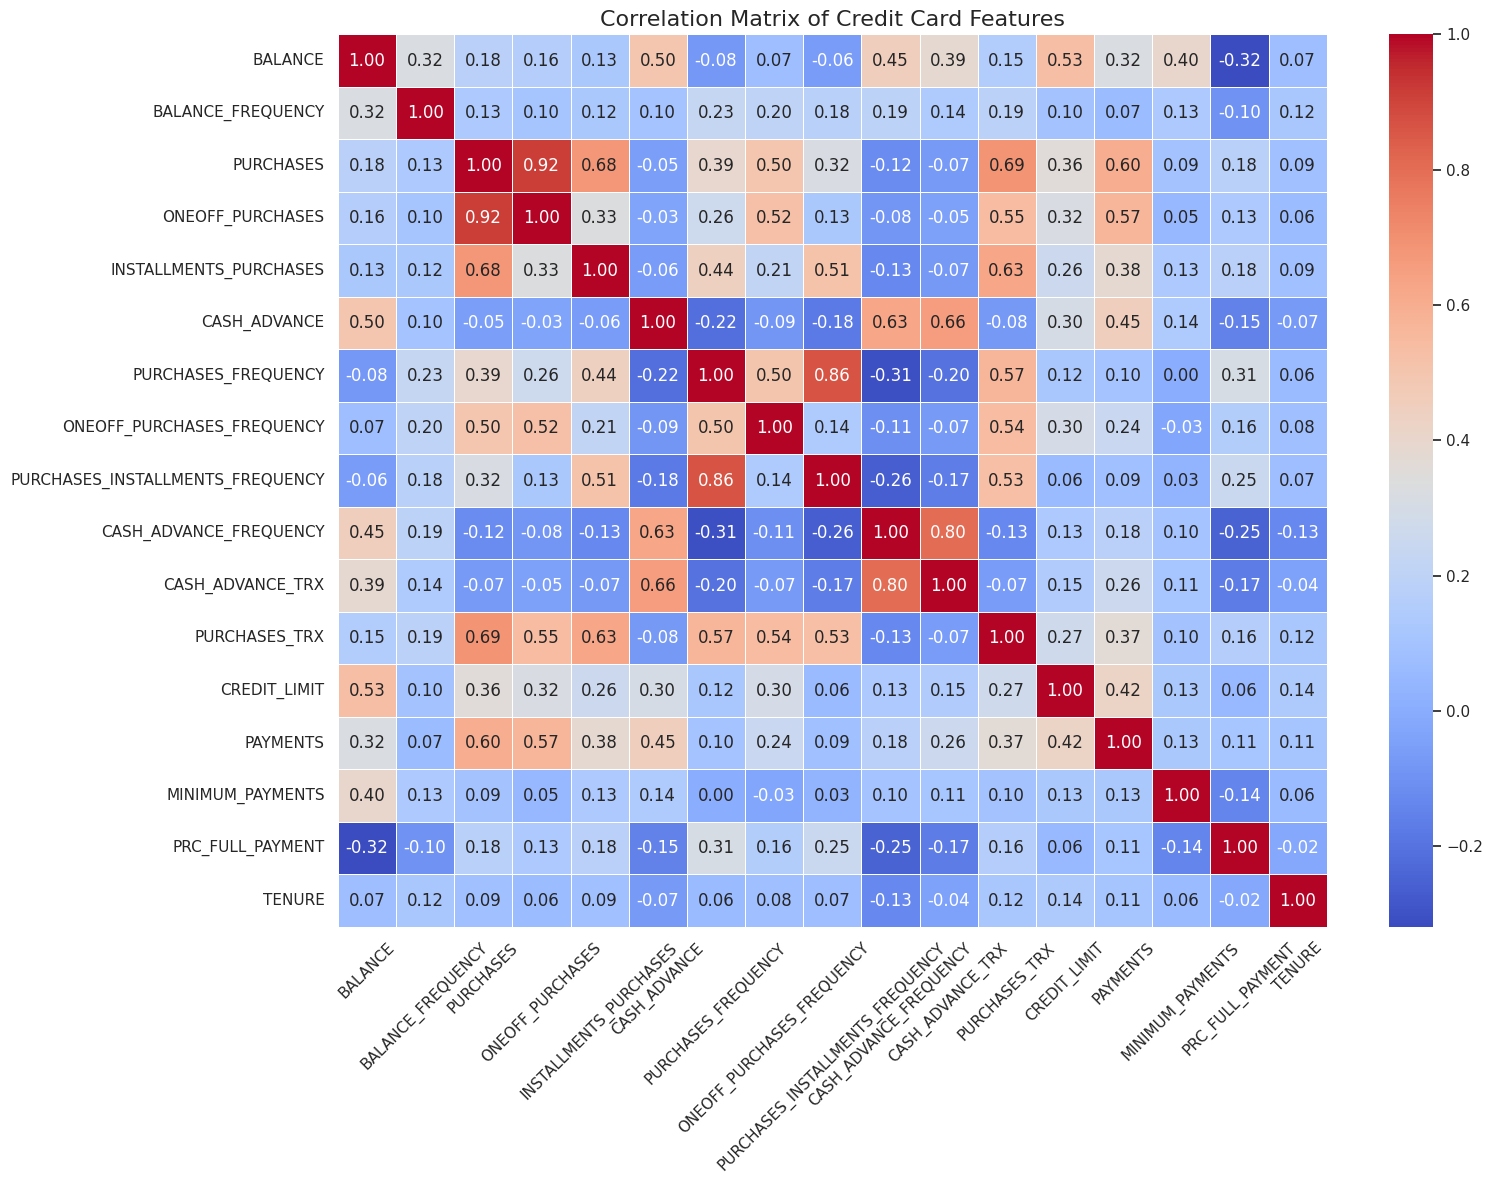

In [27]:
# Calculate the correlation between numerical variables
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Credit Card Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Analyze the distribution of categorical variables (e.g., count the occurrences of different values in the CUST_ID column).

Number of unique customers: 8950

TENURE Distribution:
TENURE
6      204
7      190
8      196
9      175
10     236
11     365
12    7584
Name: count, dtype: int64


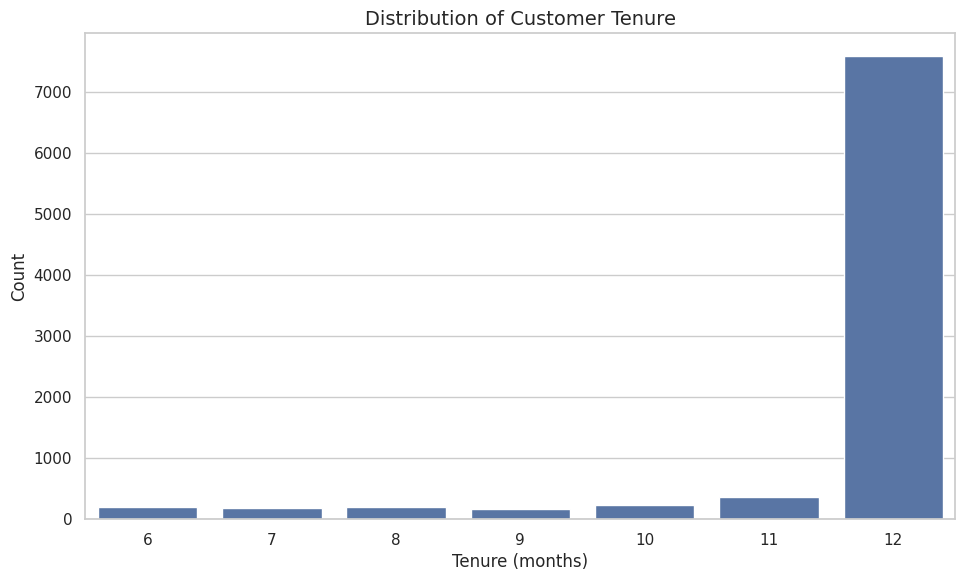

In [28]:
# Analyze the distribution of categorical variables
# CUST_ID is a unique identifier, so we'll look at other categorical-like variables
categorical_cols = ['CUST_ID', 'TENURE']

# For CUST_ID, we can just count the number of unique customers
print("Number of unique customers:", df['CUST_ID'].nunique())

# For TENURE, let's see the distribution
print("\nTENURE Distribution:")
print(df['TENURE'].value_counts().sort_index())

# Visualize TENURE distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', data=df)
plt.title('Distribution of Customer Tenure', fontsize=14)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

Identify outliers using box plots or statistical methods (e.g., IQR).

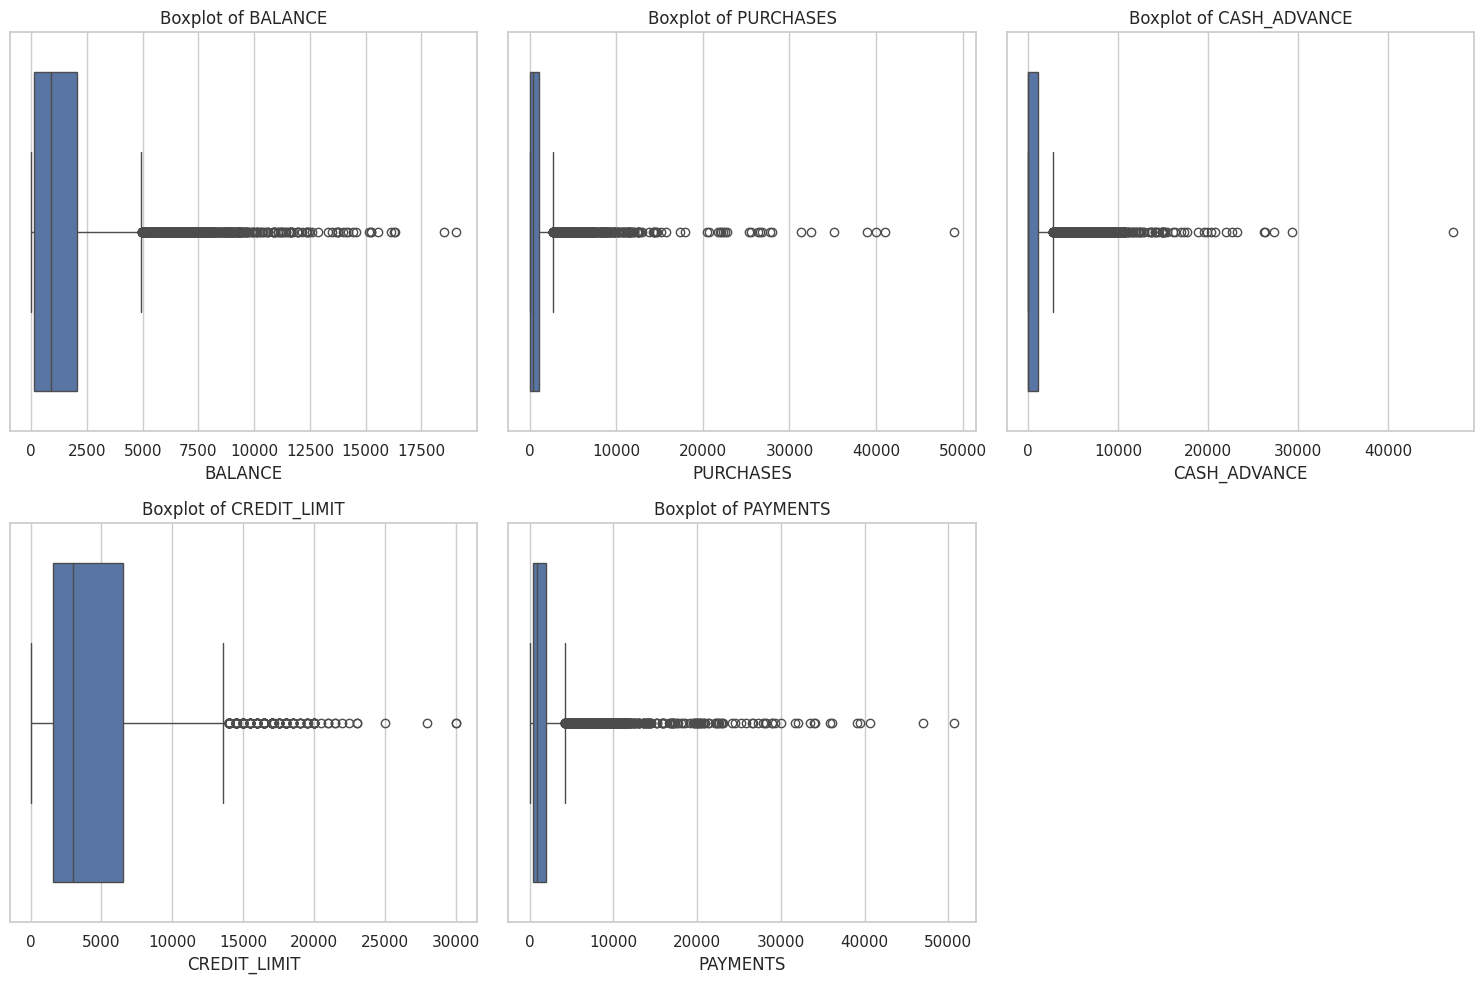

BALANCE: 695 outliers detected (7.77%)
PURCHASES: 808 outliers detected (9.03%)
CASH_ADVANCE: 1030 outliers detected (11.51%)
CREDIT_LIMIT: 248 outliers detected (2.77%)
PAYMENTS: 808 outliers detected (9.03%)


In [29]:
# Identify outliers using box plots for key numerical columns
key_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Statistical method for outlier detection (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for key columns
for col in key_cols:
    outliers, lb, ub = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")

Visualize the impact of outliers: Remove outliers and re-visualize the data to assess their impact on the overall distribution and relationships.

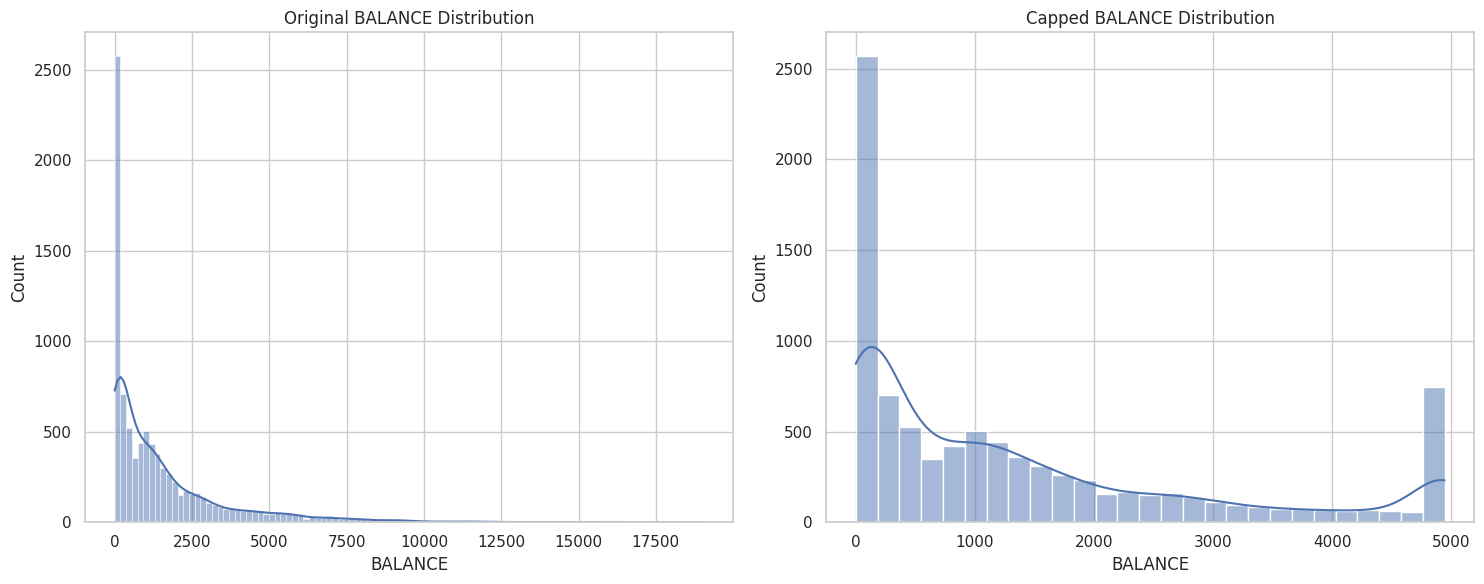

In [30]:
# Visualize the impact of outliers
# Let's create a function to cap outliers and compare distributions
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a copy of the dataframe
    df_capped = df.copy()
    df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound,
                                np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column]))
    return df_capped

# Visualize original vs capped distributions for BALANCE
df_capped = cap_outliers(df, 'BALANCE')

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['BALANCE'], kde=True)
plt.title('Original BALANCE Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_capped['BALANCE'], kde=True)
plt.title('Capped BALANCE Distribution')
plt.tight_layout()
plt.show()

Identify missing values in the dataset and calculate the percentage of missing data for each column.

Missing Values Count:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing Values Percentage:
CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0

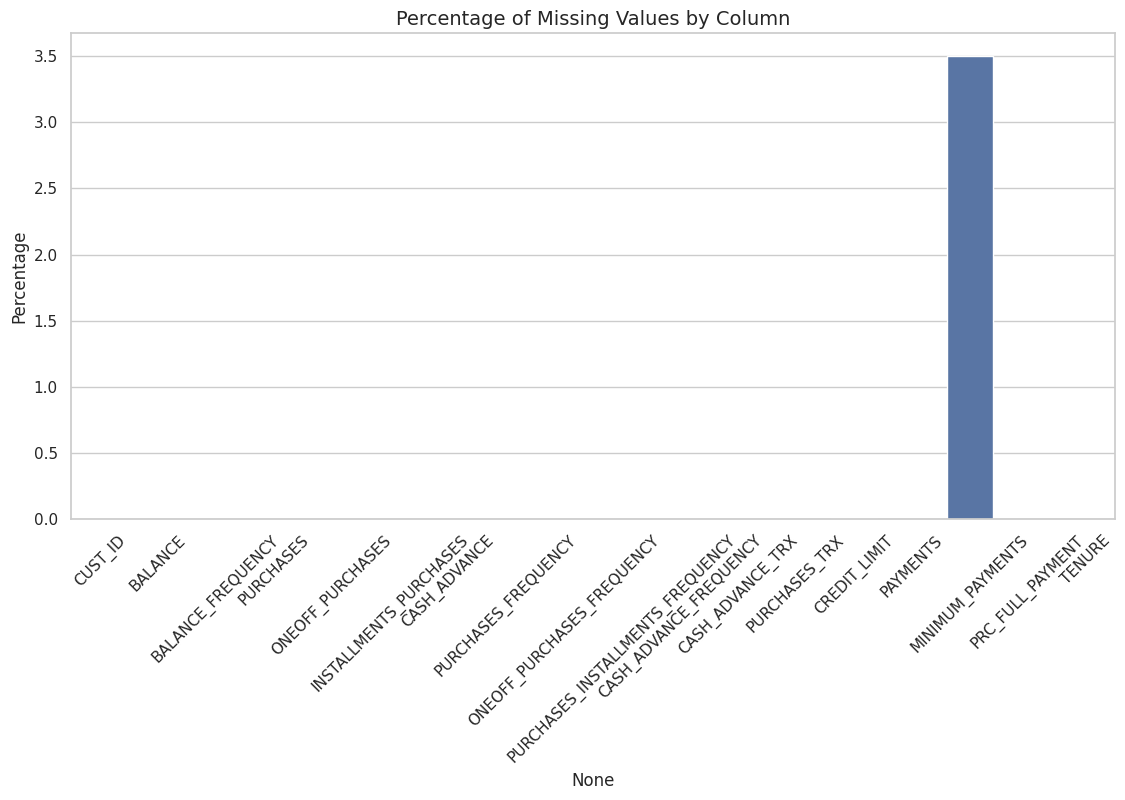

In [31]:
# Identify missing values and calculate the percentage of missing data
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Values Count:")
print(missing_data)
print("\nMissing Values Percentage:")
print(missing_percentage)

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.title('Percentage of Missing Values by Column', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.show()

Handle missing values (e.g., imputation, deletion) and outliers (e.g., capping, removal).

In [32]:
# Handle missing values
# For MINIMUM_PAYMENTS, we'll impute with median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# For CREDIT_LIMIT, we'll impute with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Verify no missing values remain
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


For categorical columns, impute missing values with the most frequent category or a new category.

In [33]:
# For categorical columns, impute missing values with the most frequent category
# In this dataset, we don't have categorical columns with missing values besides CUST_ID which is unique
# But if we had any, we would do:
# df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)

# Since we don't have such columns, let's verify
print("Unique values in CUST_ID:", df['CUST_ID'].nunique())
print("Total rows:", len(df))
print("All CUST_ID are unique:", df['CUST_ID'].nunique() == len(df))

Unique values in CUST_ID: 8950
Total rows: 8950
All CUST_ID are unique: True


Explore the relationship between categorical variables and numerical variables (e.g., calculate the average BALANCE for different CUST_ID categories).

Average BALANCE by TENURE:
TENURE
11    1641.770893
12    1619.158166
10    1251.955773
8     1127.963470
9     1098.752149
6     1095.890702
7     1003.800362
Name: BALANCE, dtype: float64


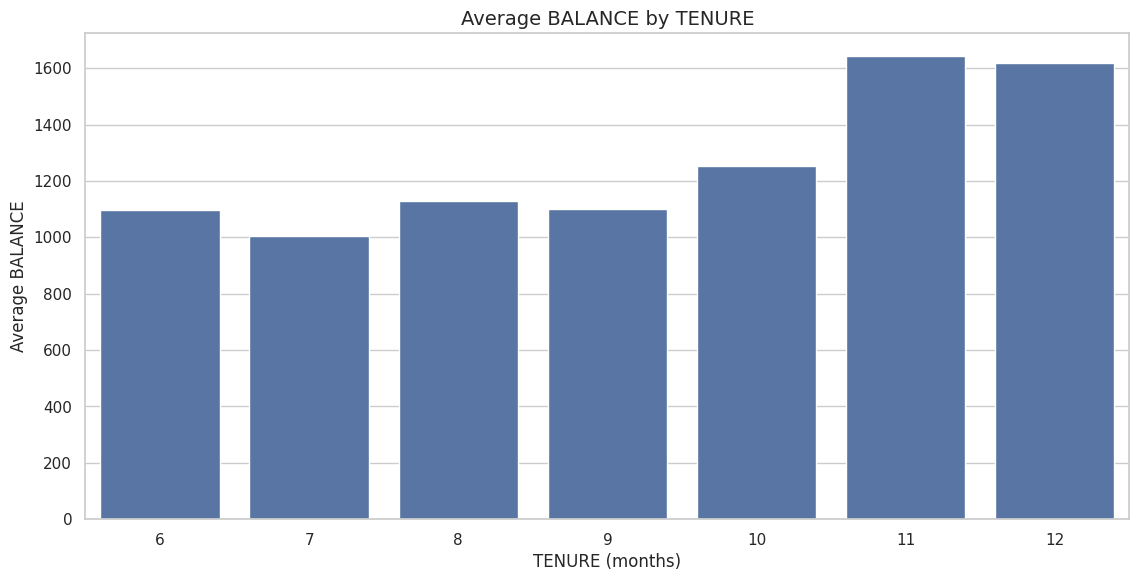

In [34]:
# Explore the relationship between categorical variables and numerical variables
# Let's analyze the average BALANCE for different TENURE categories
tenure_balance = df.groupby('TENURE')['BALANCE'].mean().sort_values(ascending=False)
print("Average BALANCE by TENURE:")
print(tenure_balance)

# Visualize this relationship
plt.figure(figsize=(12, 6))
sns.barplot(x=tenure_balance.index, y=tenure_balance.values)
plt.title('Average BALANCE by TENURE', fontsize=14)
plt.xlabel('TENURE (months)')
plt.ylabel('Average BALANCE')
plt.show()

Analyze the distribution of categorical variables conditioned on other categorical variables (e.g., how many customers with a high credit limit also have a high purchase frequency?).

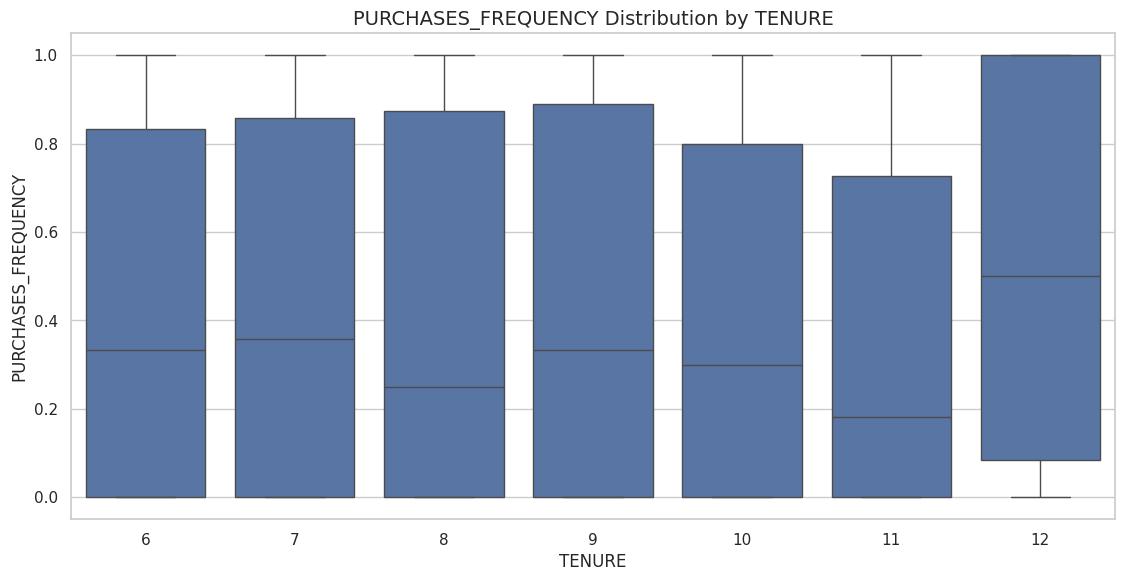


Average PURCHASES_FREQUENCY by TENURE:
TENURE
6     0.463235
7     0.430075
8     0.405612
9     0.406349
10    0.390254
11    0.360399
12    0.506087
Name: PURCHASES_FREQUENCY, dtype: float64


In [35]:
# Analyze the distribution of categorical variables conditioned on other categorical variables
# Let's see how PURCHASES_FREQUENCY varies with TENURE
plt.figure(figsize=(12, 6))
sns.boxplot(x='TENURE', y='PURCHASES_FREQUENCY', data=df)
plt.title('PURCHASES_FREQUENCY Distribution by TENURE', fontsize=14)
plt.show()

# Calculate average PURCHASES_FREQUENCY for each TENURE
avg_purchase_freq = df.groupby('TENURE')['PURCHASES_FREQUENCY'].mean()
print("\nAverage PURCHASES_FREQUENCY by TENURE:")
print(avg_purchase_freq)

Explore the relationship between categorical variables and time-based features (e.g., how does the average purchase amount change over time for different customer segments?).

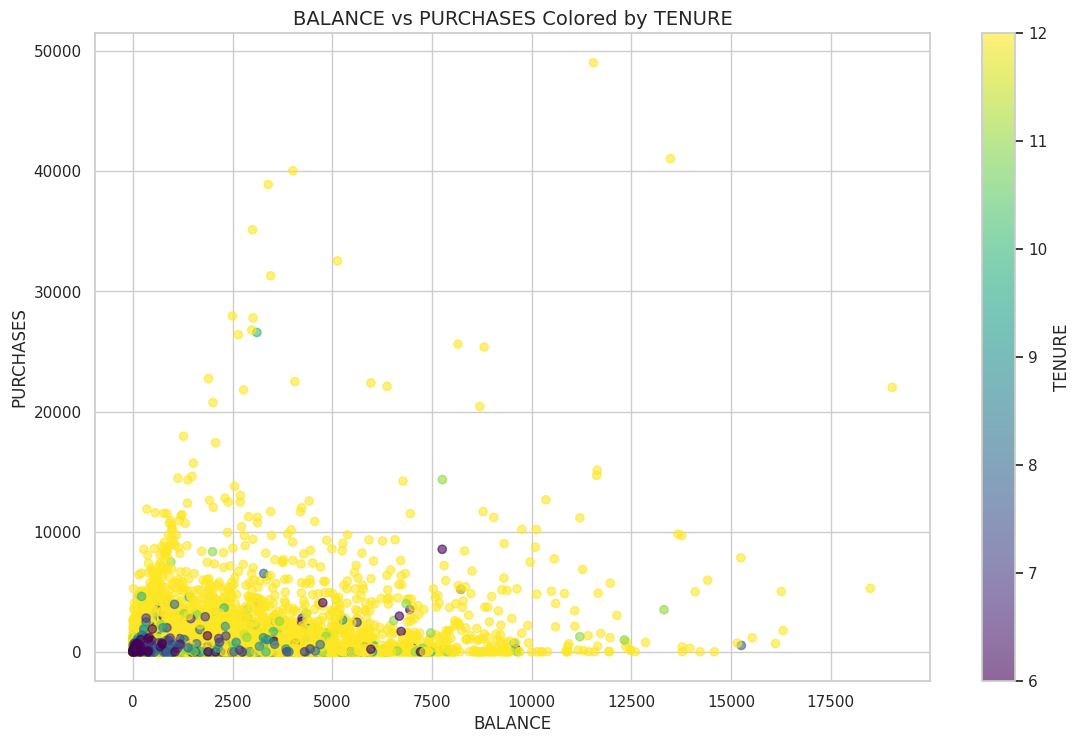

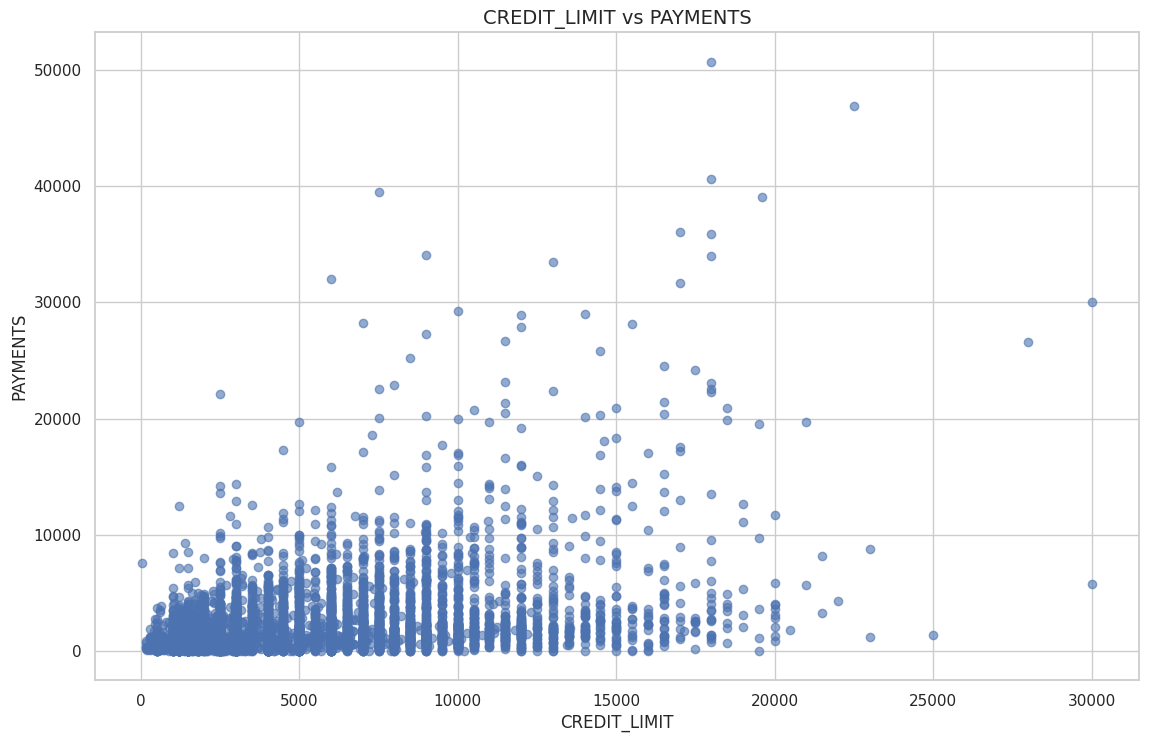

In [36]:
# Identify patterns or trends relevant for customer segmentation
# Let's create a scatter plot of BALANCE vs PURCHACES colored by TENURE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['TENURE'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='TENURE')
plt.title('BALANCE vs PURCHASES Colored by TENURE', fontsize=14)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

# Let's also look at the relationship between CREDIT_LIMIT and PAYMENTS
plt.figure(figsize=(12, 8))
plt.scatter(df['CREDIT_LIMIT'], df['PAYMENTS'], alpha=0.6)
plt.title('CREDIT_LIMIT vs PAYMENTS', fontsize=14)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PAYMENTS')
plt.show()

Identify any patterns or trends in the data that might be relevant for customer segmentation (e.g., are there specific groups of customers with similar purchasing behaviors?).

In [ ]:
# Type your code here

Visualize the distribution of numerical variables using histograms or box plots to identify outliers or skewness in the data.

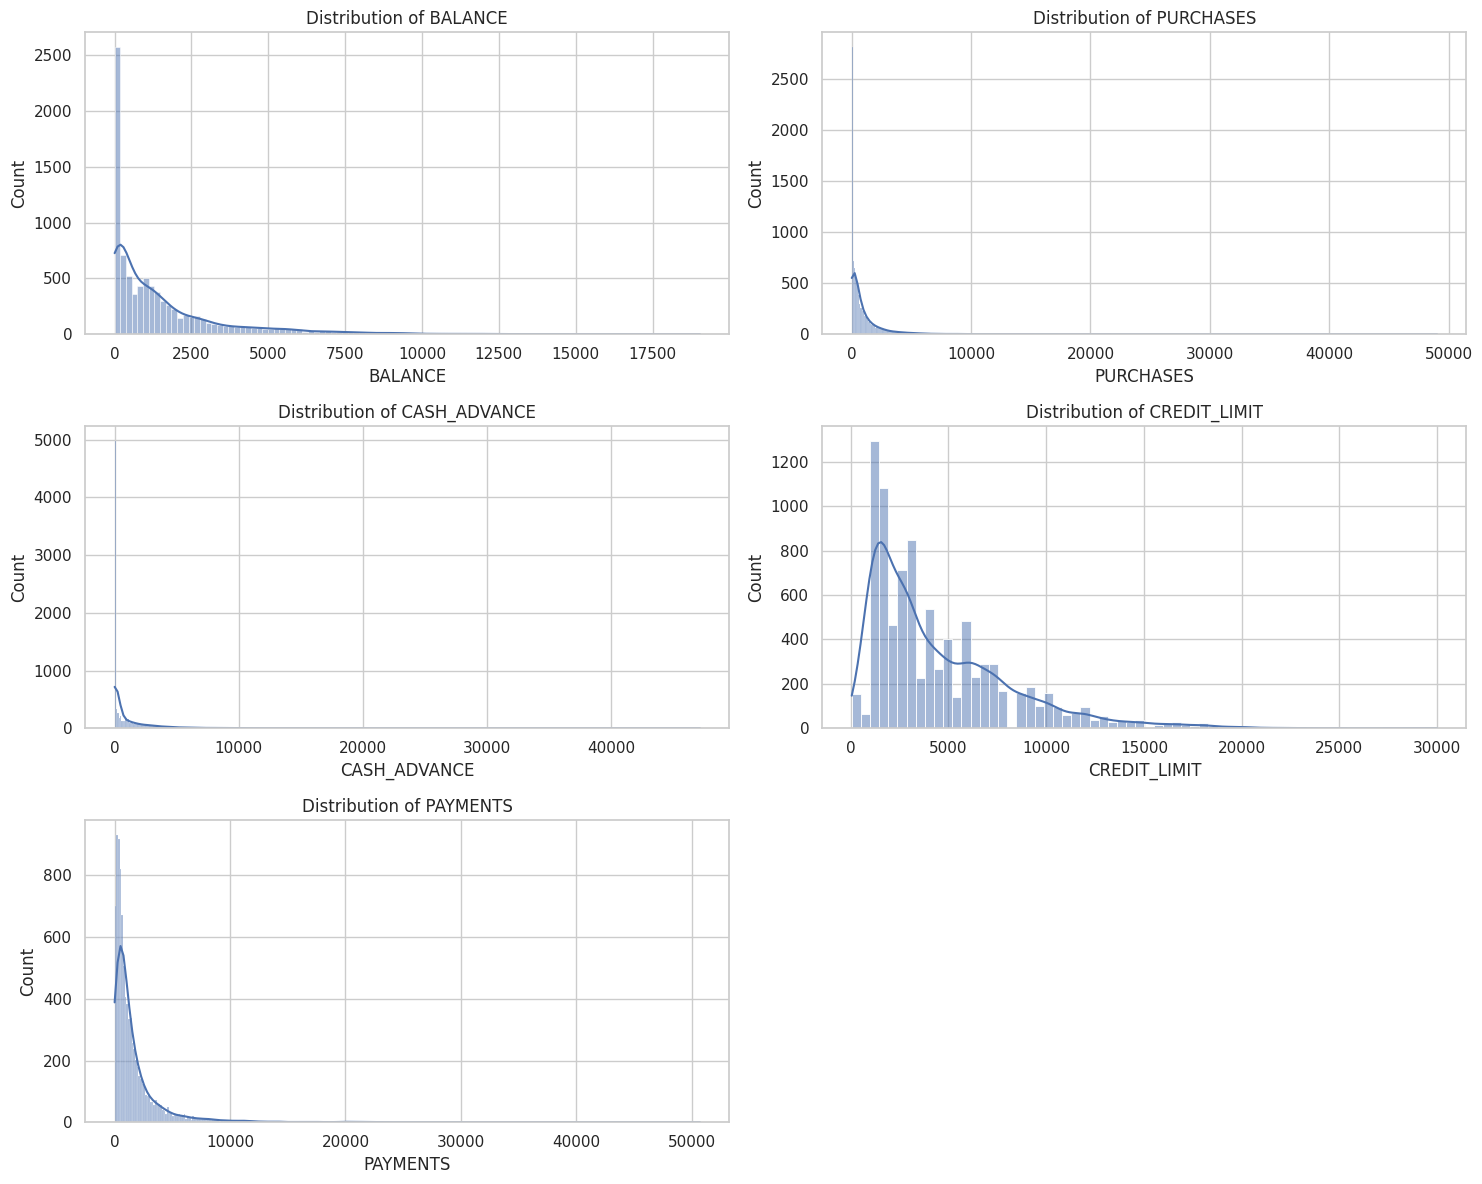

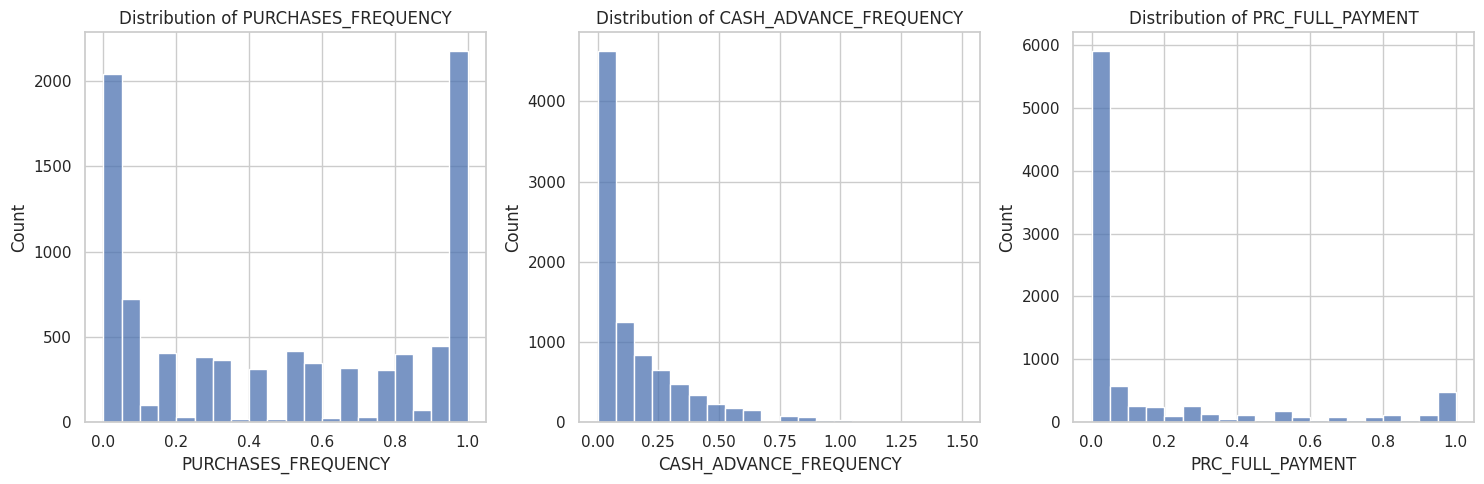

In [37]:
# Visualize the distribution of numerical variables using histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(key_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Additional visualizations for frequency-related columns
freq_cols = ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

plt.figure(figsize=(15, 5))
for i, col in enumerate(freq_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=False, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## EDA

Visualize the distribution of numerical variables: Create histograms, box plots, and density plots to understand the shape, central tendency, and spread of variables like BALANCE, PURCHASES, and ONEOFF_PURCHASES.

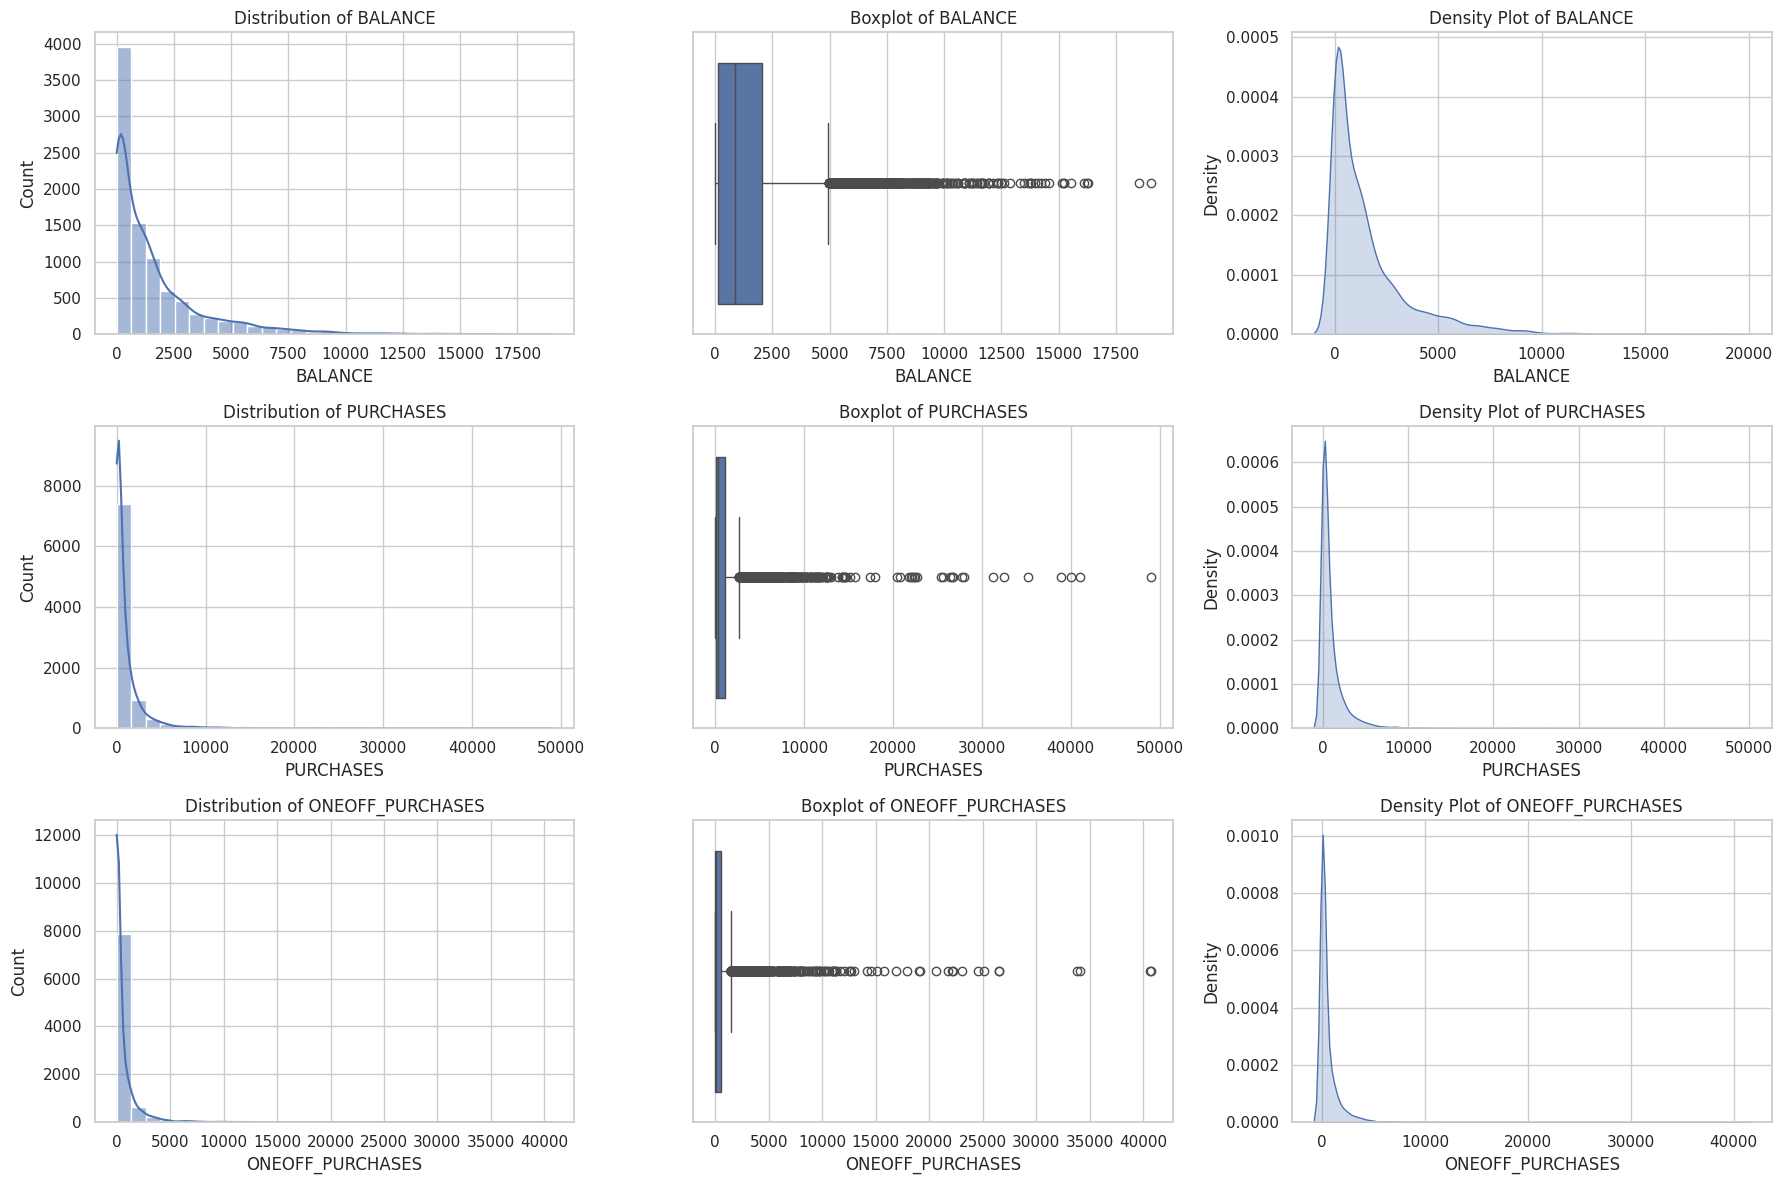

In [38]:
# Set up the figure for multiple plots
plt.figure(figsize=(18, 12))

# BALANCE distribution
plt.subplot(3, 3, 1)
sns.histplot(df['BALANCE'], kde=True, bins=30)
plt.title('Distribution of BALANCE')

plt.subplot(3, 3, 2)
sns.boxplot(x=df['BALANCE'])
plt.title('Boxplot of BALANCE')

plt.subplot(3, 3, 3)
sns.kdeplot(df['BALANCE'], fill=True)
plt.title('Density Plot of BALANCE')

# PURCHASES distribution
plt.subplot(3, 3, 4)
sns.histplot(df['PURCHASES'], kde=True, bins=30)
plt.title('Distribution of PURCHASES')

plt.subplot(3, 3, 5)
sns.boxplot(x=df['PURCHASES'])
plt.title('Boxplot of PURCHASES')

plt.subplot(3, 3, 6)
sns.kdeplot(df['PURCHASES'], fill=True)
plt.title('Density Plot of PURCHASES')

# ONEOFF_PURCHASES distribution
plt.subplot(3, 3, 7)
sns.histplot(df['ONEOFF_PURCHASES'], kde=True, bins=30)
plt.title('Distribution of ONEOFF_PURCHASES')

plt.subplot(3, 3, 8)
sns.boxplot(x=df['ONEOFF_PURCHASES'])
plt.title('Boxplot of ONEOFF_PURCHASES')

plt.subplot(3, 3, 9)
sns.kdeplot(df['ONEOFF_PURCHASES'], fill=True)
plt.title('Density Plot of ONEOFF_PURCHASES')

plt.tight_layout()
plt.show()

Visualize the distribution of categorical variables: Create bar charts or pie charts to show the frequency of different categories in variables like CUST_ID, PURCHASES_FREQUENCY, and CASHADVANCEFREQUENCY.

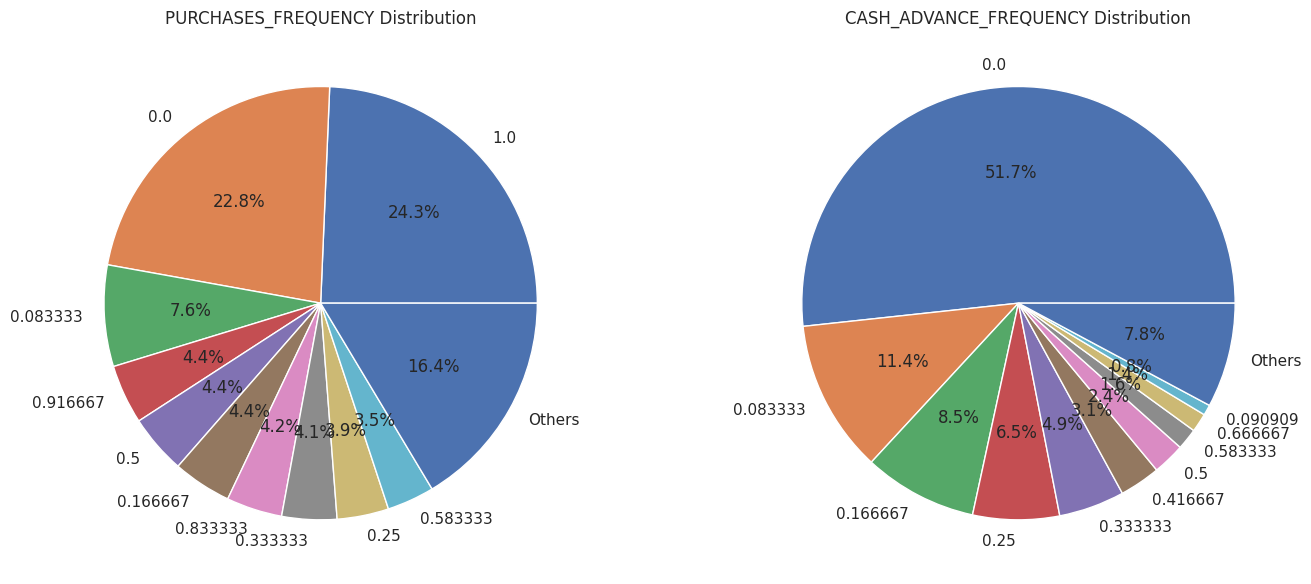

In [40]:
import matplotlib.pyplot as plt

# Function to plot pie with grouped small slices
def plot_grouped_pie(series, title, top_n=10):
    counts = series.value_counts()
    if len(counts) > top_n:
        counts = counts.nlargest(top_n)
        counts['Others'] = series.value_counts().iloc[top_n:].sum()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(title)

plt.figure(figsize=(15, 6))

# PURCHASES_FREQUENCY
plt.subplot(1, 2, 1)
plot_grouped_pie(df['PURCHASES_FREQUENCY'], 'PURCHASES_FREQUENCY Distribution')

# CASH_ADVANCE_FREQUENCY
plt.subplot(1, 2, 2)
plot_grouped_pie(df['CASH_ADVANCE_FREQUENCY'], 'CASH_ADVANCE_FREQUENCY Distribution')

plt.tight_layout()
plt.show()


Visualize the relationship between numerical variables: Create scatter plots to examine the correlation between pairs of numerical variables, such as BALANCE and PURCHASES.

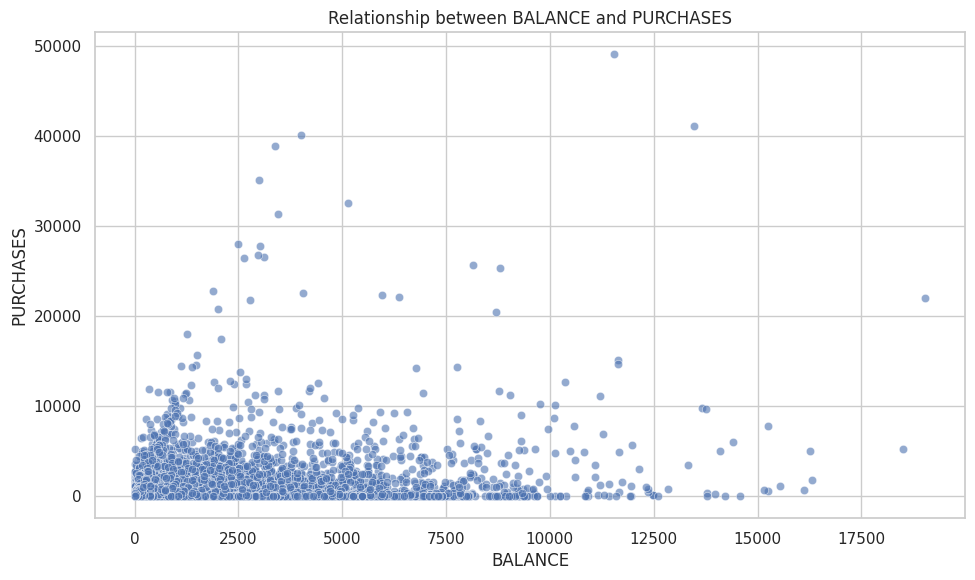

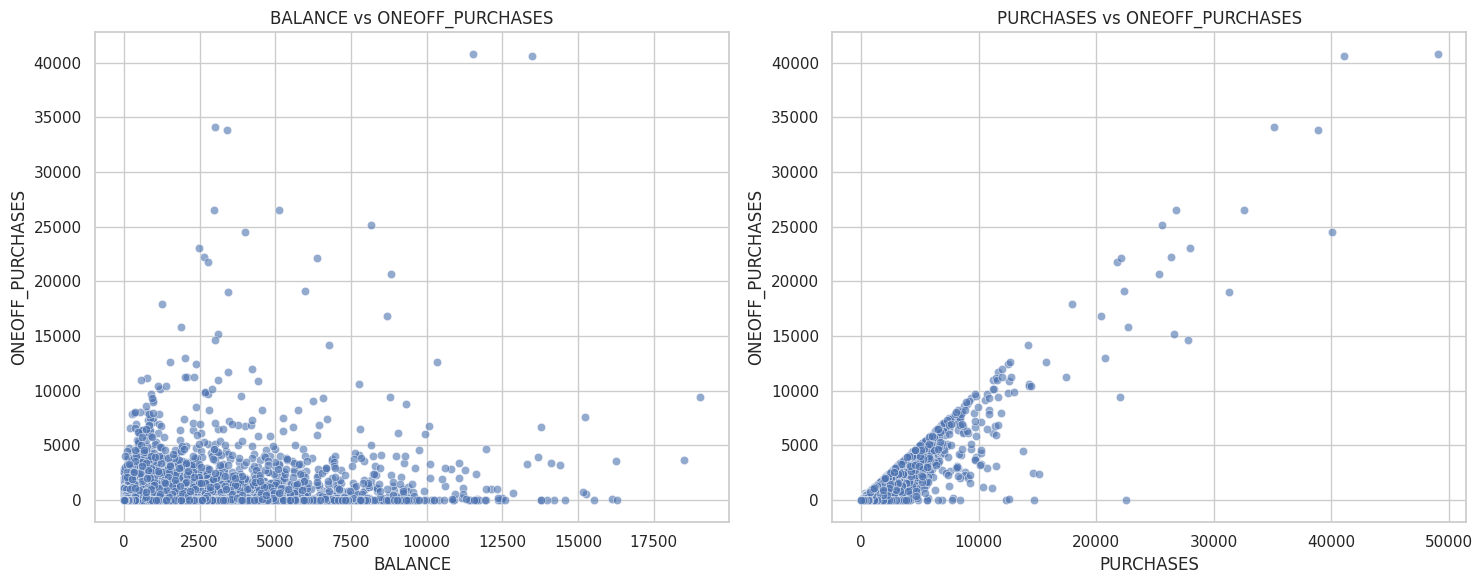

In [41]:
# Scatter plot for BALANCE vs PURCHASES
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df, alpha=0.6)
plt.title('Relationship between BALANCE and PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

# Additional scatter plots for other pairs
plt.figure(figsize=(15, 6))

# BALANCE vs ONEOFF_PURCHASES
plt.subplot(1, 2, 1)
sns.scatterplot(x='BALANCE', y='ONEOFF_PURCHASES', data=df, alpha=0.6)
plt.title('BALANCE vs ONEOFF_PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')

# PURCHASES vs ONEOFF_PURCHASES
plt.subplot(1, 2, 2)
sns.scatterplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df, alpha=0.6)
plt.title('PURCHASES vs ONEOFF_PURCHASES')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')

plt.tight_layout()
plt.show()

Visualize the relationship between categorical and numerical variables: Create box plots or violin plots to compare the distribution of a numerical variable across different categories of a categorical variable (e.g., compare the distribution of PURCHASES for different CUST_ID categories).

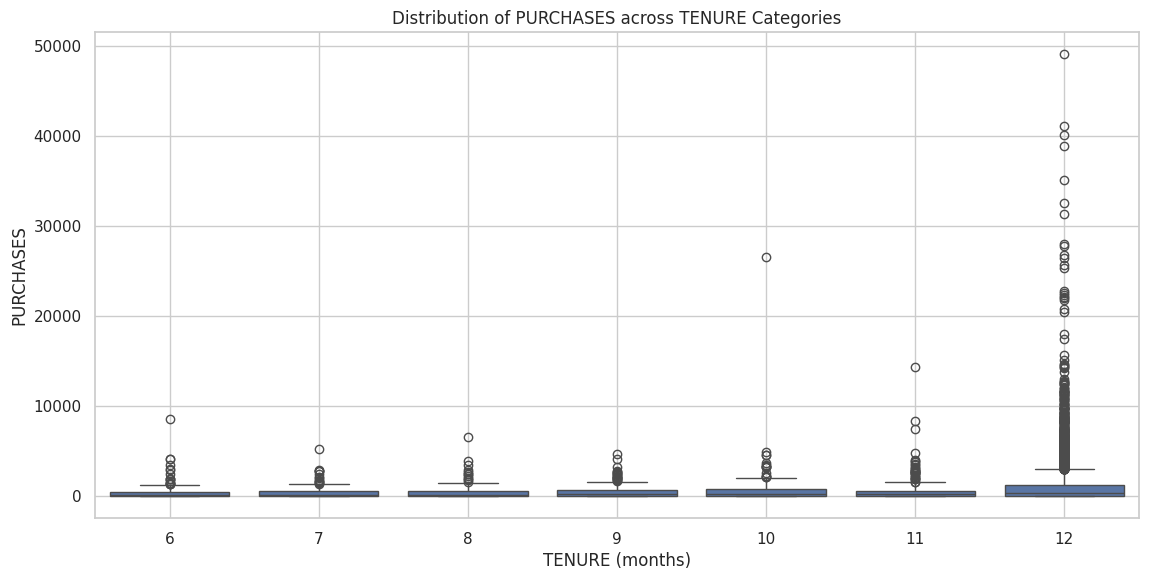

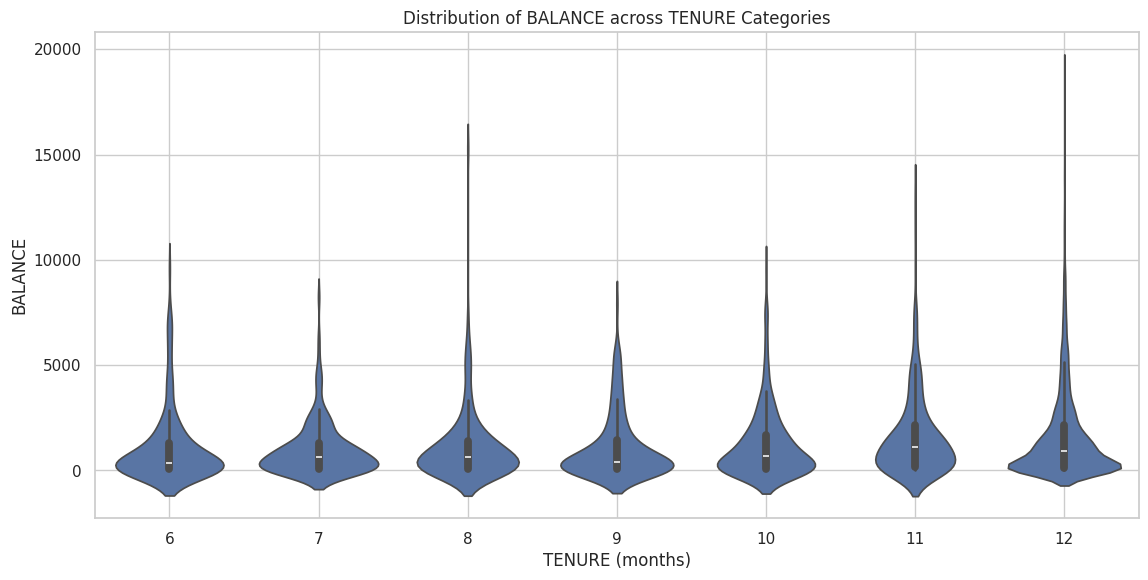

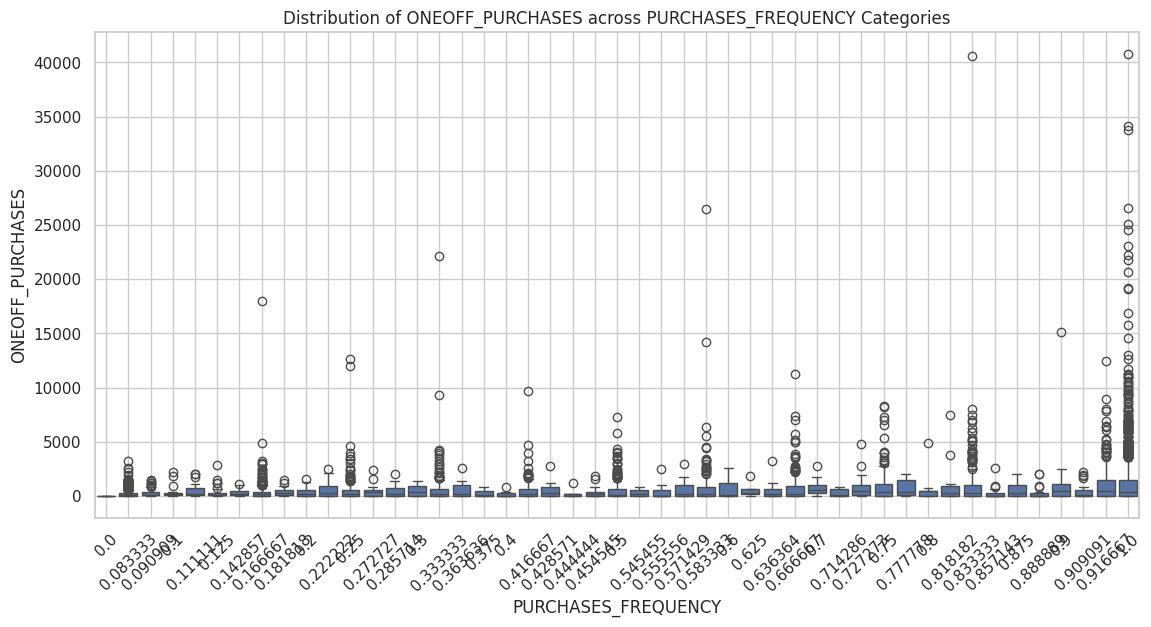

In [42]:
# Box plots for PURCHASES across different TENURE categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Distribution of PURCHASES across TENURE Categories')
plt.xlabel('TENURE (months)')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

# Violin plots for BALANCE across different TENURE categories
plt.figure(figsize=(12, 6))
sns.violinplot(x='TENURE', y='BALANCE', data=df)
plt.title('Distribution of BALANCE across TENURE Categories')
plt.xlabel('TENURE (months)')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

# Box plots for ONEOFF_PURCHASES across different PURCHASES_FREQUENCY categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES', data=df)
plt.title('Distribution of ONEOFF_PURCHASES across PURCHASES_FREQUENCY Categories')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('ONEOFF_PURCHASES')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Visualize the relationship between multiple variables: Create pair plots or correlation matrices to explore the relationships between multiple variables simultaneously.

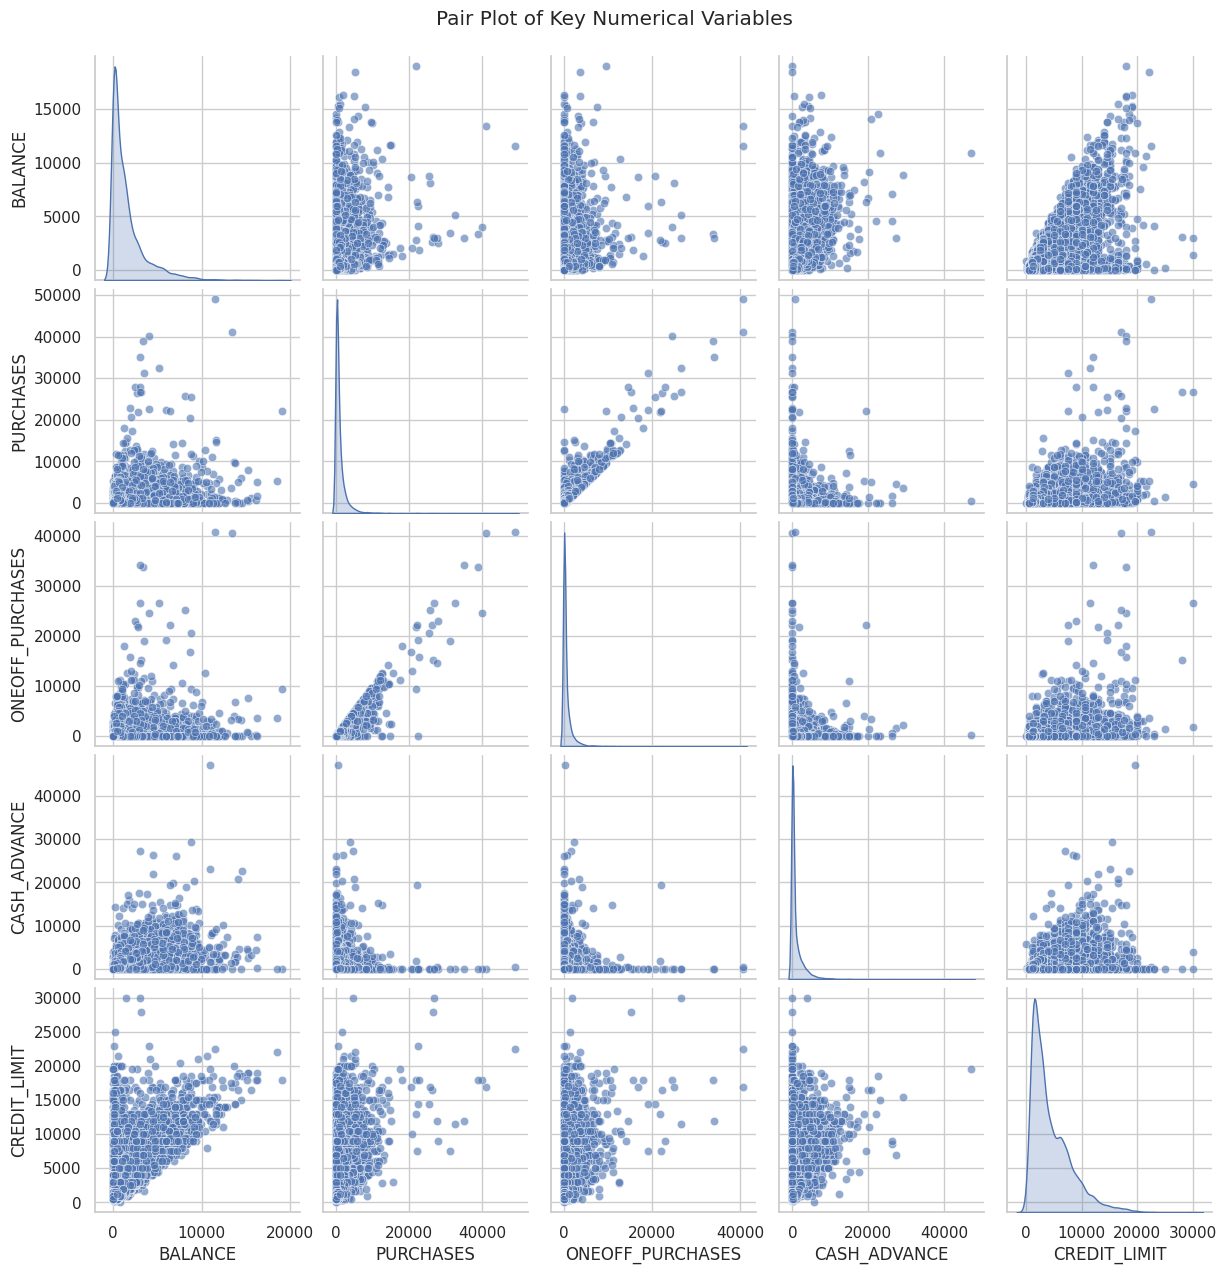

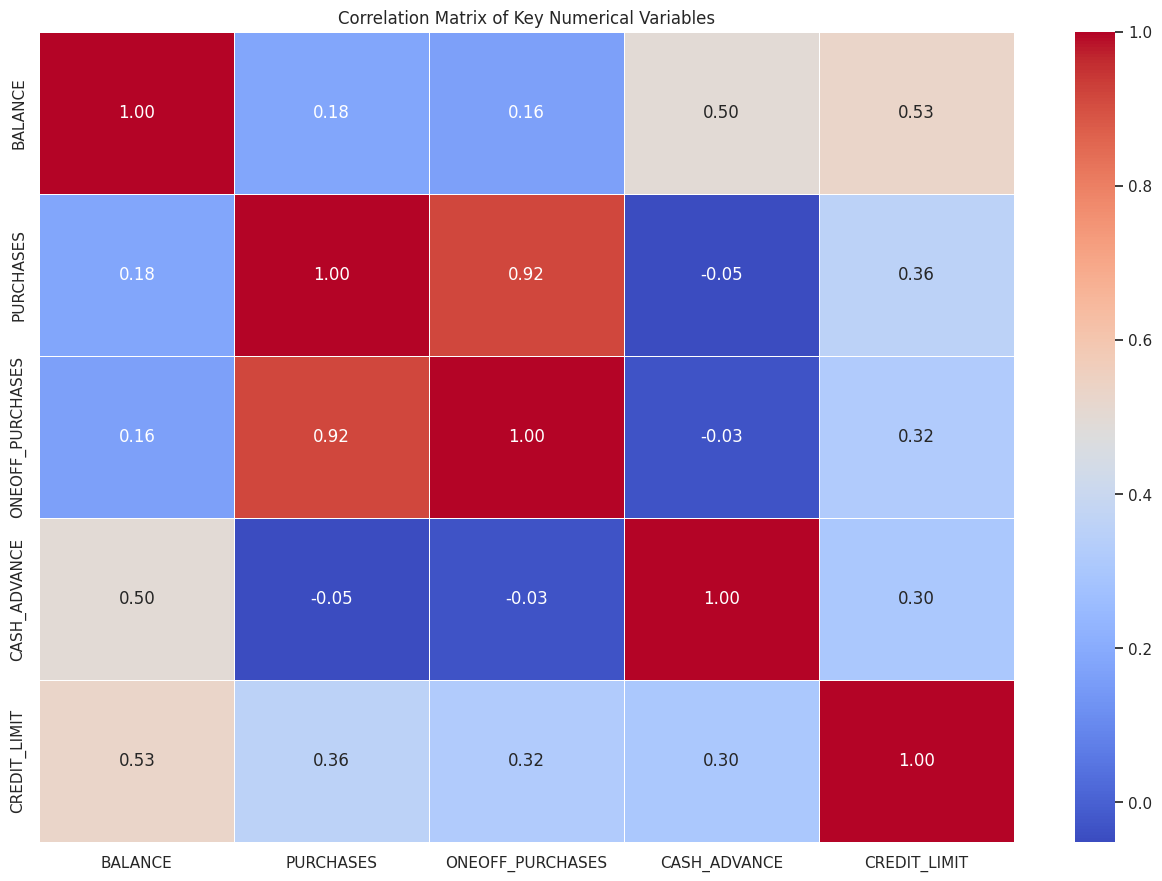

In [43]:
# Pair plot for key numerical variables
key_vars = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
sns.pairplot(df[key_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df[key_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()

Visualize interactions between variables: Create interaction plots to examine how the relationship between two variables changes depending on the value of a third variable.

<Figure size 1200x800 with 0 Axes>

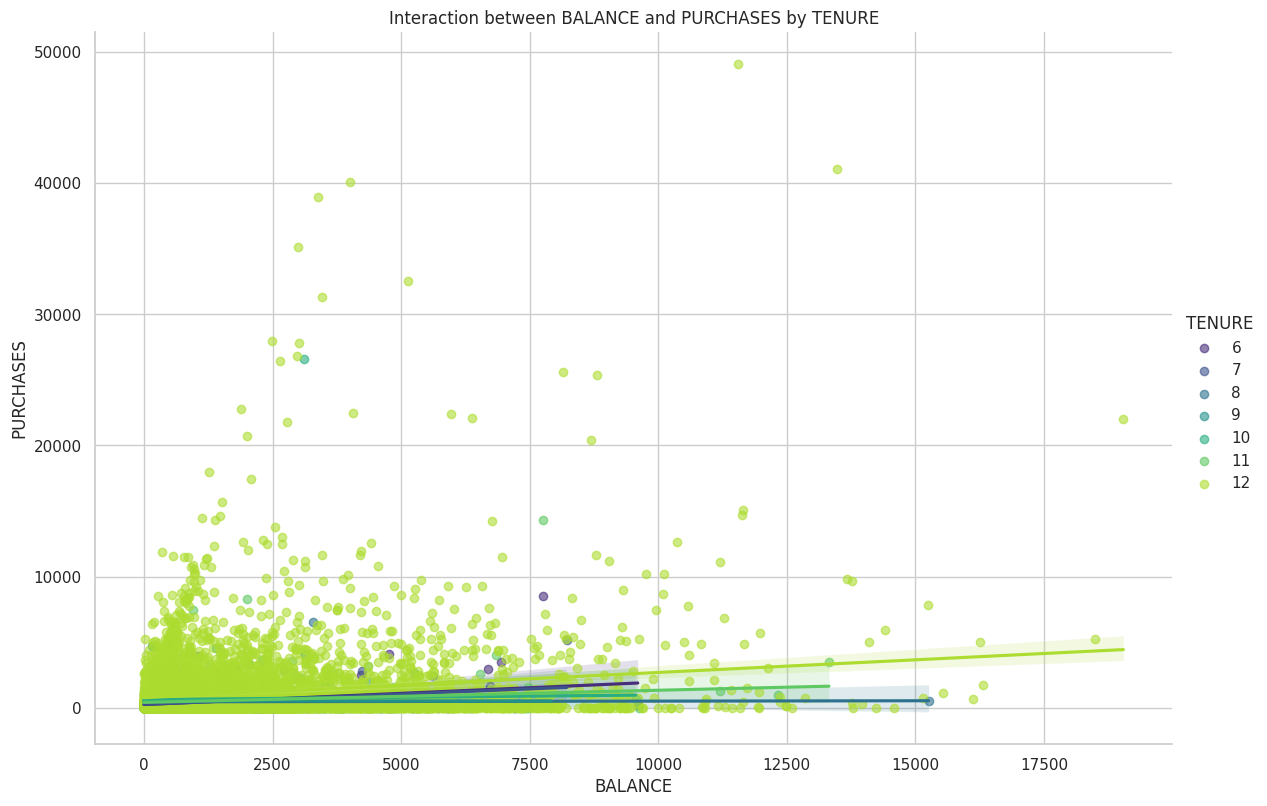

<Figure size 1200x800 with 0 Axes>

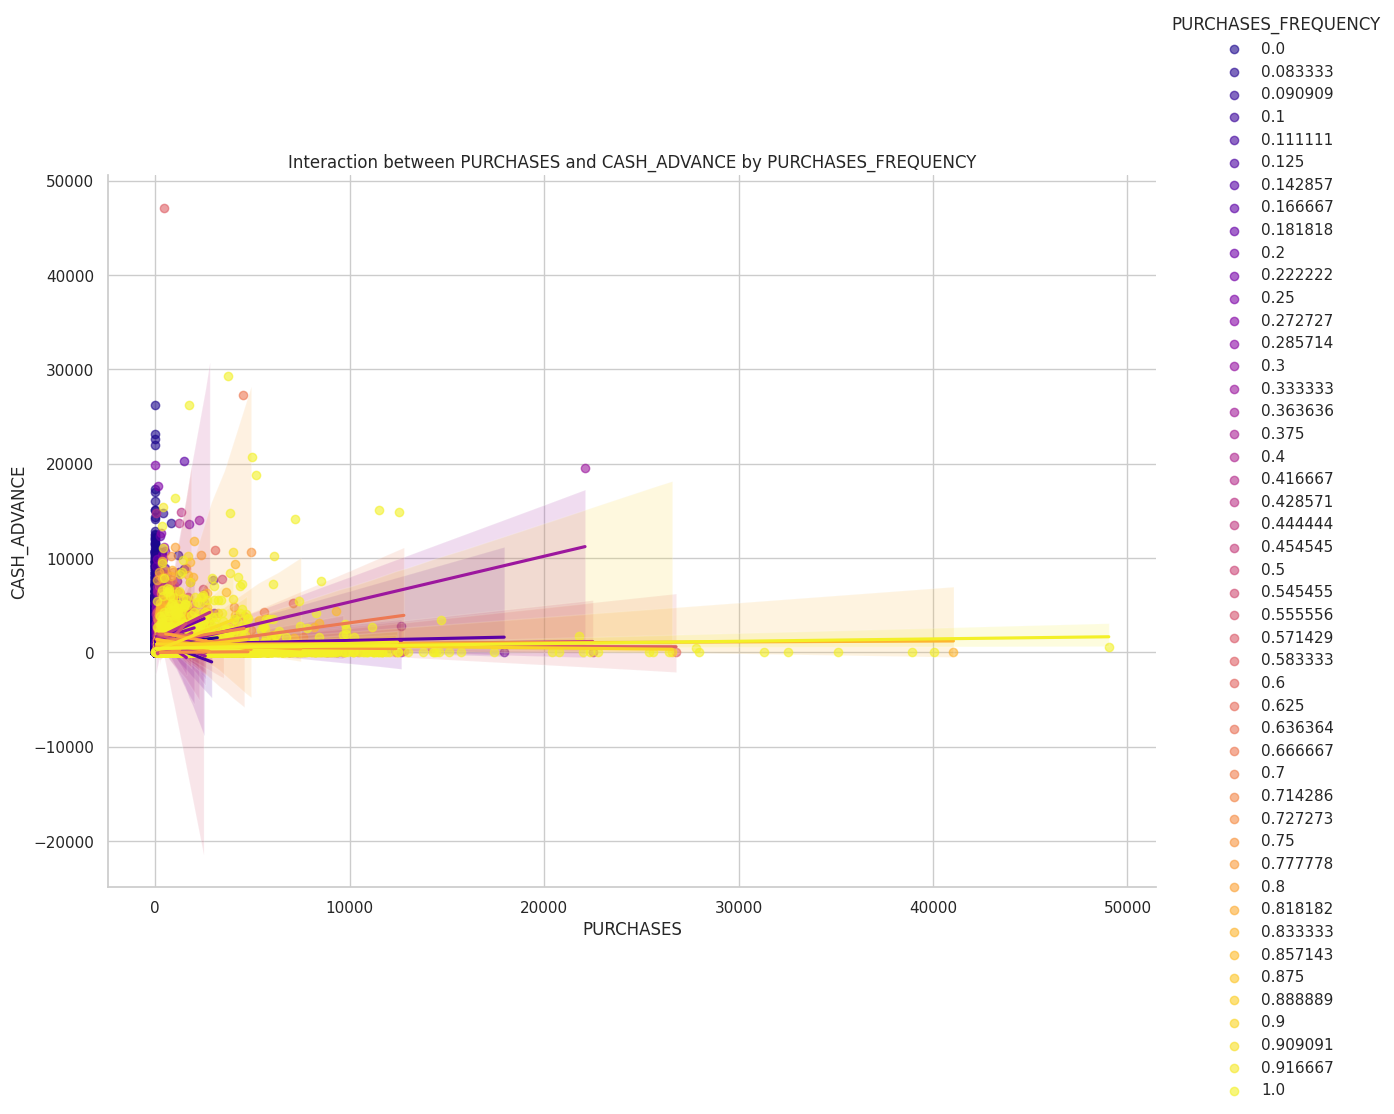

In [44]:
# Interaction plot: How the relationship between BALANCE and PURCHASES changes with TENURE
plt.figure(figsize=(12, 8))
sns.lmplot(x='BALANCE', y='PURCHASES', hue='TENURE', data=df,
           palette='viridis', height=8, aspect=1.5, scatter_kws={'alpha': 0.6})
plt.title('Interaction between BALANCE and PURCHASES by TENURE')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

# Interaction plot: How the relationship between PURCHASES and CASH_ADVANCE changes with PURCHASES_FREQUENCY
plt.figure(figsize=(12, 8))
sns.lmplot(x='PURCHASES', y='CASH_ADVANCE', hue='PURCHASES_FREQUENCY', data=df,
           palette='plasma', height=8, aspect=1.5, scatter_kws={'alpha': 0.6})
plt.title('Interaction between PURCHASES and CASH_ADVANCE by PURCHASES_FREQUENCY')
plt.xlabel('PURCHASES')
plt.ylabel('CASH_ADVANCE')
plt.grid(True)
plt.show()

Visualize trends over time: Create line charts to plot numerical variables against time (if applicable), such as the evolution of BALANCE or PURCHASES over the last 6 months.

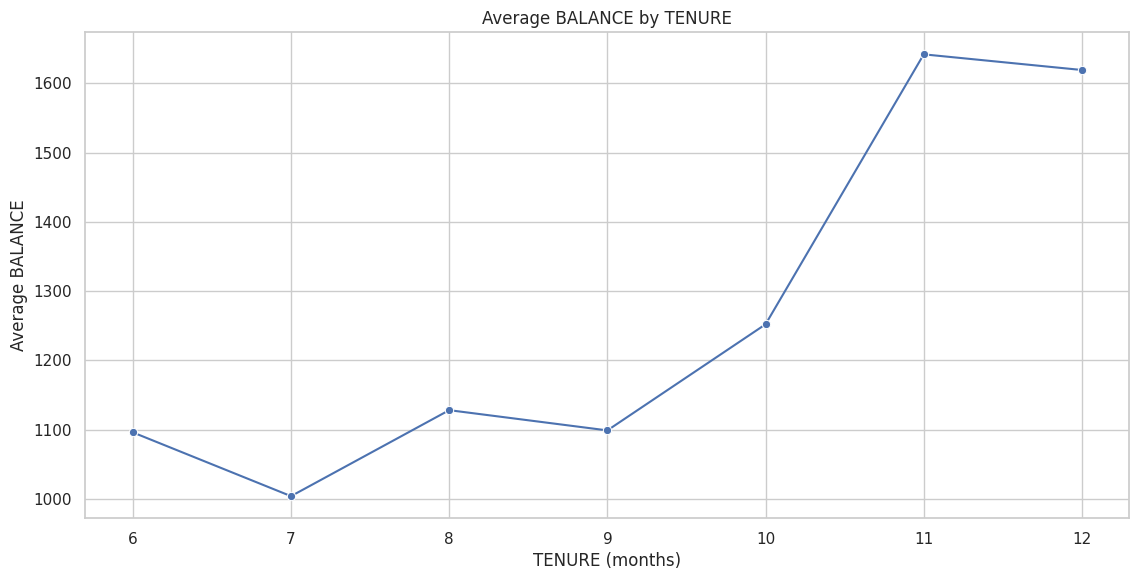

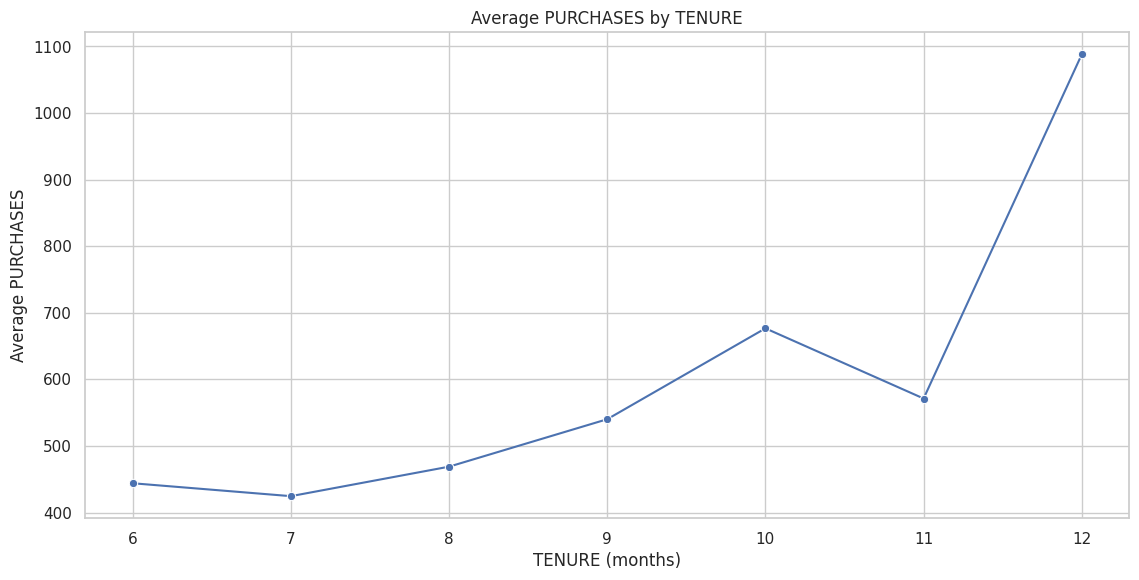

In [45]:
# Since we don't have explicit time data, we'll use TENURE as a proxy for customer lifecycle
# Average BALANCE over TENURE
plt.figure(figsize=(12, 6))
avg_balance_by_tenure = df.groupby('TENURE')['BALANCE'].mean()
sns.lineplot(x=avg_balance_by_tenure.index, y=avg_balance_by_tenure.values, marker='o')
plt.title('Average BALANCE by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Average BALANCE')
plt.grid(True)
plt.show()

# Average PURCHASES over TENURE
plt.figure(figsize=(12, 6))
avg_purchases_by_tenure = df.groupby('TENURE')['PURCHASES'].mean()
sns.lineplot(x=avg_purchases_by_tenure.index, y=avg_purchases_by_tenure.values, marker='o')
plt.title('Average PURCHASES by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Average PURCHASES')
plt.grid(True)
plt.show()

Visualize seasonal patterns: Create seasonal decomposition plots to identify seasonal trends, cyclical patterns, and residuals in time-based data.

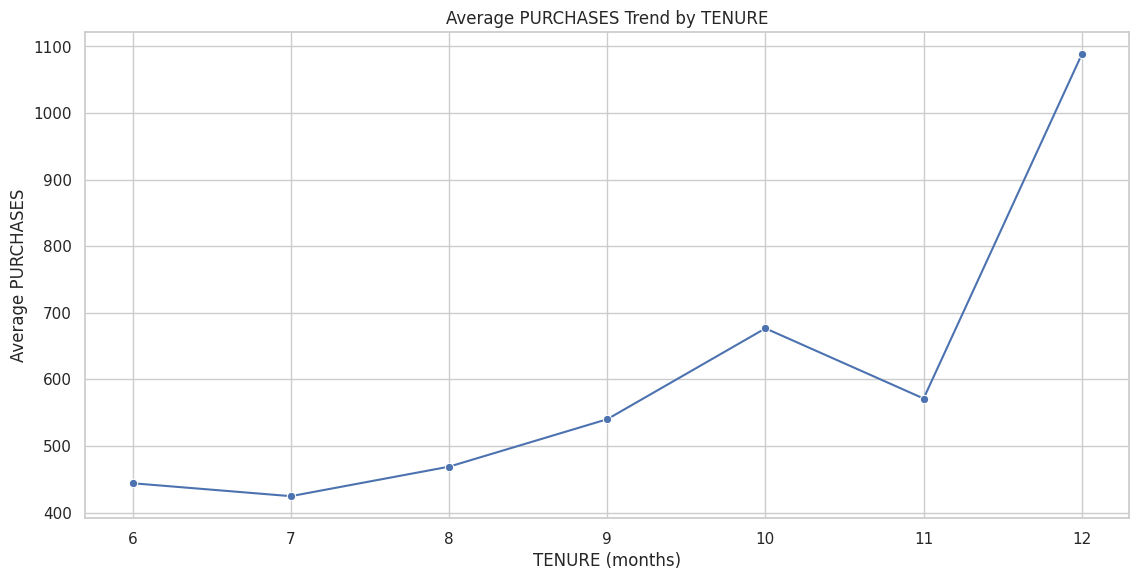

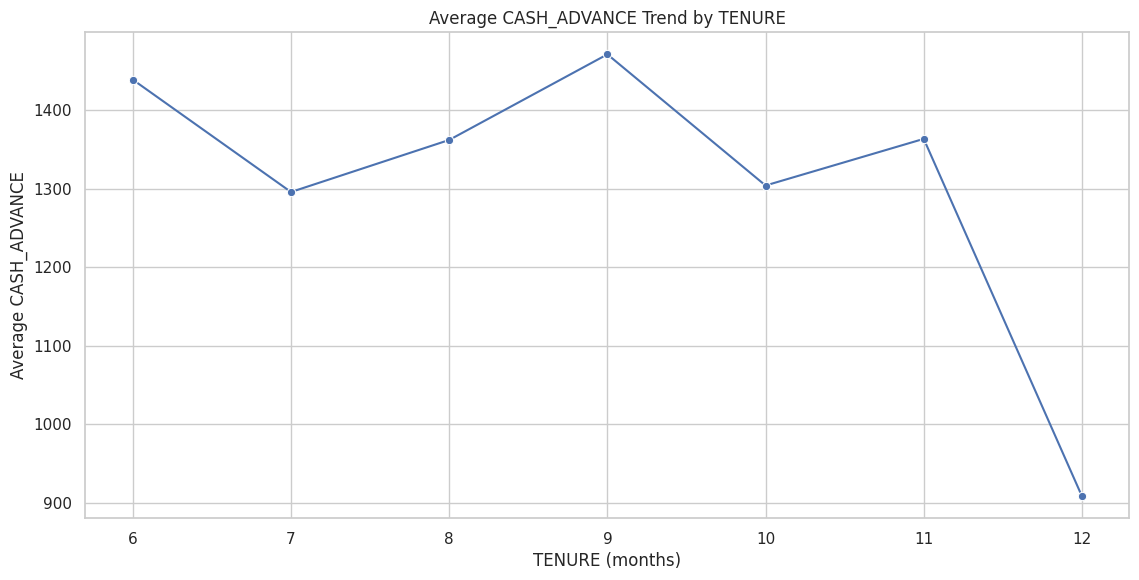

In [46]:
# Since we don't have time-based data, we cannot perform seasonal decomposition
# Instead, we'll look at patterns across different TENURE periods
plt.figure(figsize=(12, 6))
sns.lineplot(x='TENURE', y='PURCHASES', data=df, estimator='mean', ci=None, marker='o')
plt.title('Average PURCHASES Trend by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Average PURCHASES')
plt.grid(True)
plt.show()

# We can also look at the trend for CASH_ADVANCE
plt.figure(figsize=(12, 6))
sns.lineplot(x='TENURE', y='CASH_ADVANCE', data=df, estimator='mean', ci=None, marker='o')
plt.title('Average CASH_ADVANCE Trend by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Average CASH_ADVANCE')
plt.grid(True)
plt.show()

\Visualize the distribution of credit limits: Create a histogram or box plot to understand the distribution of credit limits among customers. Are there any significant differences in credit limits between different customer segments?

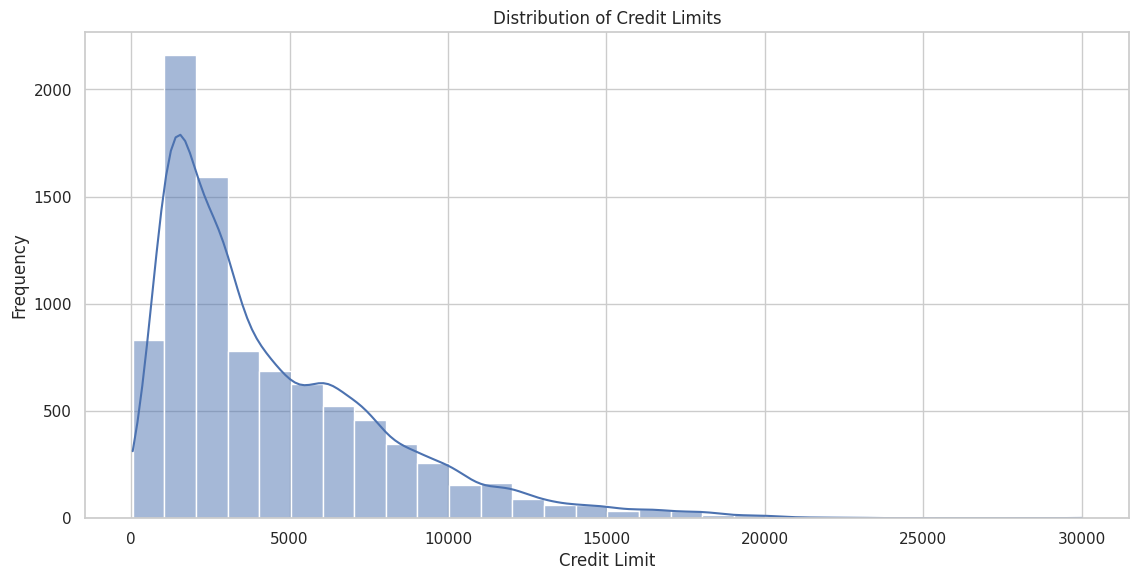

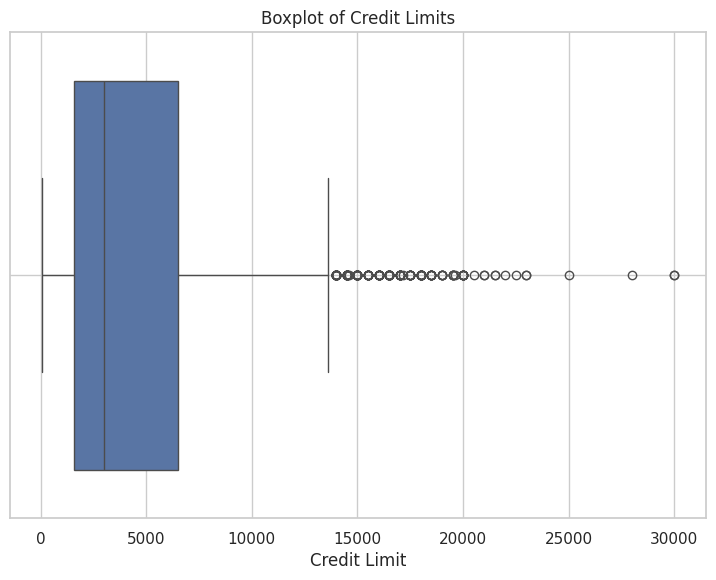

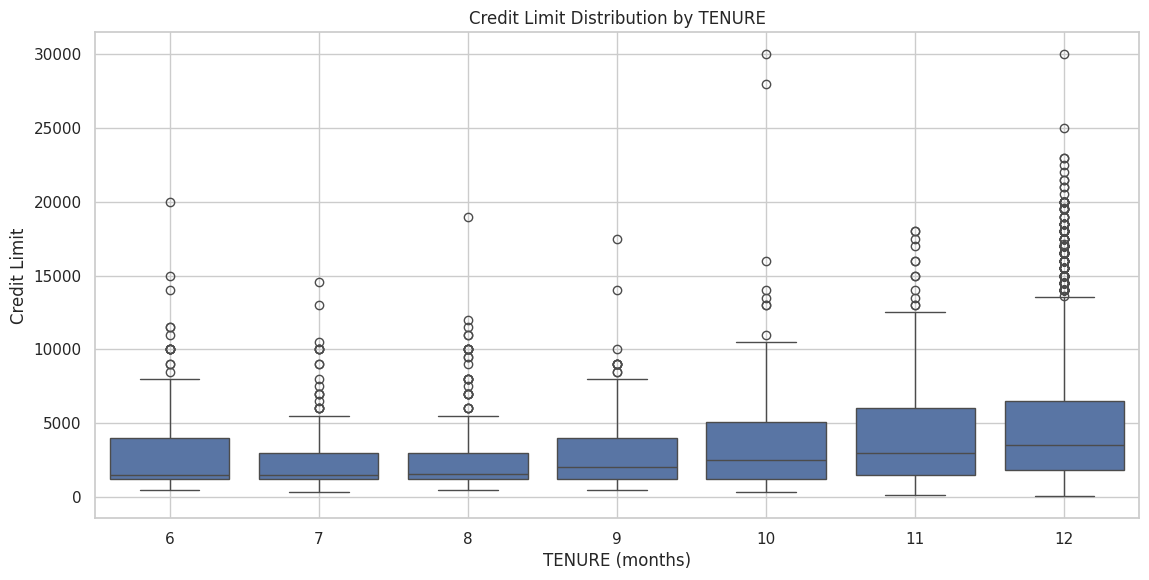

ANOVA test for CREDIT_LIMIT differences across TENURE groups:
F-statistic: 31.5014, p-value: 0.0000
There are significant differences in credit limits between different tenure groups.


In [47]:
# Distribution of credit limits
plt.figure(figsize=(12, 6))
sns.histplot(df['CREDIT_LIMIT'], kde=True, bins=30)
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot of credit limits
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CREDIT_LIMIT'])
plt.title('Boxplot of Credit Limits')
plt.xlabel('Credit Limit')
plt.grid(True)
plt.show()

# Credit limits across different TENURE categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data=df)
plt.title('Credit Limit Distribution by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Credit Limit')
plt.grid(True)
plt.show()

# Statistical test to confirm differences
from scipy.stats import f_oneway

tenure_groups = [df[df['TENURE'] == t]['CREDIT_LIMIT'] for t in df['TENURE'].unique()]
f_stat, p_val = f_oneway(*tenure_groups)
print(f"ANOVA test for CREDIT_LIMIT differences across TENURE groups:")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There are significant differences in credit limits between different tenure groups.")
else:
    print("There are no significant differences in credit limits between different tenure groups.")

Visualize the relationship between payment patterns and delinquency: Create a scatter plot to examine the relationship between the percentage of full payments made (PRCFULLPAYMENT) and the number of times the minimum payment was not made (MINIMUM_PAYMENTS). Are there any patterns indicating which customers are more likely to be delinquent?

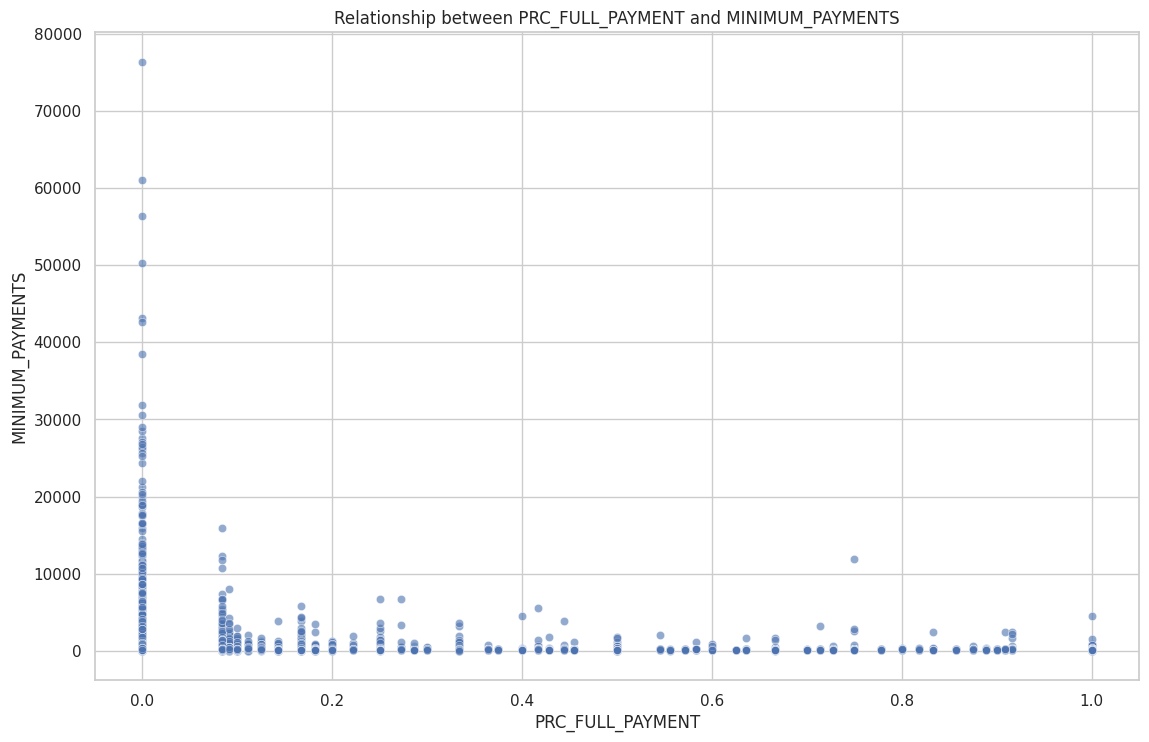

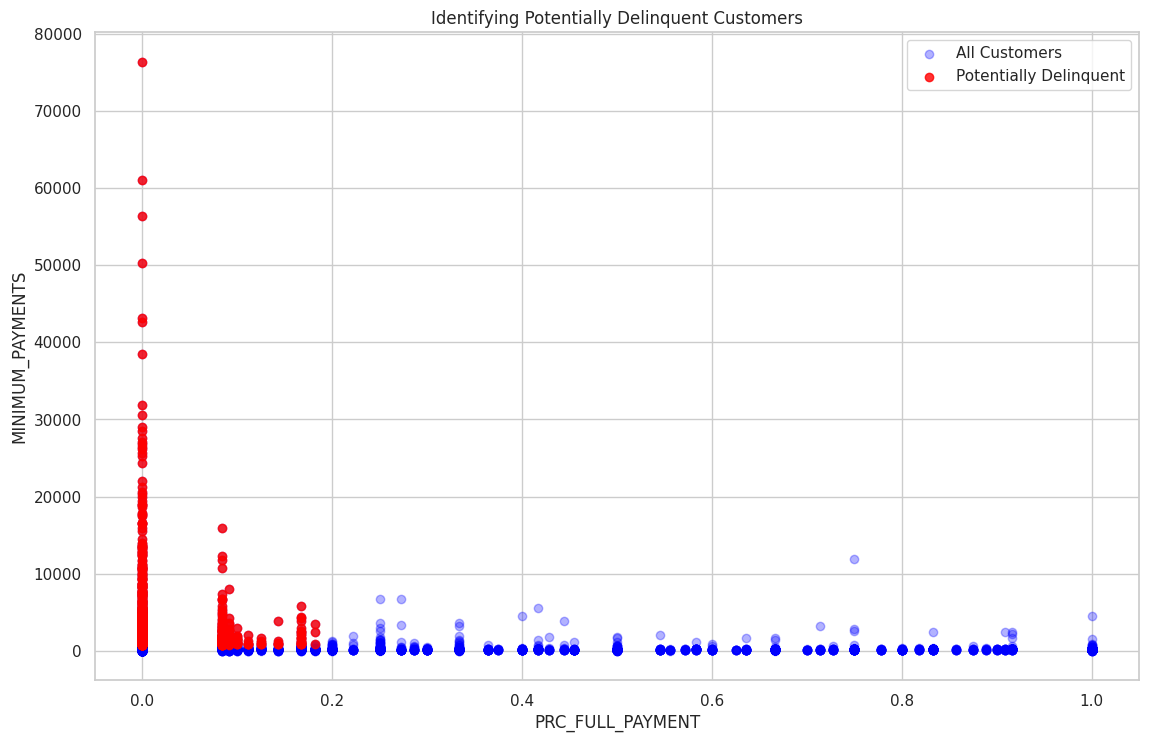

Number of potentially delinquent customers: 2175
Percentage of potentially delinquent customers: 24.30%


In [48]:
# Scatter plot of PRC_FULL_PAYMENT vs MINIMUM_PAYMENTS
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PRC_FULL_PAYMENT', y='MINIMUM_PAYMENTS', data=df, alpha=0.6)
plt.title('Relationship between PRC_FULL_PAYMENT and MINIMUM_PAYMENTS')
plt.xlabel('PRC_FULL_PAYMENT')
plt.ylabel('MINIMUM_PAYMENTS')
plt.grid(True)
plt.show()

# Identify potentially delinquent customers (low PRC_FULL_PAYMENT and high MINIMUM_PAYMENTS)
delinquent_threshold = df['MINIMUM_PAYMENTS'].quantile(0.75)
low_full_payment = 0.2
delinquent_customers = df[(df['PRC_FULL_PAYMENT'] < low_full_payment) &
                          (df['MINIMUM_PAYMENTS'] > delinquent_threshold)]

# Highlight delinquent customers
plt.figure(figsize=(12, 8))
plt.scatter(df['PRC_FULL_PAYMENT'], df['MINIMUM_PAYMENTS'], alpha=0.3, color='blue', label='All Customers')
plt.scatter(delinquent_customers['PRC_FULL_PAYMENT'], delinquent_customers['MINIMUM_PAYMENTS'],
            alpha=0.8, color='red', label='Potentially Delinquent')
plt.title('Identifying Potentially Delinquent Customers')
plt.xlabel('PRC_FULL_PAYMENT')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of potentially delinquent customers: {len(delinquent_customers)}")
print(f"Percentage of potentially delinquent customers: {len(delinquent_customers)/len(df)*100:.2f}%")

Visualize the distribution of tenure: Create a histogram or bar chart to understand the distribution of credit card tenure among customers. Are there any significant differences in tenure between different customer segments?

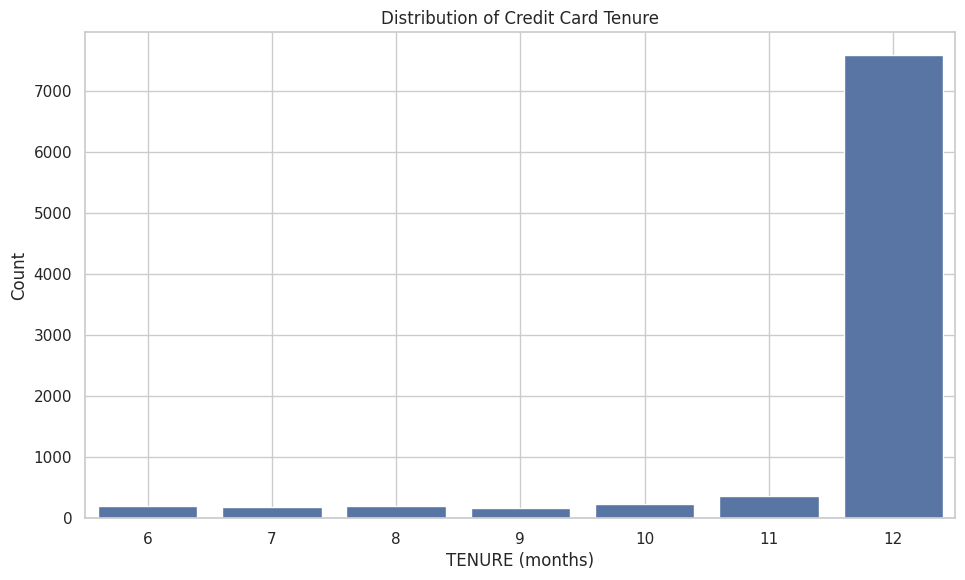

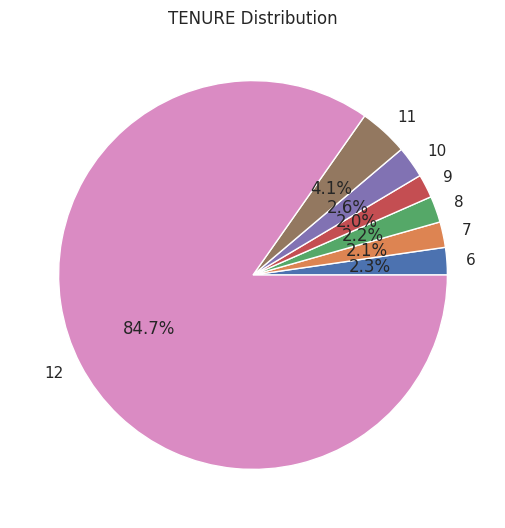

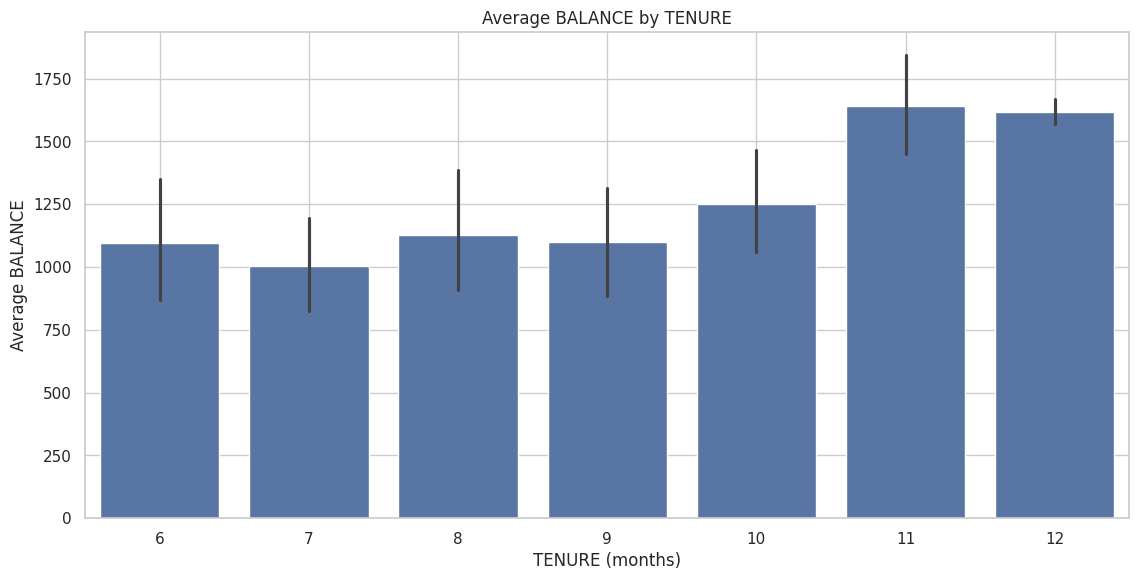

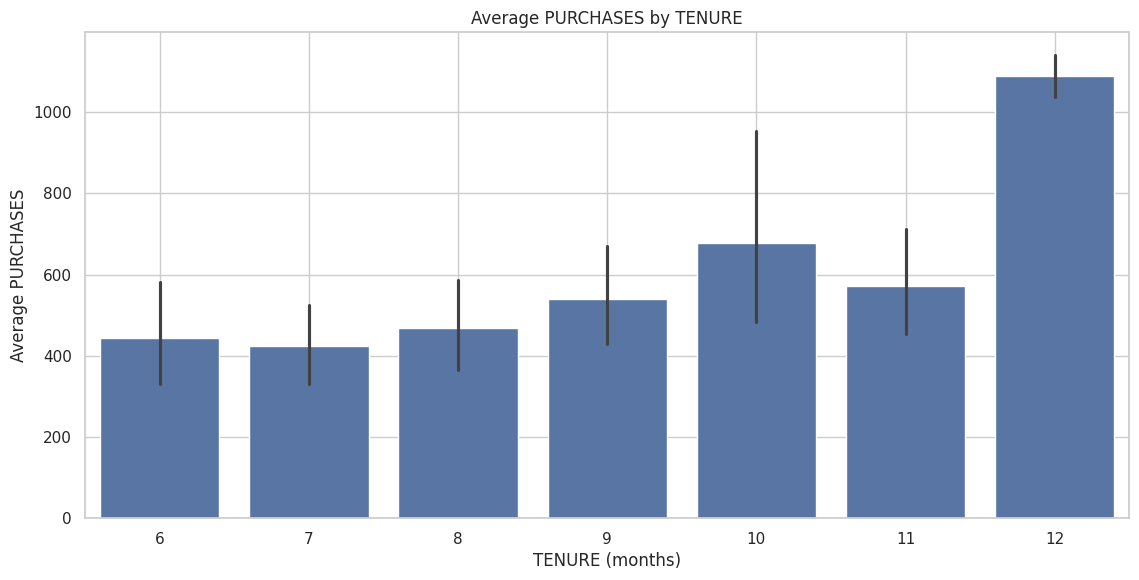

In [49]:
# Distribution of tenure
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', data=df)
plt.title('Distribution of Credit Card Tenure')
plt.xlabel('TENURE (months)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Pie chart of tenure distribution
plt.figure(figsize=(10, 6))
tenure_counts = df['TENURE'].value_counts().sort_index()
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%')
plt.title('TENURE Distribution')
plt.show()

# Compare average BALANCE across different TENURE groups
plt.figure(figsize=(12, 6))
sns.barplot(x='TENURE', y='BALANCE', data=df, estimator=np.mean)
plt.title('Average BALANCE by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Average BALANCE')
plt.grid(True)
plt.show()

# Compare average PURCHASES across different TENURE groups
plt.figure(figsize=(12, 6))
sns.barplot(x='TENURE', y='PURCHASES', data=df, estimator=np.mean)
plt.title('Average PURCHASES by TENURE')
plt.xlabel('TENURE (months)')
plt.ylabel('Average PURCHASES')
plt.grid(True)
plt.show()

Visualize the relationship between purchase frequency and purchase amount: Create a scatter plot to examine the relationship between the frequency of purchases (PURCHASES_FREQUENCY) and the total purchase amount (PURCHASES). Are there any patterns indicating which customers are more likely to make larger purchases?

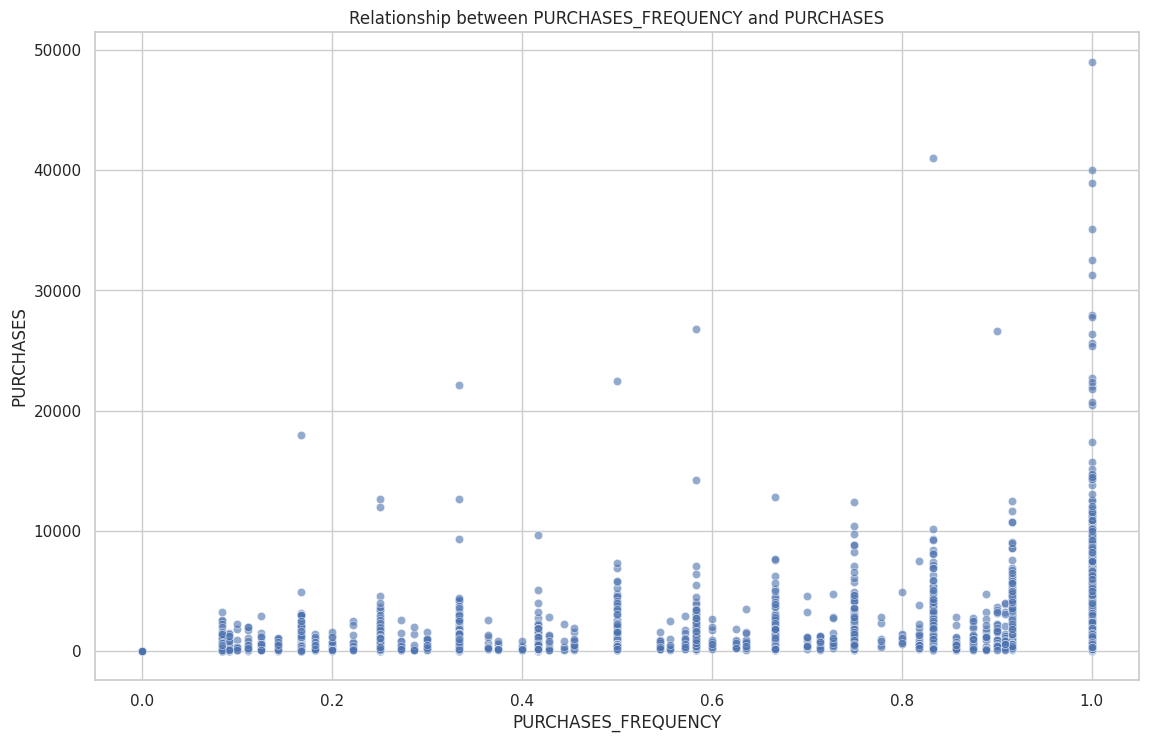

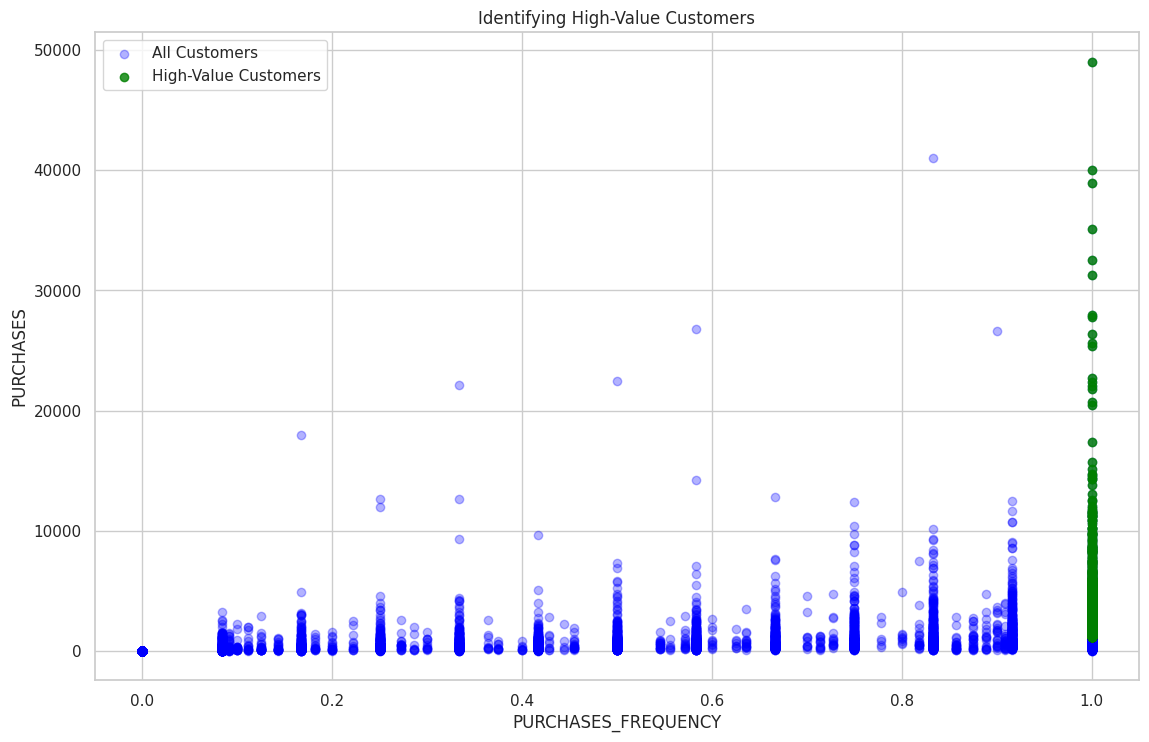

Number of high-value customers: 1173
Percentage of high-value customers: 13.11%


In [50]:
# Scatter plot of PURCHASES_FREQUENCY vs PURCHASES
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PURCHASES_FREQUENCY', y='PURCHASES', data=df, alpha=0.6)
plt.title('Relationship between PURCHASES_FREQUENCY and PURCHASES')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

# Identify high-value customers (high purchase frequency and high purchase amount)
high_freq_threshold = df['PURCHASES_FREQUENCY'].quantile(0.75)
high_amount_threshold = df['PURCHASES'].quantile(0.75)
high_value_customers = df[(df['PURCHASES_FREQUENCY'] > high_freq_threshold) &
                         (df['PURCHASES'] > high_amount_threshold)]

# Highlight high-value customers
plt.figure(figsize=(12, 8))
plt.scatter(df['PURCHASES_FREQUENCY'], df['PURCHASES'], alpha=0.3, color='blue', label='All Customers')
plt.scatter(high_value_customers['PURCHASES_FREQUENCY'], high_value_customers['PURCHASES'],
            alpha=0.8, color='green', label='High-Value Customers')
plt.title('Identifying High-Value Customers')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of high-value customers: {len(high_value_customers)}")
print(f"Percentage of high-value customers: {len(high_value_customers)/len(df)*100:.2f}%")

Visualize the relationship between cash advance usage and purchase behavior: Create a scatter plot to examine the relationship between the amount of cash advances (CASH_ADVANCE) and the total purchase amount (PURCHASES). Are there any patterns indicating which customers are more likely to use cash advances and how this affects their purchase behavior?

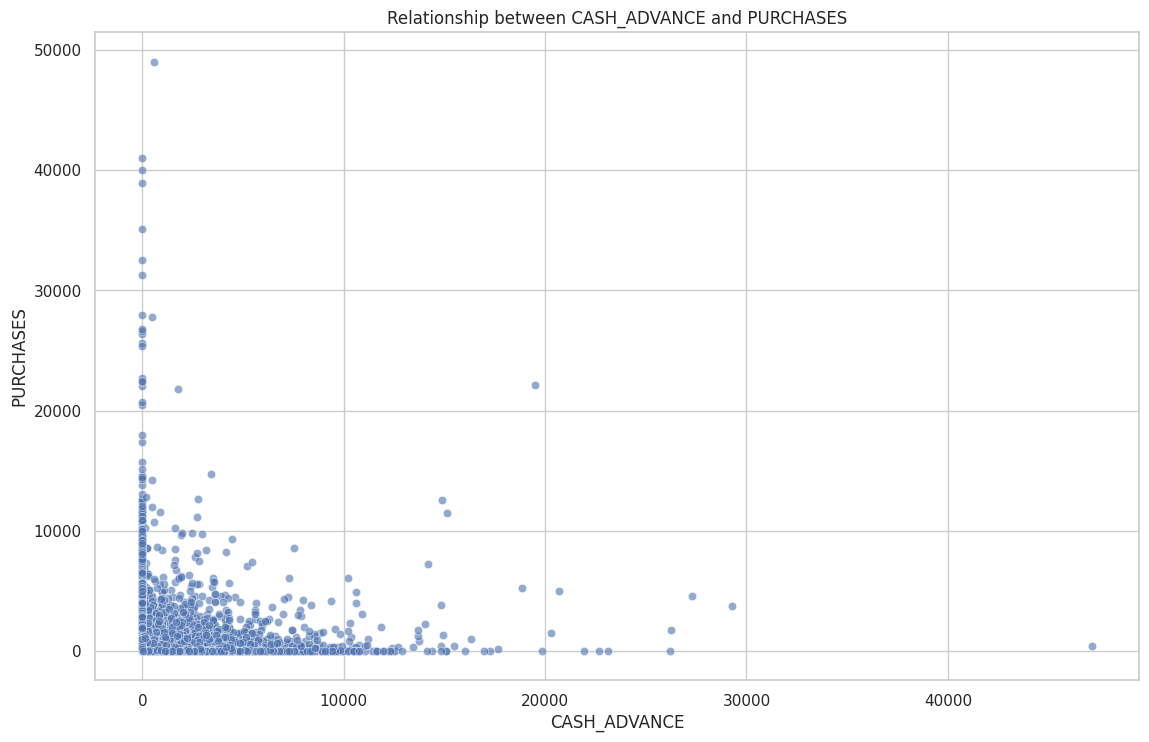

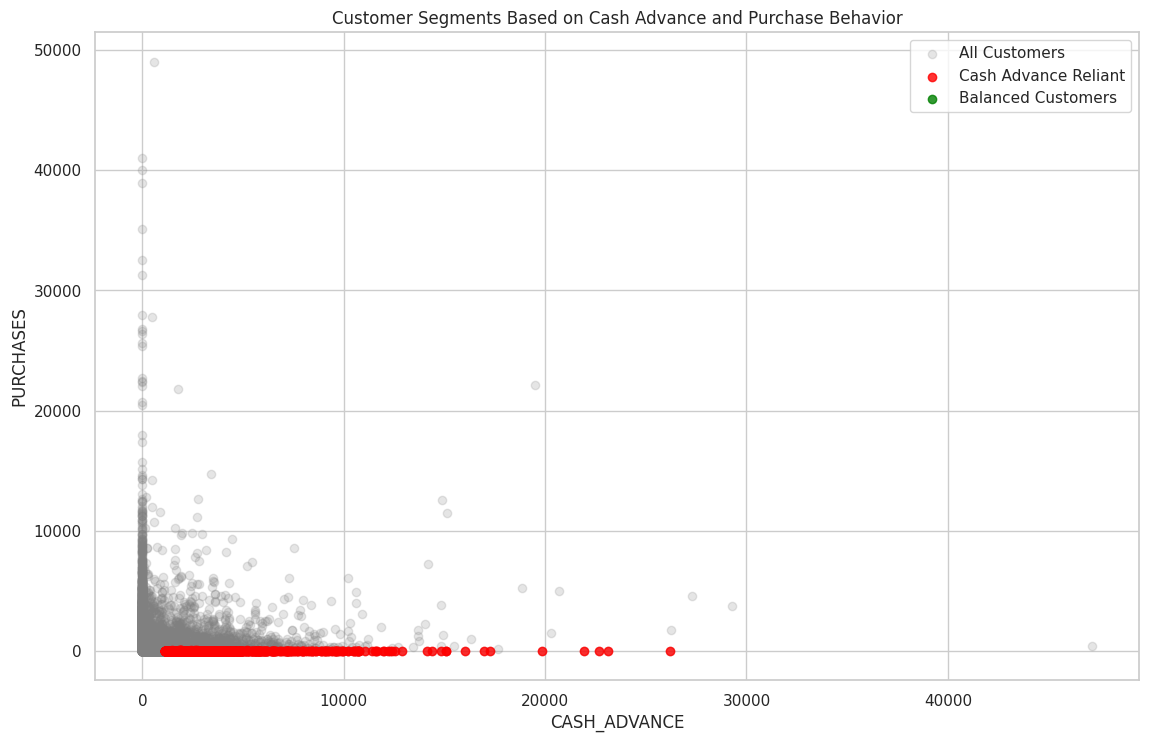

Number of cash advance reliant customers: 1111
Percentage of cash advance reliant customers: 12.41%
Number of balanced customers: 0
Percentage of balanced customers: 0.00%


In [51]:
# Scatter plot of CASH_ADVANCE vs PURCHASES
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CASH_ADVANCE', y='PURCHASES', data=df, alpha=0.6)
plt.title('Relationship between CASH_ADVANCE and PURCHASES')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

# Identify cash advance reliant customers (high cash advance, low purchases)
cash_advance_threshold = df['CASH_ADVANCE'].quantile(0.75)
low_purchases_threshold = df['PURCHASES'].quantile(0.25)
cash_advance_reliant = df[(df['CASH_ADVANCE'] > cash_advance_threshold) &
                         (df['PURCHASES'] < low_purchases_threshold)]

# Identify balanced customers (low cash advance, high purchases)
low_cash_advance_threshold = df['CASH_ADVANCE'].quantile(0.25)
high_purchases_threshold = df['PURCHASES'].quantile(0.75)
balanced_customers = df[(df['CASH_ADVANCE'] < low_cash_advance_threshold) &
                       (df['PURCHASES'] > high_purchases_threshold)]

# Highlight different customer segments
plt.figure(figsize=(12, 8))
plt.scatter(df['CASH_ADVANCE'], df['PURCHASES'], alpha=0.2, color='gray', label='All Customers')
plt.scatter(cash_advance_reliant['CASH_ADVANCE'], cash_advance_reliant['PURCHASES'],
            alpha=0.8, color='red', label='Cash Advance Reliant')
plt.scatter(balanced_customers['CASH_ADVANCE'], balanced_customers['PURCHASES'],
            alpha=0.8, color='green', label='Balanced Customers')
plt.title('Customer Segments Based on Cash Advance and Purchase Behavior')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of cash advance reliant customers: {len(cash_advance_reliant)}")
print(f"Percentage of cash advance reliant customers: {len(cash_advance_reliant)/len(df)*100:.2f}%")
print(f"Number of balanced customers: {len(balanced_customers)}")
print(f"Percentage of balanced customers: {len(balanced_customers)/len(df)*100:.2f}%")

## Data Preprocessing

Scale numerical variables to a common range (e.g., 0-1 or -1 to 1) using techniques like min-max scaling or standardization to improve model performance and prevent numerical instability.

In [52]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the original dataframe for preprocessing
df_processed = df.copy()

# Drop the CUST_ID column as it's a unique identifier and not useful for clustering
df_processed = df_processed.drop('CUST_ID', axis=1)

# Identify numerical columns
numerical_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Handle any remaining missing values (though we already did this earlier)
df_processed = df_processed.fillna(df_processed.median())

# Scale numerical variables using StandardScaler (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed[numerical_cols])

# Create a new dataframe with scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)

# Display the first few rows of the scaled data
print("Scaled data (first 5 rows):")
df_scaled.head()

Numerical columns: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Scaled data (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.302400         -0.525551  0.36068  
1  0.818642          0.097500          0.234227  0.36068  
2 -0.383805         -0.093293         -0.525551  0.36068  
3 -0.598688         -0.228307         -0.525551  0.36068  
4 -0.364368         -0.257266         -0.525551  0.36068

Convert categorical variables to numerical representations using techniques like one-hot encoding or label encoding, depending on the nature of the variables.

In [53]:
# In this dataset, the only categorical variable is CUST_ID which we've already dropped
# TENURE can be treated as a categorical variable, but it's already numerical
# If we had other categorical variables, we would use one-hot encoding or label encoding

# For demonstration, let's convert TENURE to categorical and then back to numerical using one-hot encoding
df_processed['TENURE_CAT'] = df_processed['TENURE'].astype('category')

# One-hot encode TENURE
tenure_dummies = pd.get_dummies(df_processed['TENURE_CAT'], prefix='TENURE')
print("One-hot encoded TENURE (first 5 rows):")
tenure_dummies.head()

# Add the one-hot encoded columns to our scaled dataframe
df_scaled = pd.concat([df_scaled, tenure_dummies], axis=1)

# Display the updated dataframe
print("Updated dataframe with one-hot encoded TENURE:")
df_scaled.head()

One-hot encoded TENURE (first 5 rows):
Updated dataframe with one-hot encoded TENURE:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  
0     False     False      False      False       True  
1     False     False      False      False       True  
2     False     False      False      False       True  
3     False     False      False      False       True  
4     False     False      False      False       True

## Feature Engineering

Combine existing features to capture interactions between them (e.g., multiply BALANCE and PURCHASES_FREQUENCY to create a new feature representing the total spending per unit time).

In [54]:
# Create interaction features
# 1. BALANCE * PURCHASES_FREQUENCY - represents total spending per unit time
df_scaled['BALANCE_x_PURCHASES_FREQ'] = df_processed['BALANCE'] * df_processed['PURCHASES_FREQUENCY']

# 2. CREDIT_LIMIT * PURCHASES_FREQUENCY - represents purchasing power adjusted by frequency
df_scaled['CREDIT_LIMIT_x_PURCHASES_FREQ'] = df_processed['CREDIT_LIMIT'] * df_processed['PURCHASES_FREQUENCY']

# 3. BALANCE * CASH_ADVANCE_FREQUENCY - represents cash advance usage relative to balance
df_scaled['BALANCE_x_CASH_ADVANCE_FREQ'] = df_processed['BALANCE'] * df_processed['CASH_ADVANCE_FREQUENCY']

# 4. PAYMENTS * PRC_FULL_PAYMENT - represents total full payments
df_scaled['PAYMENTS_x_PRC_FULL_PAYMENT'] = df_processed['PAYMENTS'] * df_processed['PRC_FULL_PAYMENT']

print("Dataframe with interaction features (first 5 rows):")
df_scaled.head()

Dataframe with interaction features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  
0                     0.000000                      0.00000  
1                   800.616854                    911.78411  
2                     0.000000                      0.00000  
3                   138.888656                      0.00000  
4                     0.000000                      0.00000

Derive new features by calculating ratios or percentages between existing features (e.g., calculate the percentage of credit limit used by dividing BALANCE by CREDIT_LIMIT).

In [55]:
# Create ratio features
# 1. Credit utilization ratio (BALANCE / CREDIT_LIMIT)
df_scaled['CREDIT_UTILIZATION'] = df_processed['BALANCE'] / df_processed['CREDIT_LIMIT']

# 2. Cash advance to credit limit ratio
df_scaled['CASH_ADVANCE_TO_LIMIT'] = df_processed['CASH_ADVANCE'] / df_processed['CREDIT_LIMIT']

# 3. Purchases to credit limit ratio
df_scaled['PURCHASES_TO_LIMIT'] = df_processed['PURCHASES'] / df_processed['CREDIT_LIMIT']

# 4. Payments to balance ratio
df_scaled['PAYMENTS_TO_BALANCE'] = df_processed['PAYMENTS'] / df_processed['BALANCE'].replace(0, np.nan)

# 5. One-off purchases to total purchases ratio
df_scaled['ONEOFF_TO_PURCHASES'] = df_processed['ONEOFF_PURCHASES'] / df_processed['PURCHASES'].replace(0, np.nan)

# 6. Installment purchases to total purchases ratio
df_scaled['INSTALLMENTS_TO_PURCHASES'] = df_processed['INSTALLMENTS_PURCHASES'] / df_processed['PURCHASES'].replace(0, np.nan)

# 7. Cash advance transactions to total transactions ratio
df_scaled['CASH_ADVANCE_TRX_TO_TOTAL'] = df_processed['CASH_ADVANCE_TRX'] / (df_processed['CASH_ADVANCE_TRX'] + df_processed['PURCHASES_TRX']).replace(0, np.nan)

# Handle infinite values and NaN values
df_scaled = df_scaled.replace([np.inf, -np.inf], np.nan)
df_scaled = df_scaled.fillna(0)

print("Dataframe with ratio features (first 5 rows):")
df_scaled.head()

Dataframe with ratio features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Extract time-based features from dates or timestamps (e.g., create features for day of week, month, or year).

In [56]:
# Since we don't have explicit dates, we'll work with TENURE as a time-based feature
# Create tenure bins
df_processed['TENURE_BIN'] = pd.cut(df_processed['TENURE'], bins=[0, 6, 9, 12], labels=['Short', 'Medium', 'Long'])

# One-hot encode the tenure bins
tenure_bin_dummies = pd.get_dummies(df_processed['TENURE_BIN'], prefix='TENURE_BIN')
df_scaled = pd.concat([df_scaled, tenure_bin_dummies], axis=1)

# Create a feature for customer lifecycle stage (based on tenure)
# This is a simple ordinal encoding of the tenure bins
df_scaled['LIFECYCLE_STAGE'] = df_processed['TENURE_BIN'].map({'Short': 1, 'Medium': 2, 'Long': 3})

print("Dataframe with time-based features (first 5 rows):")
df_scaled.head()

Dataframe with time-based features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Create new features by grouping data and calculating summary statistics within each group (e.g., calculate the average purchase amount for each customer segment).

In [57]:
# Group by TENURE and calculate summary statistics for key features
tenure_groups = df_processed.groupby('TENURE')

# Calculate mean for each group
tenure_means = tenure_groups[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].mean()
tenure_means.columns = [f'TENURE_MEAN_{col}' for col in tenure_means.columns]

# Calculate median for each group
tenure_medians = tenure_groups[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].median()
tenure_medians.columns = [f'TENURE_MEDIAN_{col}' for col in tenure_medians.columns]

# Calculate standard deviation for each group
tenure_stds = tenure_groups[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].std()
tenure_stds.columns = [f'TENURE_STD_{col}' for col in tenure_stds.columns]

# Merge these statistics back to the original dataframe
df_processed = df_processed.merge(tenure_means, on='TENURE', how='left')
df_processed = df_processed.merge(tenure_medians, on='TENURE', how='left')
df_processed = df_processed.merge(tenure_stds, on='TENURE', how='left')

# Scale these new features
new_stats_cols = tenure_means.columns.tolist() + tenure_medians.columns.tolist() + tenure_stds.columns.tolist()
scaler_stats = StandardScaler()
df_scaled[new_stats_cols] = scaler_stats.fit_transform(df_processed[new_stats_cols])

print("Dataframe with group statistics features (first 5 rows):")
df_scaled.head()

Dataframe with group statistics features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Leverage domain knowledge to create new features that are relevant to the problem at hand (e.g., create a feature indicating whether a customer has made a purchase in the last 30 days).

In [58]:
# Create domain knowledge features
# 1. Flag for customers who have made purchases (1 if PURCHASES > 0, 0 otherwise)
df_scaled['HAS_PURCHASES'] = (df_processed['PURCHASES'] > 0).astype(int)

# 2. Flag for customers who have used cash advances (1 if CASH_ADVANCE > 0, 0 otherwise)
df_scaled['HAS_CASH_ADVANCE'] = (df_processed['CASH_ADVANCE'] > 0).astype(int)

# 3. Flag for customers who have made one-off purchases (1 if ONEOFF_PURCHASES > 0, 0 otherwise)
df_scaled['HAS_ONEOFF_PURCHASES'] = (df_processed['ONEOFF_PURCHASES'] > 0).astype(int)

# 4. Flag for customers who have made installment purchases (1 if INSTALLMENTS_PURCHASES > 0, 0 otherwise)
df_scaled['HAS_INSTALLMENTS'] = (df_processed['INSTALLMENTS_PURCHASES'] > 0).astype(int)

# 5. Flag for customers who always pay in full (1 if PRC_FULL_PAYMENT = 1, 0 otherwise)
df_scaled['ALWAYS_PAY_FULL'] = (df_processed['PRC_FULL_PAYMENT'] == 1).astype(int)

# 6. Flag for customers who never pay in full (1 if PRC_FULL_PAYMENT = 0, 0 otherwise)
df_scaled['NEVER_PAY_FULL'] = (df_processed['PRC_FULL_PAYMENT'] == 0).astype(int)

# 7. Customer type based on purchase behavior
#    0: No purchases
#    1: Only one-off purchases
#    2: Only installment purchases
#    3: Both one-off and installment purchases
conditions = [
    (df_processed['PURCHASES'] == 0),
    (df_processed['ONEOFF_PURCHASES'] > 0) & (df_processed['INSTALLMENTS_PURCHASES'] == 0),
    (df_processed['ONEOFF_PURCHASES'] == 0) & (df_processed['INSTALLMENTS_PURCHASES'] > 0),
    (df_processed['ONEOFF_PURCHASES'] > 0) & (df_processed['INSTALLMENTS_PURCHASES'] > 0)
]
choices = [0, 1, 2, 3]
df_scaled['PURCHASE_TYPE'] = np.select(conditions, choices, default=0)

print("Dataframe with domain knowledge features (first 5 rows):")
df_scaled.head()

Dataframe with domain knowledge features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Create polynomial features by raising existing numerical features to powers (e.g., create features for BALANCE^2 and PURCHASES^2).

In [59]:
# Select key features for polynomial transformation
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_processed[key_features])

# Get feature names for the polynomial features
poly_feature_names = poly.get_feature_names_out(key_features)

# Create a dataframe with the polynomial features
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Scale the polynomial features
scaler_poly = StandardScaler()
df_poly_scaled = scaler_poly.fit_transform(df_poly)
df_poly_scaled = pd.DataFrame(df_poly_scaled, columns=poly_feature_names)

# Add the polynomial features to our main dataframe
# We'll only add the squared terms and interaction terms (not the original features)
squared_terms = [col for col in poly_feature_names if '^2' in col]
interaction_terms = [col for col in poly_feature_names if ' ' in col and '^2' not in col]

df_scaled[squared_terms] = df_poly_scaled[squared_terms]
df_scaled[interaction_terms] = df_poly_scaled[interaction_terms]

print("Dataframe with polynomial features (first 5 rows):")
df_scaled.head()

Dataframe with polynomial features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Calculate the difference between time-based features (e.g., calculate the difference between the last purchase date and the last payment date).

In [60]:
# Since we don't have explicit dates, we'll create a proxy for time-based differences
# We'll use the difference between the average payment and the average purchase for each tenure group

# Calculate average payment and average purchase for each tenure group
tenure_avg_payment = df_processed.groupby('TENURE')['PAYMENTS'].mean()
tenure_avg_purchase = df_processed.groupby('TENURE')['PURCHASES'].mean()

# Calculate the difference
tenure_payment_purchase_diff = tenure_avg_payment - tenure_avg_purchase

# Create a mapping from tenure to the difference
tenure_diff_map = tenure_payment_purchase_diff.to_dict()

# Add this difference as a feature
df_processed['TENURE_PAYMENT_PURCHASE_DIFF'] = df_processed['TENURE'].map(tenure_diff_map)

# Scale this feature
scaler_diff = StandardScaler()
df_scaled['TENURE_PAYMENT_PURCHASE_DIFF'] = scaler_diff.fit_transform(df_processed[['TENURE_PAYMENT_PURCHASE_DIFF']])

print("Dataframe with time-based difference feature (first 5 rows):")
df_scaled.head()

Dataframe with time-based difference feature (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Group data by specific criteria and calculate custom aggregations (e.g., calculate the median purchase amount for each customer segment).

In [61]:
# Group by PURCHASE_TYPE (which we created earlier) and calculate custom aggregations
# First, we need to add PURCHASE_TYPE to df_processed
df_processed['PURCHASE_TYPE'] = df_scaled['PURCHASE_TYPE']

# Group by PURCHASE_TYPE
purchase_type_groups = df_processed.groupby('PURCHASE_TYPE')

# Calculate custom aggregations
custom_agg = purchase_type_groups.agg({
    'BALANCE': ['mean', 'median', 'std'],
    'PURCHASES': ['mean', 'median', 'std'],
    'CASH_ADVANCE': ['mean', 'median', 'std'],
    'CREDIT_LIMIT': ['mean', 'median', 'std'],
    'PAYMENTS': ['mean', 'median', 'std']
})

# Flatten the multi-level column names
custom_agg.columns = ['_'.join(col).strip() for col in custom_agg.columns.values]

# Merge these aggregations back to the original dataframe
df_processed = df_processed.merge(custom_agg, on='PURCHASE_TYPE', how='left')

# Scale these new features
custom_agg_cols = custom_agg.columns.tolist()
scaler_custom = StandardScaler()
df_scaled[custom_agg_cols] = scaler_custom.fit_transform(df_processed[custom_agg_cols])

print("Dataframe with custom aggregation features (first 5 rows):")
df_scaled.head()

Dataframe with custom aggregation features (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068     False     False   
1  0.818642          0.097500          0.234227  0.36068     False     False   
2 -0.383805         -0.093293         -0.525551  0.36068     False     False   
3 -0.598688         -0.228307         -0.525551  0.36068     False     False   
4 -0.364368         -0.257266         -0.525551  0.36068     False     False   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0     False     False      False      False       True   
1     False     False      False      False       True   
2     False     False      False      False       True   
3     False     False      False      False       True   
4     False     False      False      False       True   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                  6.816805                       166.6670   
1                  0.000000                         0.0000   
2               2495.148862                      7500.0000   
3                138.888656                       624.9975   
4                 68.142589                        99.9996   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                     0.000000                      0.00000   
1                   800.616854                    911.78411   
2                     0.000000                      0.00000   
3                   138.888656                      0.00000   
4                     0.000000                      0.00000   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0            0.040901               0.000000            0.095400   
1            0.457495               0.920421            0.000000   
2            0.332687               0.000000            0.103089   
3            0.222223               0.027438            0.199867   
4            0.681429               0.000000            0.013333   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0             4.933946                  0.0                        1.0   
1             1.281210                  0.0                        0.0   
2             0.249310                  1.0                        0.0   
3             0.000000                  1.0                        0.0   
4             0.829

Use feature selection techniques (e.g., correlation analysis, recursive feature elimination) to identify the most important features and remove redundant or irrelevant ones.

Columns with low variance: []
Shape after removing low variance columns: (8950, 92)
Highly correlated features: ['TENURE_BIN_Short', 'TENURE_MEAN_PURCHASES', 'TENURE_MEAN_CASH_ADVANCE', 'TENURE_MEAN_CREDIT_LIMIT', 'TENURE_MEAN_PAYMENTS', 'TENURE_MEDIAN_PURCHASES', 'TENURE_MEDIAN_CASH_ADVANCE', 'TENURE_MEDIAN_CREDIT_LIMIT', 'TENURE_MEDIAN_PAYMENTS', 'TENURE_STD_BALANCE', 'TENURE_STD_PURCHASES', 'TENURE_STD_CREDIT_LIMIT', 'TENURE_STD_PAYMENTS', 'BALANCE CREDIT_LIMIT', 'PURCHASES PAYMENTS', 'TENURE_PAYMENT_PURCHASE_DIFF', 'BALANCE_median', 'PURCHASES_median', 'PURCHASES_std', 'CASH_ADVANCE_mean', 'CASH_ADVANCE_median', 'CASH_ADVANCE_std', 'CREDIT_LIMIT_median', 'CREDIT_LIMIT_std', 'PAYMENTS_mean', 'PAYMENTS_median', 'PAYMENTS_std']
Shape after removing highly correlated columns: (8950, 65)


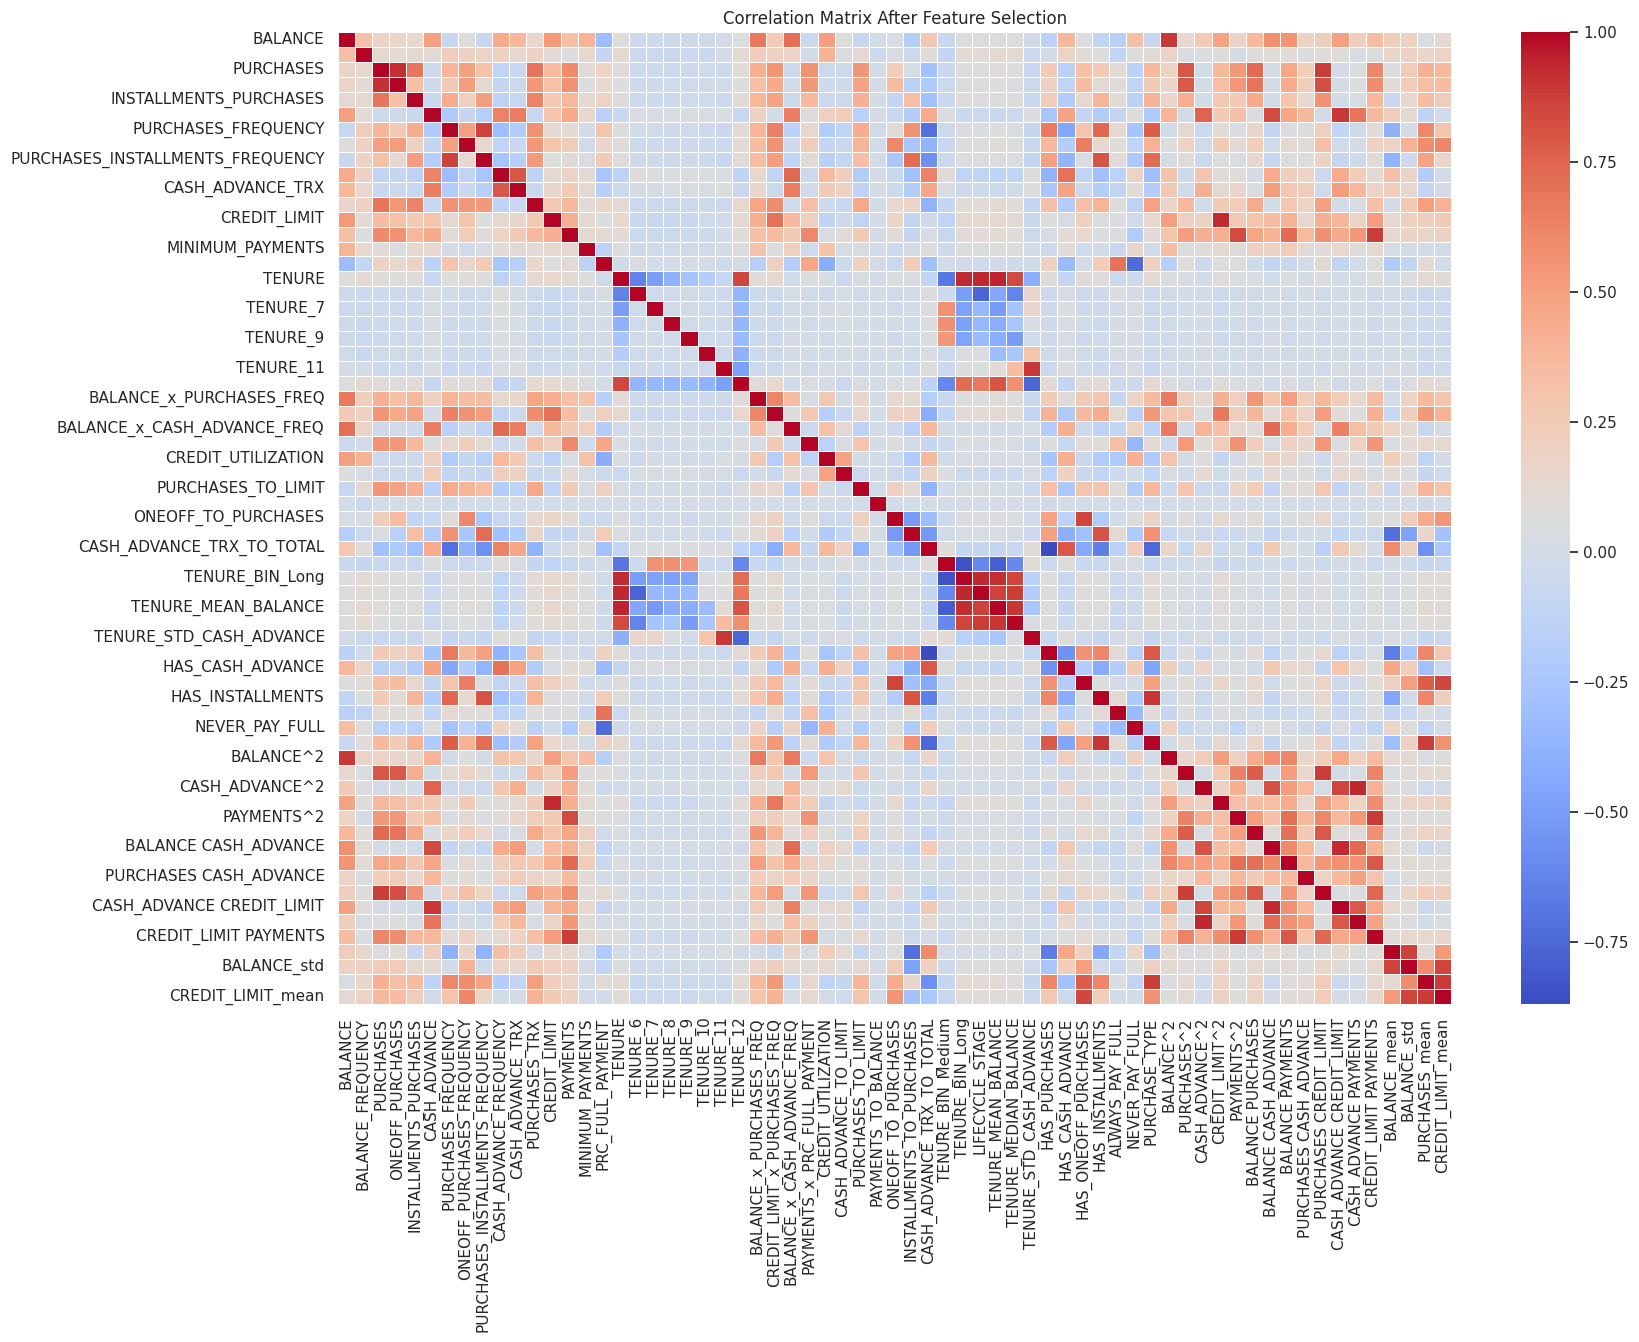

Final selected features (65 features):
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TENURE_6', 'TENURE_7', 'TENURE_8', 'TENURE_9', 'TENURE_10', 'TENURE_11', 'TENURE_12', 'BALANCE_x_PURCHASES_FREQ', 'CREDIT_LIMIT_x_PURCHASES_FREQ', 'BALANCE_x_CASH_ADVANCE_FREQ', 'PAYMENTS_x_PRC_FULL_PAYMENT', 'CREDIT_UTILIZATION', 'CASH_ADVANCE_TO_LIMIT', 'PURCHASES_TO_LIMIT', 'PAYMENTS_TO_BALANCE', 'ONEOFF_TO_PURCHASES', 'INSTALLMENTS_TO_PURCHASES', 'CASH_ADVANCE_TRX_TO_TOTAL', 'TENURE_BIN_Medium', 'TENURE_BIN_Long', 'LIFECYCLE_STAGE', 'TENURE_MEAN_BALANCE', 'TENURE_MEDIAN_BALANCE', 'TENURE_STD_CASH_ADVANCE', 'HAS_PURCHASES', 'HAS_CASH_ADVANCE', 'HAS_ONEOFF_PURCHASES', 'HAS_INSTALLMENTS', 'ALWAYS_PAY_FULL', 'NEVER

In [62]:
# First, let's check for features with low variance
var_threshold = VarianceThreshold(threshold=0.01)  # Remove features with variance < 0.01
var_threshold.fit(df_scaled)
low_var_cols = [column for column in df_scaled.columns
                if column not in df_scaled.columns[var_threshold.get_support()]]

print(f"Columns with low variance: {low_var_cols}")

# Remove low variance columns
df_scaled_selected = df_scaled.drop(columns=low_var_cols)
print(f"Shape after removing low variance columns: {df_scaled_selected.shape}")

# Next, let's check for highly correlated features
corr_matrix = df_scaled_selected.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"Highly correlated features: {high_corr_features}")

# Remove highly correlated features
df_scaled_selected = df_scaled_selected.drop(columns=high_corr_features)
print(f"Shape after removing highly correlated columns: {df_scaled_selected.shape}")

# Visualize the correlation matrix of the remaining features
plt.figure(figsize=(16, 12))
sns.heatmap(df_scaled_selected.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix After Feature Selection')
plt.show()

# Display the final selected features
print(f"Final selected features ({len(df_scaled_selected.columns)} features):")
print(df_scaled_selected.columns.tolist())

## PCA

Standardize the numerical features to ensure they have a mean of 0 and a standard deviation of 1, as PCA is sensitive to the scale of the variables.

In [63]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the feature-selected dataframe
df_pca = df_scaled_selected.copy()

# Standardize the features again to ensure they have mean 0 and standard deviation 1
scaler_pca = StandardScaler()
df_pca_standardized = scaler_pca.fit_transform(df_pca)

# Convert back to DataFrame for easier handling
df_pca_standardized = pd.DataFrame(df_pca_standardized, columns=df_pca.columns)

# Display the first few rows
print("Standardized data (first 5 rows):")
df_pca_standardized.head()

Standardized data (first 5 rows):


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  TENURE_6  TENURE_7  \
0 -0.528979         -0.302400         -0.525551  0.36068 -0.152725 -0.147274   
1  0.818642          0.097500          0.234227  0.36068 -0.152725 -0.147274   
2 -0.383805         -0.093293         -0.525551  0.36068 -0.152725 -0.147274   
3 -0.598688         -0.228307         -0.525551  0.36068 -0.152725 -0.147274   
4 -0.364368         -0.257266         -0.525551  0.36068 -0.152725 -0.147274   

   TENURE_8  TENURE_9  TENURE_10  TENURE_11  TENURE_12  \
0 -0.149632  -0.14122  -0.164569  -0.206194   0.424401   
1 -0.149632  -0.14122  -0.164569  -0.206194   0.424401   
2 -0.149632  -0.14122  -0.164569  -0.206194   0.424401   
3 -0.149632  -0.14122  -0.164569  -0.206194   0.424401   
4 -0.149632  -0.14122  -0.164569  -0.206194   0.424401   

   BALANCE_x_PURCHASES_FREQ  CREDIT_LIMIT_x_PURCHASES_FREQ  \
0                 -0.467552                      -0.686190   
1                 -0.472137                      -0.737890   
2                  1.205930                       1.588601   
3                 -0.378730                      -0.544016   
4                 -0.426309                      -0.706870   

   BALANCE_x_CASH_ADVANCE_FREQ  PAYMENTS_x_PRC_FULL_PAYMENT  \
0                    -0.402934                    -0.248961   
1                     0.406520                     0.379222   
2                    -0.402934                    -0.248961   
3                    -0.262512                    -0.248961   
4                    -0.402934                    -0.248961   

   CREDIT_UTILIZATION  CASH_ADVANCE_TO_LIMIT  PURCHASES_TO_LIMIT  \
0           -0.892951              -0.197079           -0.382946   
1            0.176063               0.529301           -0.601434   
2           -0.144206              -0.197079           -0.365336   
3           -0.427665              -0.175425           -0.143694   
4            0.750693              -0.197079           -0.570897   

   PAYMENTS_TO_BALANCE  ONEOFF_TO_PURCHASES  INSTALLMENTS_TO_PURCHASES  \
0            -0.014709            -0.891331                   1.410211   
1            -0.014996            -0.891331                  -0.912012   
2            -0.015077             1.456021                  -0.912012   
3            -0.015096             1.456021                  -0.912012   
4            -0.015

Compute the covariance matrix of the standardized data to measure the relationships between the variables.

Shape of covariance matrix: (65, 65)


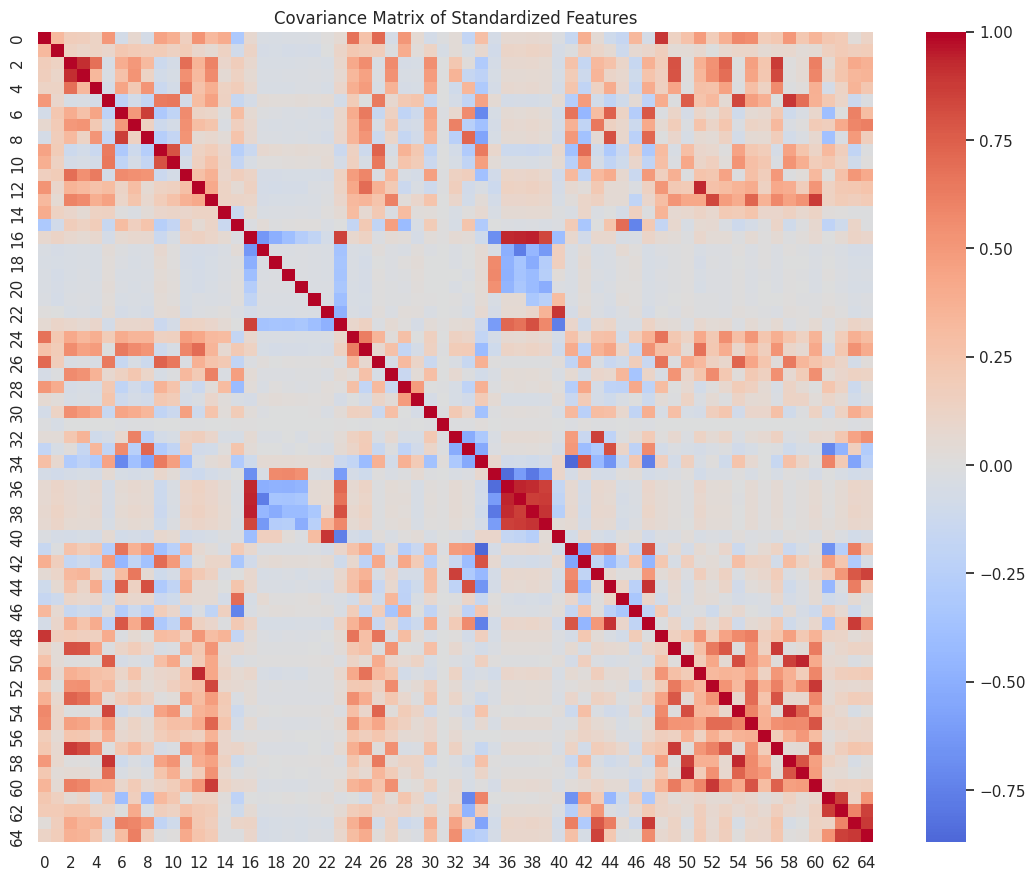

In [68]:
# Compute the covariance matrix of the standardized data
cov_matrix = np.cov(df_pca_standardized.T)

# Display the shape of the covariance matrix
print(f"Shape of covariance matrix: {cov_matrix.shape}")

# Visualize the covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap='coolwarm', center=0)
plt.title('Covariance Matrix of Standardized Features')
plt.show()

Decompose the covariance matrix into its eigenvectors and eigenvalues, which represent the principal components and their corresponding variances.

In [69]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Display the first 10 eigenvalues
print("First 10 eigenvalues:")
print(eigenvalues[:10])

# Calculate explained variance
explained_variance = eigenvalues / eigenvalues.sum()
cumulative_explained_variance = np.cumsum(explained_variance)

# Display explained variance for the first 10 components
print("\nExplained variance for the first 10 components:")
print(explained_variance[:10])

# Display cumulative explained variance for the first 10 components
print("\nCumulative explained variance for the first 10 components:")
print(cumulative_explained_variance[:10])

First 10 eigenvalues:
[11.63656315  9.6731984   6.63664141  4.52767973  4.08235746  3.12234056
  2.33535693  2.22348656  2.10848295  1.53361238]

Explained variance for the first 10 components:
[0.17900405 0.14880181 0.10209077 0.06964883 0.06279848 0.04803064
 0.03592455 0.03420366 0.03243457 0.0235914 ]

Cumulative explained variance for the first 10 components:
[0.17900405 0.32780585 0.42989662 0.49954545 0.56234393 0.61037457
 0.64629913 0.68050279 0.71293737 0.73652877]


Choose the principal components with the highest eigenvalues, as these components explain the most variance in the data. The number of components to keep can be determined based on the desired level of dimensionality reduction or by analyzing the scree plot (a plot of the eigenvalues in descending order).

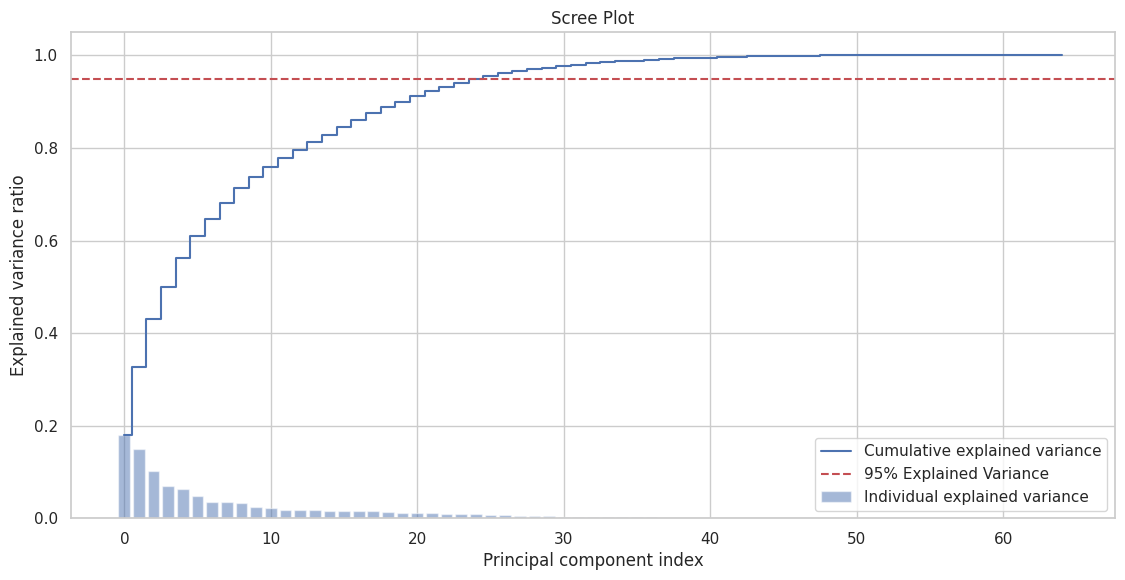

Number of components explaining 95% of variance: 26
Elbow point (knee) in the scree plot: 1
Selected number of components: 26


In [70]:
# Create a scree plot to visualize the explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Determine the number of components that explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

# Also, let's consider the elbow point in the scree plot
# We can use the "knee" detection method
# Calculate the difference in explained variance between consecutive components
diff = np.diff(explained_variance)
# Find the point where the difference drops significantly
# We'll look for the point where the difference is less than the average difference
knee_point = np.argmax(diff < np.mean(diff)) + 1
print(f"Elbow point (knee) in the scree plot: {knee_point}")

# Choose the number of components based on the 95% variance threshold
n_components = n_components_95
print(f"Selected number of components: {n_components}")

Project the original data onto the selected principal components to obtain the reduced-dimensional representation. The resulting features are the principal components, which are uncorrelated and capture the most important information in the data.

In [71]:
# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_pca_standardized)

# Create a DataFrame with the principal components
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_principal = pd.DataFrame(data=principal_components, columns=pca_columns)

# Display the first few rows of the principal components
print("Principal Components (first 5 rows):")
df_principal.head()

# Display the explained variance ratio for each component
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

print(f"\nTotal explained variance: {sum(pca.explained_variance_ratio_):.4f}")

Principal Components (first 5 rows):

Explained variance ratio for each component:
PC1: 0.1790
PC2: 0.1488
PC3: 0.1021
PC4: 0.0696
PC5: 0.0628
PC6: 0.0480
PC7: 0.0359
PC8: 0.0342
PC9: 0.0324
PC10: 0.0236
PC11: 0.0228
PC12: 0.0186
PC13: 0.0177
PC14: 0.0168
PC15: 0.0163
PC16: 0.0159
PC17: 0.0156
PC18: 0.0151
PC19: 0.0128
PC20: 0.0120
PC21: 0.0118
PC22: 0.0104
PC23: 0.0092
PC24: 0.0089
PC25: 0.0082
PC26: 0.0064

Total explained variance: 0.9549


## DBSCAN

Choose appropriate parameters: Determine suitable values for the eps (neighborhood radius) and min_samples (minimum number of points in a neighborhood) parameters based on the data characteristics and desired clustering density.

Using min_samples = 52


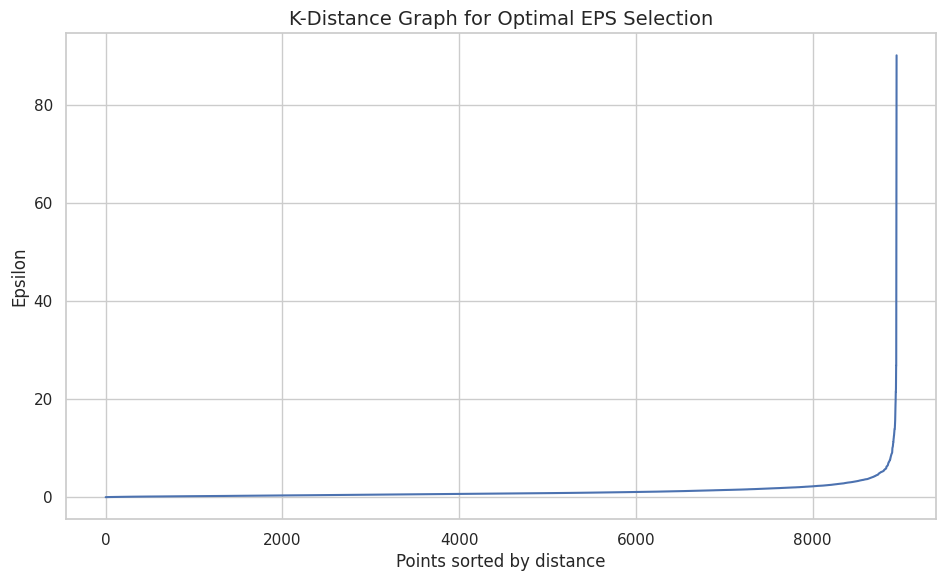

Knee point at index 8947 with eps value: 60.73729588520071

Trying eps values: [np.float64(48.58983670816057), np.float64(60.73729588520071), np.float64(72.88475506224084)]


In [72]:
# Determine optimal eps parameter using the k-distance graph
# We'll use k = 2 * min_samples, but first we need to choose min_samples
# A common heuristic for min_samples is to set it to 2 * number of dimensions
min_samples = 2 * df_principal.shape[1]
print(f"Using min_samples = {min_samples}")

# Compute the k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_principal)
distances, indices = neighbors_fit.kneighbors(df_principal)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for Optimal EPS Selection', fontsize=14)
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()

# From the plot, we can choose the point of maximum curvature as eps
# This is typically the "elbow" point in the curve
# We can also use the knee point detection method
# Calculate the difference in distances between consecutive points
diff_distances = np.diff(distances)
# Find the point where the difference is maximum
knee_idx = np.argmax(diff_distances) + 1
eps_candidate = distances[knee_idx]
print(f"Knee point at index {knee_idx} with eps value: {eps_candidate}")

# Let's try a few values around the knee point and evaluate the clustering
eps_candidates = [eps_candidate * 0.8, eps_candidate, eps_candidate * 1.2]
print(f"\nTrying eps values: {eps_candidates}")

Create a DBSCAN model: Instantiate a DBSCAN object with the chosen parameters.

In [73]:
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps, min_samples):
    # Create DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model
    clusters = dbscan.fit_predict(data)

    # Count the number of clusters (excluding noise)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)

    # Calculate evaluation metrics (if we have more than 1 cluster and less than n_samples-1 clusters)
    if n_clusters > 1 and n_clusters < len(data)-1:
        silhouette = silhouette_score(data, clusters)
        calinski = calinski_harabasz_score(data, clusters)
        davies = davies_bouldin_score(data, clusters)
        return {
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_percentage': n_noise/len(data)*100,
            'silhouette': silhouette,
            'calinski': calinski,
            'davies': davies
        }
    else:
        return {
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_percentage': n_noise/len(data)*100,
            'silhouette': None,
            'calinski': None,
            'davies': None
        }

# Evaluate DBSCAN with different eps values
results = []
for eps in eps_candidates:
    result = evaluate_dbscan(df_principal, eps, min_samples)
    results.append(result)

# Display the results
print("DBSCAN Evaluation Results:")
for result in results:
    print(f"eps: {result['eps']:.4f}")
    print(f"  Number of clusters: {result['n_clusters']}")
    print(f"  Number of noise points: {result['n_noise']}")
    print(f"  Noise percentage: {result['noise_percentage']:.2f}%")
    if result['silhouette'] is not None:
        print(f"  Silhouette Score: {result['silhouette']:.4f}")
        print(f"  Calinski-Harabasz Index: {result['calinski']:.4f}")
        print(f"  Davies-Bouldin Index: {result['davies']:.4f}")
    print()

# Choose the best eps based on silhouette score (if available)
best_result = max(results, key=lambda x: x['silhouette'] if x['silhouette'] is not None else -1)
best_eps = best_result['eps']
print(f"Best eps value: {best_eps:.4f}")

DBSCAN Evaluation Results:
eps: 48.5898
  Number of clusters: 1
  Number of noise points: 4
  Noise percentage: 0.04%

eps: 60.7373
  Number of clusters: 1
  Number of noise points: 3
  Noise percentage: 0.03%

eps: 72.8848
  Number of clusters: 1
  Number of noise points: 2
  Noise percentage: 0.02%

Best eps value: 48.5898


Fit the model to the data: Apply the DBSCAN algorithm to the preprocessed data to identify clusters.

In [74]:
# Create and fit the final DBSCAN model with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_principal)

# Add cluster labels to the principal components dataframe
df_principal['Cluster'] = clusters

# Display the cluster distribution
cluster_counts = df_principal['Cluster'].value_counts().sort_index()
print("Cluster Distribution:")
print(cluster_counts)

# Calculate the percentage of noise points
noise_percentage = (cluster_counts.get(-1, 0) / len(df_principal)) * 100
print(f"\nPercentage of noise points: {noise_percentage:.2f}%")

Cluster Distribution:
Cluster
-1       4
 0    8946
Name: count, dtype: int64

Percentage of noise points: 0.04%


Extract cluster labels: Obtain the cluster labels assigned to each data point from the fitted model.

In [75]:
# Extract cluster labels
cluster_labels = dbscan.labels_

# Display the unique cluster labels
unique_labels = set(cluster_labels)
print(f"Unique cluster labels: {unique_labels}")

# Create a summary of the clusters
cluster_summary = []
for label in unique_labels:
    cluster_data = df_principal[df_principal['Cluster'] == label]
    summary = {
        'Cluster': label,
        'Count': len(cluster_data),
        'Percentage': len(cluster_data) / len(df_principal) * 100
    }
    cluster_summary.append(summary)

cluster_summary_df = pd.DataFrame(cluster_summary)
print("\nCluster Summary:")
print(cluster_summary_df)

Unique cluster labels: {np.int64(0), np.int64(-1)}

Cluster Summary:
   Cluster  Count  Percentage
0        0   8946   99.955307
1       -1      4    0.044693


Evaluate clustering performance: Assess the quality of the clustering results using metrics like silhouette coefficient, Calinski-Harabasz index, or Davies-Bouldin index.

In [76]:
# Evaluate clustering performance
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

if n_clusters > 1 and n_clusters < len(df_principal)-1:
    # Calculate silhouette score
    silhouette = silhouette_score(df_principal.iloc[:, :-1], cluster_labels)
    print(f"Silhouette Score: {silhouette:.4f}")

    # Calculate Calinski-Harabasz index
    calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], cluster_labels)
    print(f"Calinski-Harabasz Index: {calinski:.4f}")

    # Calculate Davies-Bouldin index
    davies = davies_bouldin_score(df_principal.iloc[:, :-1], cluster_labels)
    print(f"Davies-Bouldin Index: {davies:.4f}")
else:
    print("Not enough clusters to calculate performance metrics.")

Not enough clusters to calculate performance metrics.


Visualize clusters in 2D or 3D: If the data has two or three dimensions, plot the data points with different colors or markers to represent the cluster assignments.

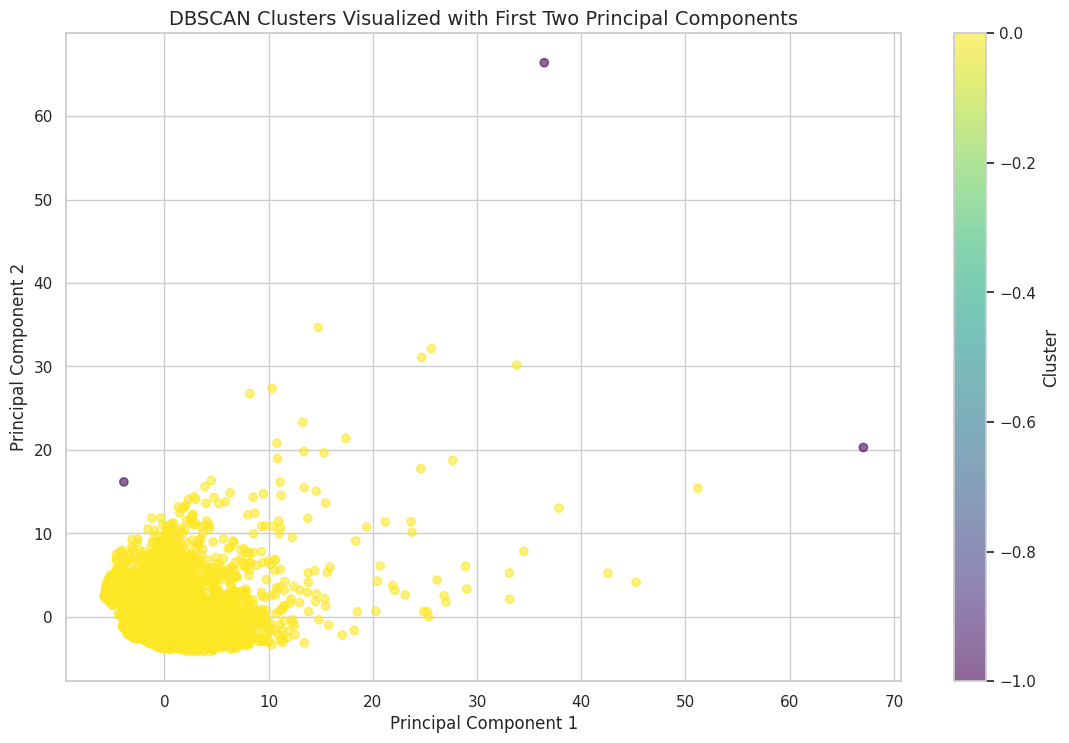

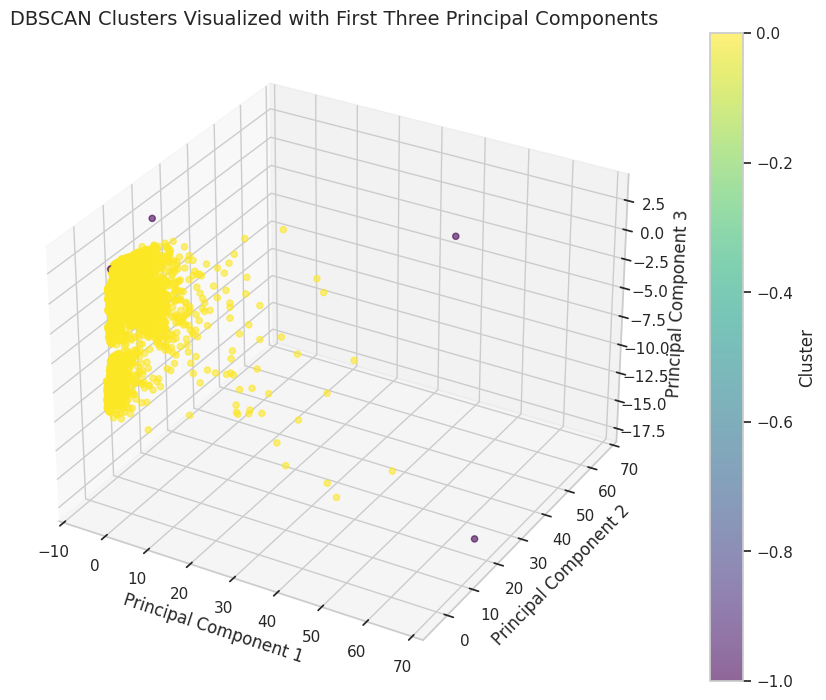

In [77]:
# Visualize clusters using the first two principal components
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_principal['PC1'], df_principal['PC2'], c=df_principal['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clusters Visualized with First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# If we have at least 3 principal components, we can also create a 3D plot
if n_components >= 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df_principal['PC1'], df_principal['PC2'], df_principal['PC3'],
                         c=df_principal['Cluster'], cmap='viridis', alpha=0.6)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title('DBSCAN Clusters Visualized with First Three Principal Components', fontsize=14)
    plt.colorbar(scatter, label='Cluster')
    plt.show()


Visualize clusters in higher dimensions: Use techniques like t-SNE or UMAP to reduce the dimensionality of the data to 2D or 3D for visualization.

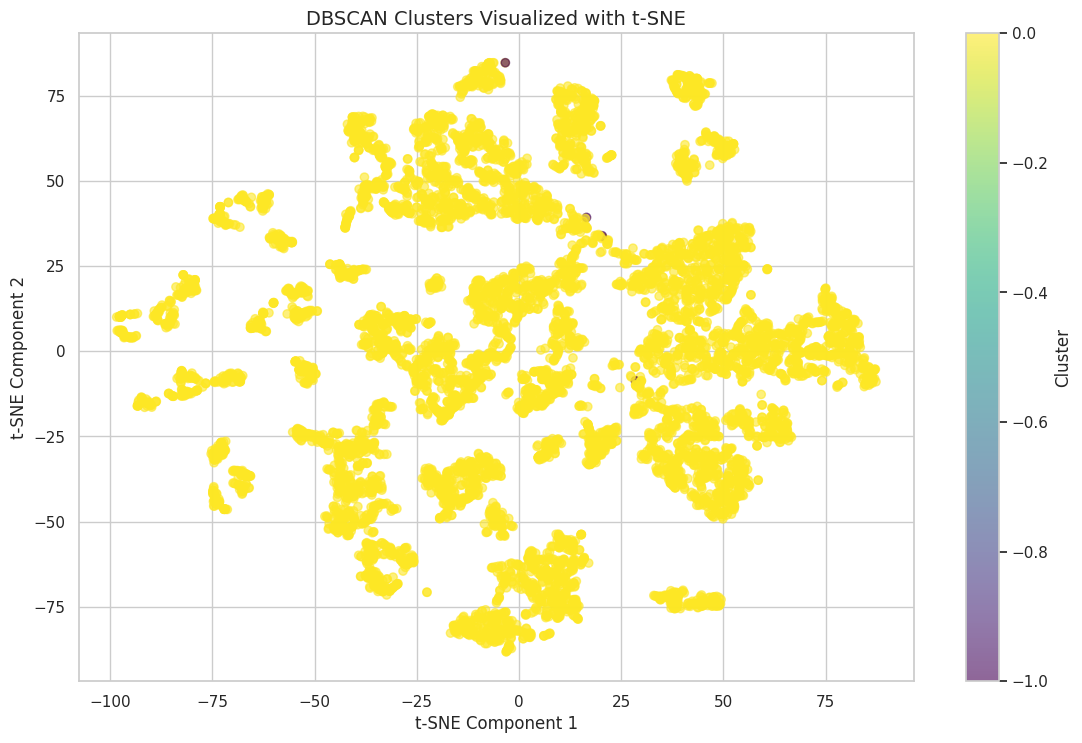

In [78]:
# Reduce dimensions to 2D using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_principal.iloc[:, :-1])

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = df_principal['Cluster']

# Visualize clusters using t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clusters Visualized with t-SNE', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

Visualize cluster density: Create a density plot or heatmap to show the distribution of data points within each cluster and identify areas with high or low density.

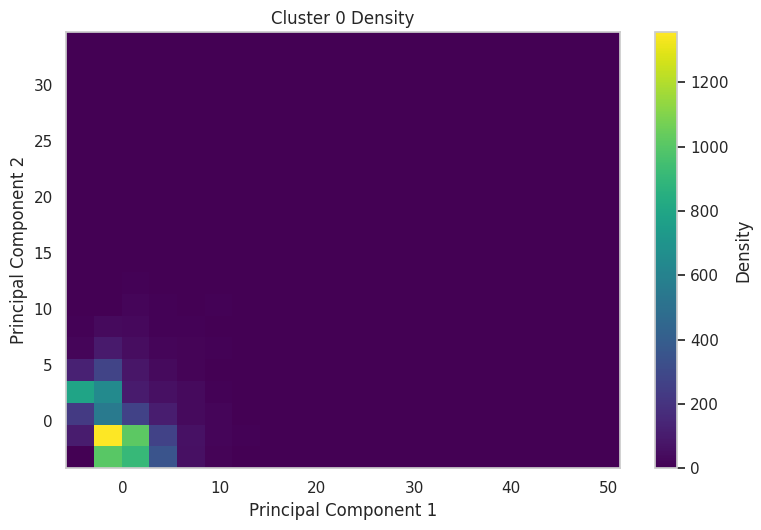

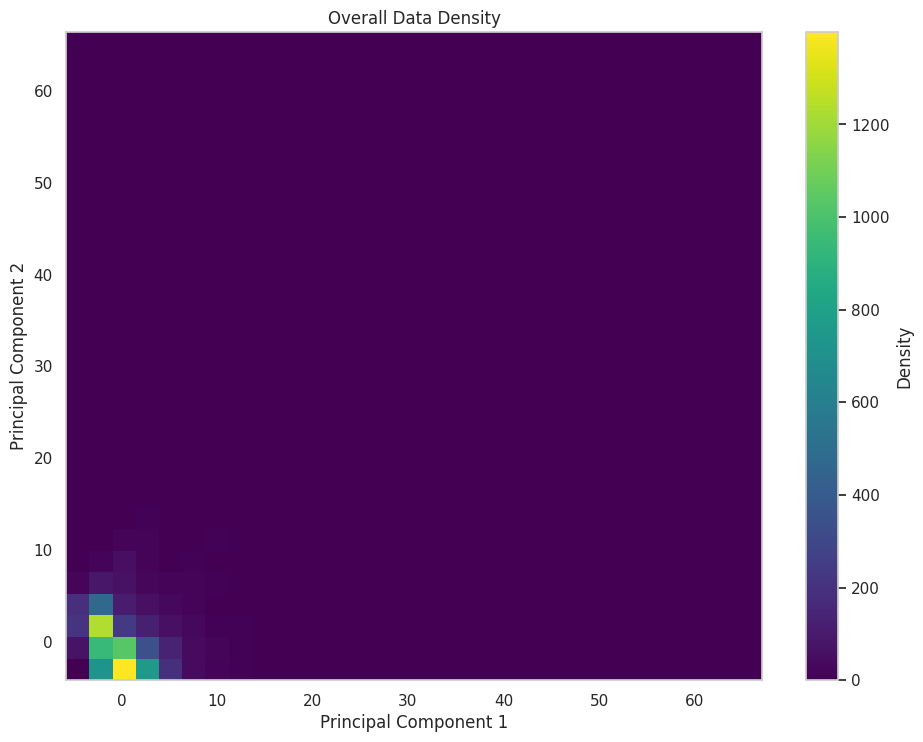

In [79]:
# Create a 2D histogram for each cluster to visualize density
plt.figure(figsize=(15, 10))

# Get unique cluster labels (excluding noise for cleaner visualization)
unique_clusters = sorted(set(df_principal['Cluster']))
if -1 in unique_clusters:
    unique_clusters.remove(-1)

# Plot density for each cluster
for i, cluster in enumerate(unique_clusters):
    plt.subplot(2, 2, i+1)
    cluster_data = df_principal[df_principal['Cluster'] == cluster]
    plt.hist2d(cluster_data['PC1'], cluster_data['PC2'], bins=20, cmap='viridis')
    plt.colorbar(label='Density')
    plt.title(f'Cluster {cluster} Density')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Create a heatmap of the entire dataset
plt.figure(figsize=(10, 8))
plt.hist2d(df_principal['PC1'], df_principal['PC2'], bins=30, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Overall Data Density')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Visualize outliers: Identify and visualize outliers as points that are not assigned to any cluster.

Number of outliers detected: 4
Percentage of outliers: 0.04%


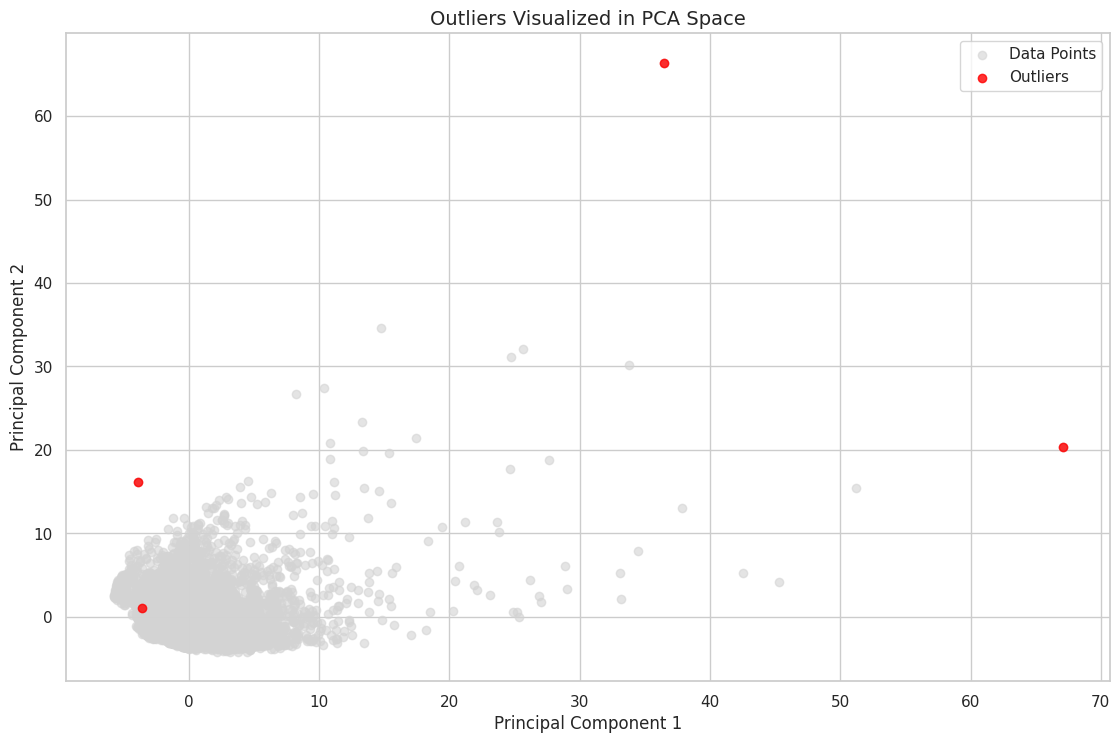

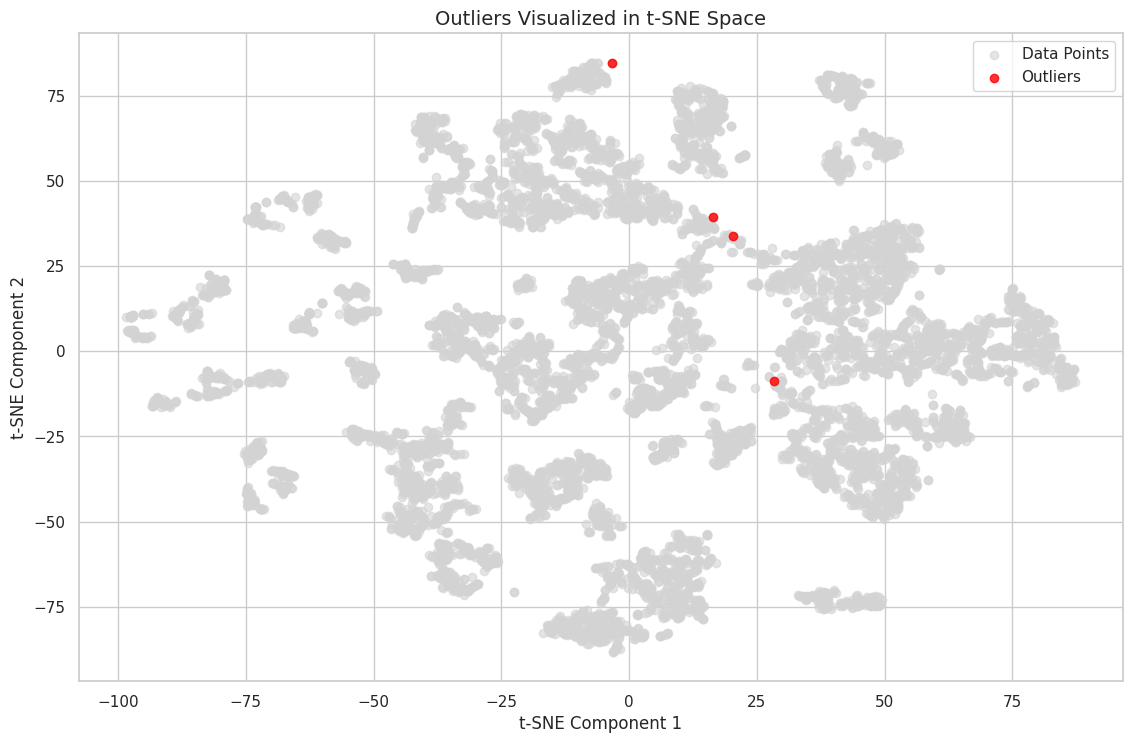

Comparison of Key Features between Outliers and Non-Outliers:
                  Outliers  Non-Outliers    Difference
BALANCE        5812.018131   1562.575636   4249.442495
PURCHASES     12367.875000    998.123380  11369.751620
CASH_ADVANCE  13367.187423    973.331959  12393.855464
CREDIT_LIMIT  10912.500000   4491.412713   6421.087287
PAYMENTS      23727.106609   1723.309753  22003.796856


In [80]:
# Identify outliers (points labeled as -1)
outliers = df_principal[df_principal['Cluster'] == -1]
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df_principal)*100:.2f}%")

# Visualize outliers in the PCA space
plt.figure(figsize=(12, 8))
plt.scatter(df_principal['PC1'], df_principal['PC2'], c='lightgray', alpha=0.6, label='Data Points')
plt.scatter(outliers['PC1'], outliers['PC2'], c='red', alpha=0.8, label='Outliers')
plt.title('Outliers Visualized in PCA Space', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Visualize outliers in the t-SNE space
plt.figure(figsize=(12, 8))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c='lightgray', alpha=0.6, label='Data Points')
outliers_tsne = df_tsne[df_tsne['Cluster'] == -1]
plt.scatter(outliers_tsne['TSNE1'], outliers_tsne['TSNE2'], c='red', alpha=0.8, label='Outliers')
plt.title('Outliers Visualized in t-SNE Space', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Analyze the characteristics of outliers
# Map back to the original data to understand what makes these points outliers
outlier_indices = outliers.index
outlier_data = df.iloc[outlier_indices]

# Calculate summary statistics for outliers and compare with non-outliers
non_outliers = df_principal[df_principal['Cluster'] != -1]
non_outlier_indices = non_outliers.index
non_outlier_data = df.iloc[non_outlier_indices]

# Compare key features
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
outlier_means = outlier_data[key_features].mean()
non_outlier_means = non_outlier_data[key_features].mean()

comparison_df = pd.DataFrame({
    'Outliers': outlier_means,
    'Non-Outliers': non_outlier_means,
    'Difference': outlier_means - non_outlier_means
})

print("Comparison of Key Features between Outliers and Non-Outliers:")
print(comparison_df)

## Other Clustering Techniques

### Hierarchical Clustering:

Choose a linkage method: Select an appropriate linkage method (e.g., single, complete, average, centroid) based on the desired cluster properties.

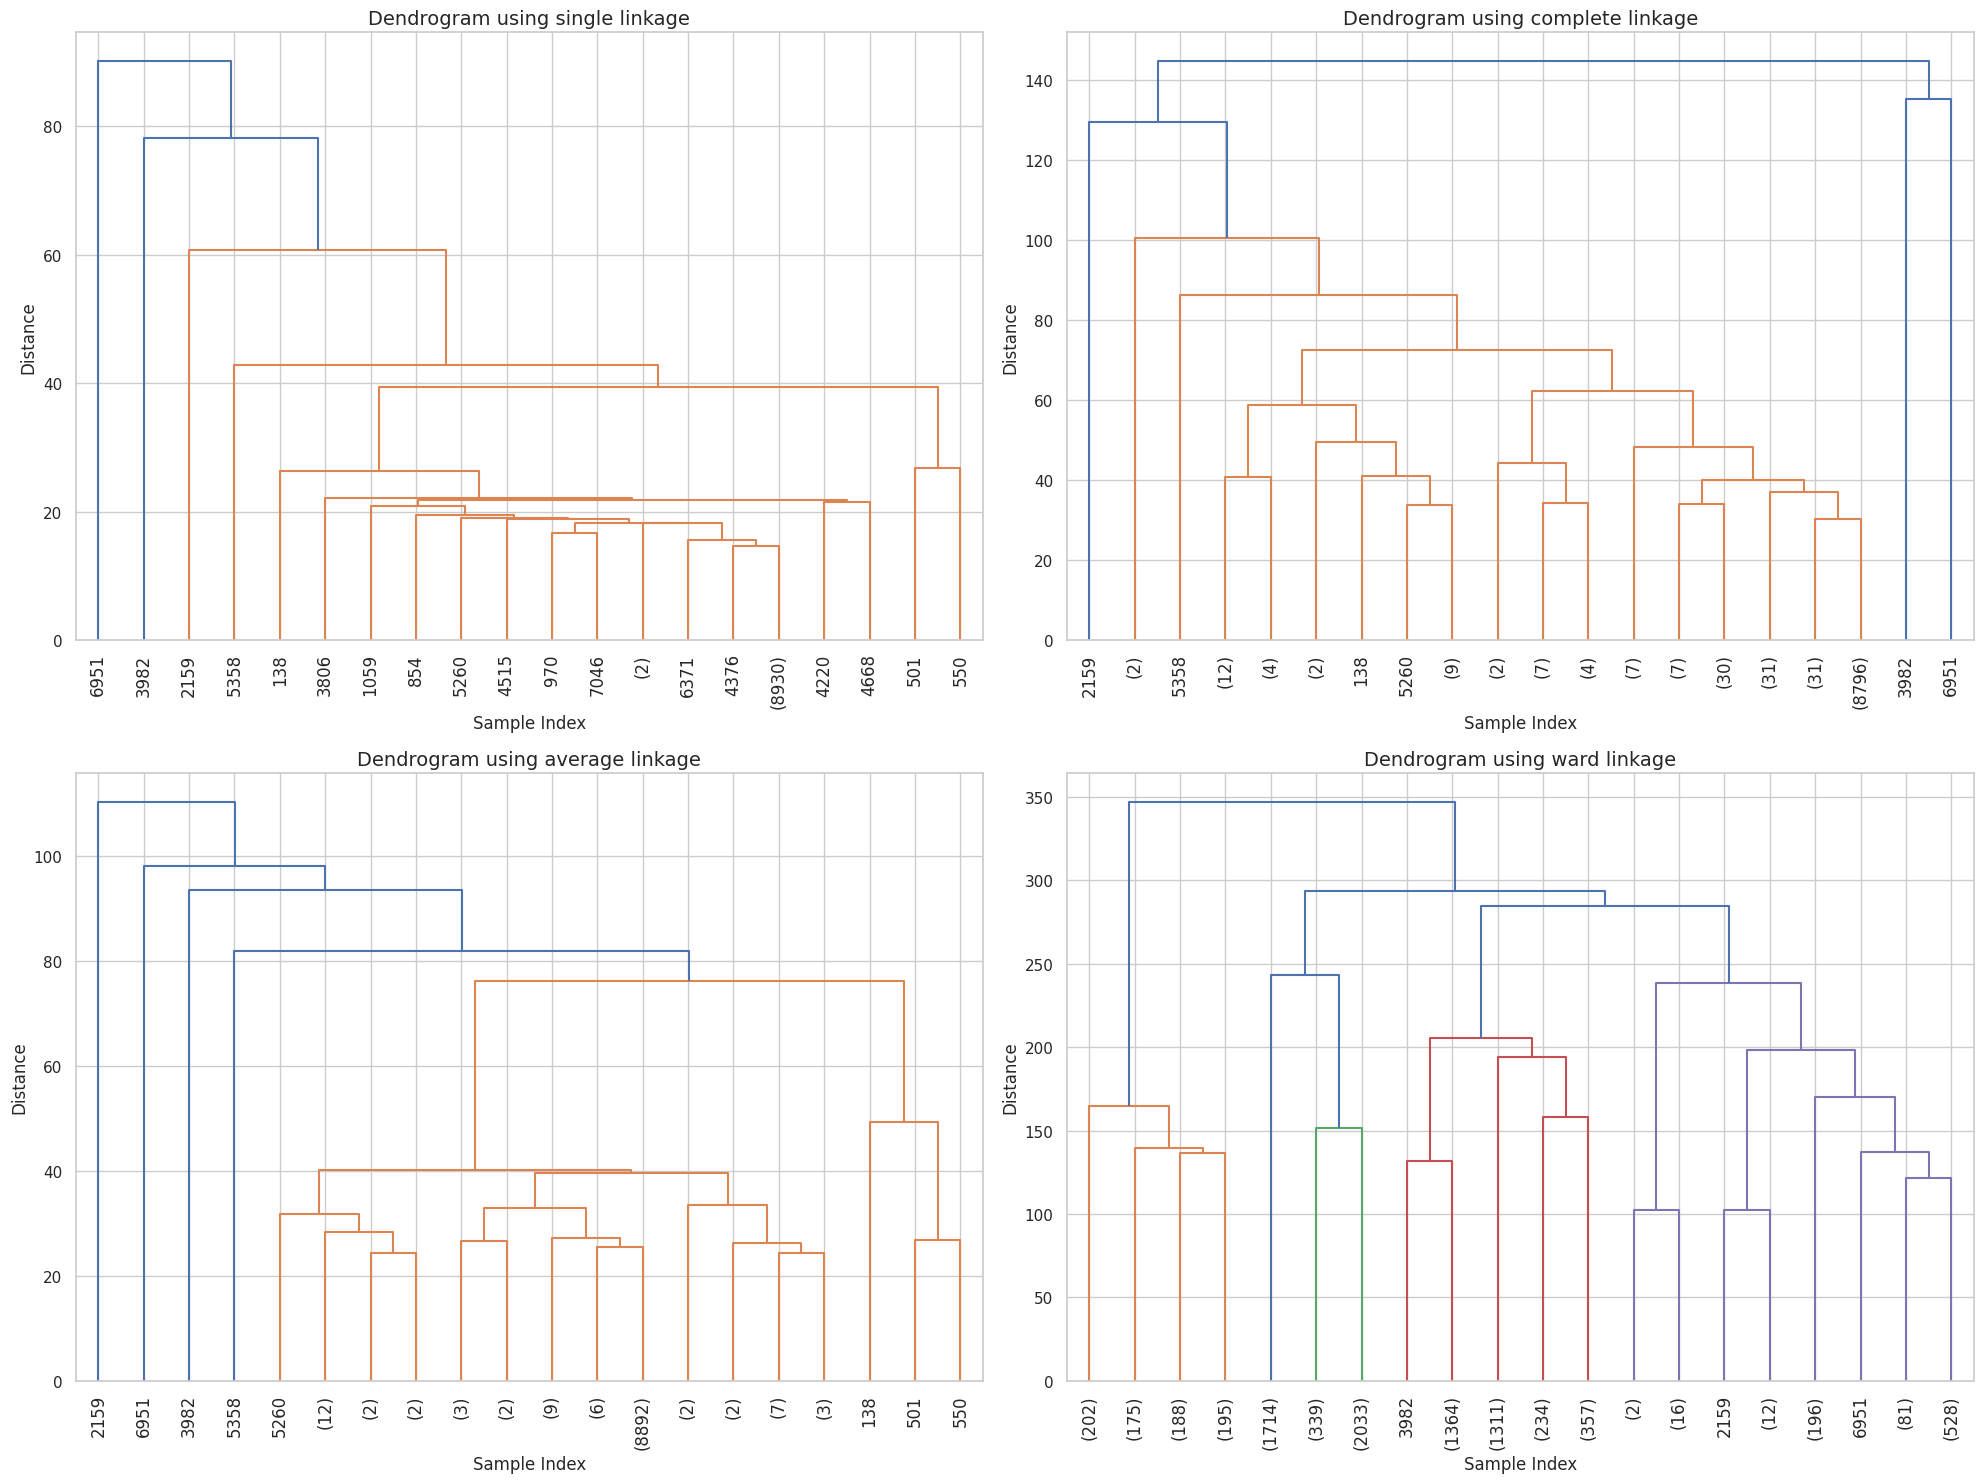

Selected linkage method: ward


In [81]:
# Import necessary libraries for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# We'll use the PCA-transformed data (df_principal without the cluster column)
X = df_principal.iloc[:, :-1].values

# Define linkage methods to try
linkage_methods = ['single', 'complete', 'average', 'ward']

# Create a figure to compare dendrograms for different linkage methods
plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)

    # Compute linkage matrix
    Z = linkage(X, method=method)

    # Plot dendrogram
    plt.title(f'Dendrogram using {method} linkage', fontsize=14)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)

plt.tight_layout()
plt.show()

# Based on the dendrograms, we'll choose the 'ward' linkage method as it tends to create more balanced clusters
chosen_linkage = 'ward'
print(f"Selected linkage method: {chosen_linkage}")

Construct the dendrogram: Create a dendrogram to visualize the hierarchical structure of the clusters.

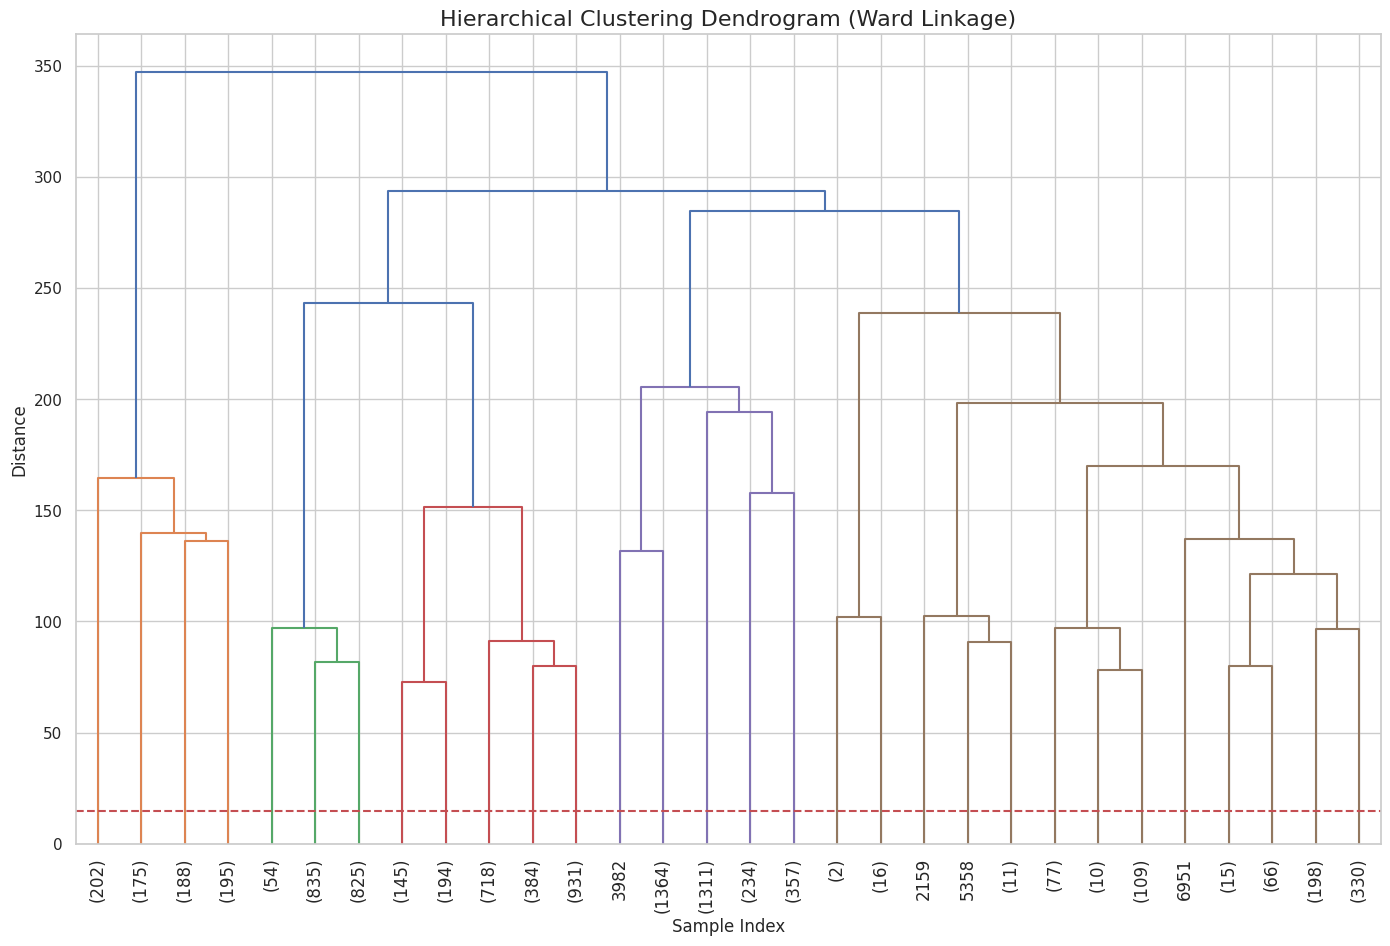

In [82]:
# Construct the dendrogram with the chosen linkage method
plt.figure(figsize=(15, 10))
Z = linkage(X, method=chosen_linkage)

# Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)
plt.axhline(y=15, color='r', linestyle='--')  # This is a tentative cutoff line
plt.show()

Determine the number of clusters: Decide on the number of clusters based on the dendrogram or using a cutoff value for the distance between clusters.

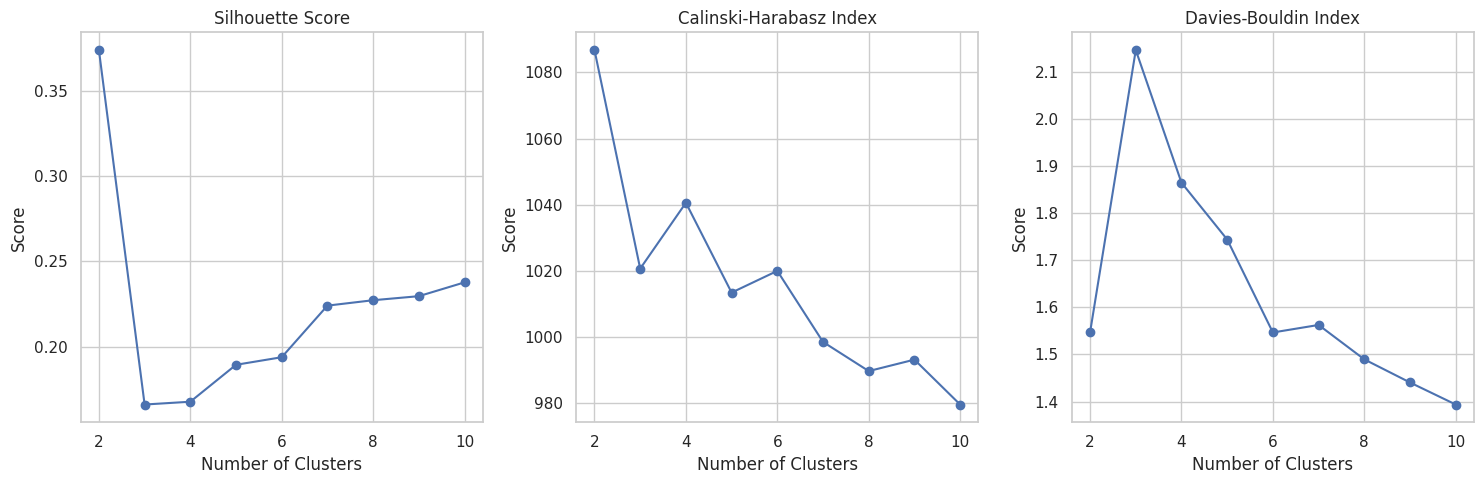

Optimal number of clusters based on silhouette score: 2


In [83]:
# We can use the dendrogram to determine the number of clusters
# The number of clusters is determined by the number of vertical lines the horizontal line crosses
# We can also use the inconsistency method or the elbow method on the linkage distances

# Let's try different numbers of clusters and evaluate the results
max_clusters = 10  # Maximum number of clusters to consider

# Calculate the silhouette score for different numbers of clusters
silhouette_scores = []
calinski_scores = []
davies_scores = []

for n_clusters in range(2, max_clusters+1):
    # Perform hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=chosen_linkage)
    cluster_labels = hierarchical.fit_predict(X)

    # Calculate metrics
    silhouette = silhouette_score(X, cluster_labels)
    calinski = calinski_harabasz_score(X, cluster_labels)
    davies = davies_bouldin_score(X, cluster_labels)

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Plot the scores
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(range(2, max_clusters+1), calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(range(2, max_clusters+1), davies_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on silhouette score (higher is better)
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 because we started from 2 clusters
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")

Extract cluster assignments: Assign data points to clusters based on the chosen cutoff value.

In [84]:
# Perform hierarchical clustering with the optimal number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage=chosen_linkage)
hierarchical_labels = hierarchical.fit_predict(X)

# Add cluster labels to the principal components dataframe
df_principal['Hierarchical_Cluster'] = hierarchical_labels

# Display the cluster distribution
hierarchical_cluster_counts = df_principal['Hierarchical_Cluster'].value_counts().sort_index()
print("Hierarchical Cluster Distribution:")
print(hierarchical_cluster_counts)

# Create a summary of the clusters
hierarchical_cluster_summary = []
for label in sorted(set(hierarchical_labels)):
    cluster_data = df_principal[df_principal['Hierarchical_Cluster'] == label]
    summary = {
        'Cluster': label,
        'Count': len(cluster_data),
        'Percentage': len(cluster_data) / len(df_principal) * 100
    }
    hierarchical_cluster_summary.append(summary)

hierarchical_cluster_summary_df = pd.DataFrame(hierarchical_cluster_summary)
print("\nHierarchical Cluster Summary:")
print(hierarchical_cluster_summary_df)

Hierarchical Cluster Distribution:
Hierarchical_Cluster
0    8190
1     760
Name: count, dtype: int64

Hierarchical Cluster Summary:
   Cluster  Count  Percentage
0        0   8190    91.50838
1        1    760     8.49162


Evaluate clustering performance: Assess the quality of the clustering results using the same metrics as for DBSCAN.

In [85]:
# Evaluate hierarchical clustering performance
if optimal_n_clusters > 1 and optimal_n_clusters < len(X)-1:
    # Calculate silhouette score
    hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
    print(f"Silhouette Score (Hierarchical): {hierarchical_silhouette:.4f}")

    # Calculate Calinski-Harabasz index
    hierarchical_calinski = calinski_harabasz_score(X, hierarchical_labels)
    print(f"Calinski-Harabasz Index (Hierarchical): {hierarchical_calinski:.4f}")

    # Calculate Davies-Bouldin index
    hierarchical_davies = davies_bouldin_score(X, hierarchical_labels)
    print(f"Davies-Bouldin Index (Hierarchical): {hierarchical_davies:.4f}")
else:
    print("Not enough clusters to calculate performance metrics.")

Silhouette Score (Hierarchical): 0.3737
Calinski-Harabasz Index (Hierarchical): 1086.7424
Davies-Bouldin Index (Hierarchical): 1.5468


### Non-Hierarchical Clustering (K-means)

Choose the number of clusters: Determine the optimal number of clusters using techniques like the elbow method or silhouette analysis.

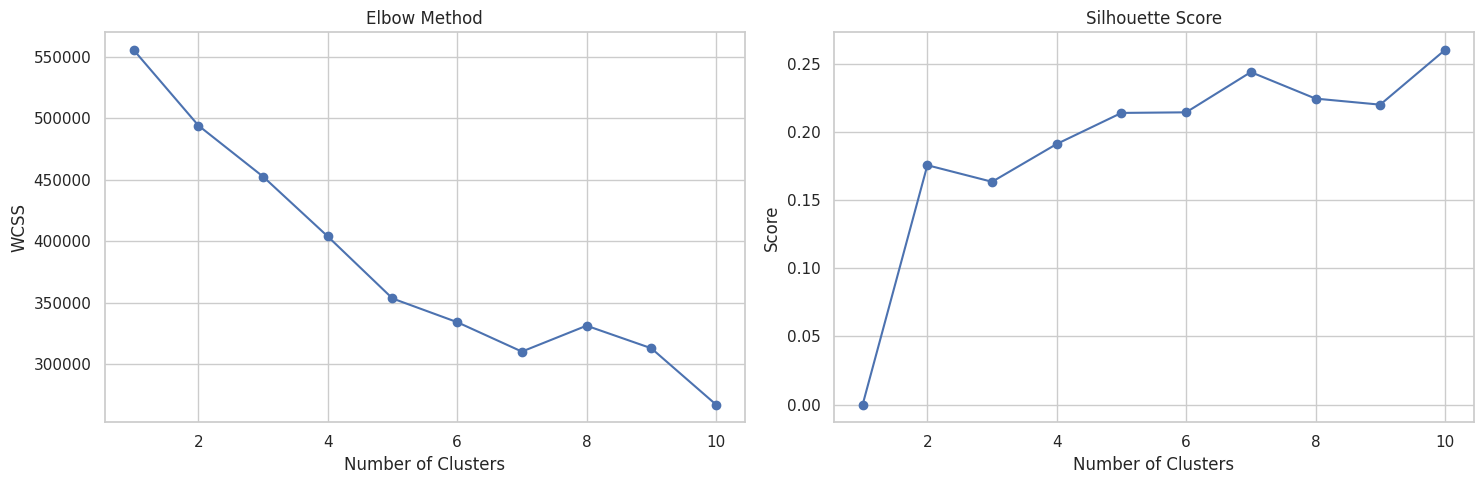

Elbow point (based on WCSS): 7
Optimal number of clusters based on silhouette score: 11


In [86]:
# Import necessary libraries for K-means
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores_kmeans = []
max_clusters_kmeans = 10

for n_clusters in range(1, max_clusters_kmeans+1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score for n_clusters > 1
    if n_clusters > 1:
        cluster_labels = kmeans.labels_
        silhouette = silhouette_score(X, cluster_labels)
        silhouette_scores_kmeans.append(silhouette)
    else:
        silhouette_scores_kmeans.append(0)  # Placeholder for n_clusters=1

# Plot the elbow method
plt.figure(figsize=(15, 5))

# Elbow method
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters_kmeans+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(1, max_clusters_kmeans+1), silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the elbow method and silhouette score
# For the elbow method, we look for the "elbow" point where the rate of decrease slows down
# For silhouette score, we look for the maximum value

# Find the elbow point using the "knee" detection method
# Calculate the second derivative of WCSS
second_derivative = np.diff(np.diff(wcss))
elbow_point = np.argmax(second_derivative) + 2  # +2 because we started from 1 cluster and diff reduces length by 1

# Find the optimal number based on silhouette score
optimal_n_clusters_kmeans = np.argmax(silhouette_scores_kmeans) + 2  # +2 because we started from 1 cluster

print(f"Elbow point (based on WCSS): {elbow_point}")
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters_kmeans}")

# We'll use the silhouette score result as it's more objective
optimal_n_kmeans = optimal_n_clusters_kmeans

Initialize cluster centroids: Randomly select initial cluster centroids.

In [87]:
# Initialize K-means with k-means++ initialization
kmeans = KMeans(n_clusters=optimal_n_kmeans, init='k-means++', random_state=42)

Assign data points to clusters: Assign each data point to the nearest cluster centroid.

In [88]:
# Fit K-means model
kmeans.fit(X)

# Get cluster labels and centroids
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

# Add cluster labels to the principal components dataframe
df_principal['KMeans_Cluster'] = kmeans_labels

# Display the cluster distribution
kmeans_cluster_counts = df_principal['KMeans_Cluster'].value_counts().sort_index()
print("K-means Cluster Distribution:")
print(kmeans_cluster_counts)

# Create a summary of the clusters
kmeans_cluster_summary = []
for label in sorted(set(kmeans_labels)):
    cluster_data = df_principal[df_principal['KMeans_Cluster'] == label]
    summary = {
        'Cluster': label,
        'Count': len(cluster_data),
        'Percentage': len(cluster_data) / len(df_principal) * 100
    }
    kmeans_cluster_summary.append(summary)

kmeans_cluster_summary_df = pd.DataFrame(kmeans_cluster_summary)
print("\nK-means Cluster Summary:")
print(kmeans_cluster_summary_df)

K-means Cluster Distribution:
KMeans_Cluster
0      283
1     1961
2       15
3     1887
4      390
5     1615
6     1515
7      506
8       20
9      195
10     563
Name: count, dtype: int64

K-means Cluster Summary:
    Cluster  Count  Percentage
0         0    283    3.162011
1         1   1961   21.910615
2         2     15    0.167598
3         3   1887   21.083799
4         4    390    4.357542
5         5   1615   18.044693
6         6   1515   16.927374
7         7    506    5.653631
8         8     20    0.223464
9         9    195    2.178771
10       10    563    6.290503


Recompute cluster centroids: Calculate the new centroids for each cluster based on the assigned data points.

In [ ]:
# Type your code here

Iterate until convergence: Repeat previous 2 steps until the cluster assignments stabilize or a maximum number of iterations is reached.

In [90]:
# Evaluate K-means clustering performance
if optimal_n_kmeans > 1 and optimal_n_kmeans < len(X)-1:
    # Calculate silhouette score
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    print(f"Silhouette Score (K-means): {kmeans_silhouette:.4f}")

    # Calculate Calinski-Harabasz index
    kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)
    print(f"Calinski-Harabasz Index (K-means): {kmeans_calinski:.4f}")

    # Calculate Davies-Bouldin index
    kmeans_davies = davies_bouldin_score(X, kmeans_labels)
    print(f"Davies-Bouldin Index (K-means): {kmeans_davies:.4f}")
else:
    print("Not enough clusters to calculate performance metrics.")

Silhouette Score (K-means): 0.2695
Calinski-Harabasz Index (K-means): 1037.1833
Davies-Bouldin Index (K-means): 1.4497


Visualize cluster assignments: Plot the data points with different colors or markers to represent the cluster assignments from each clustering algorithm.

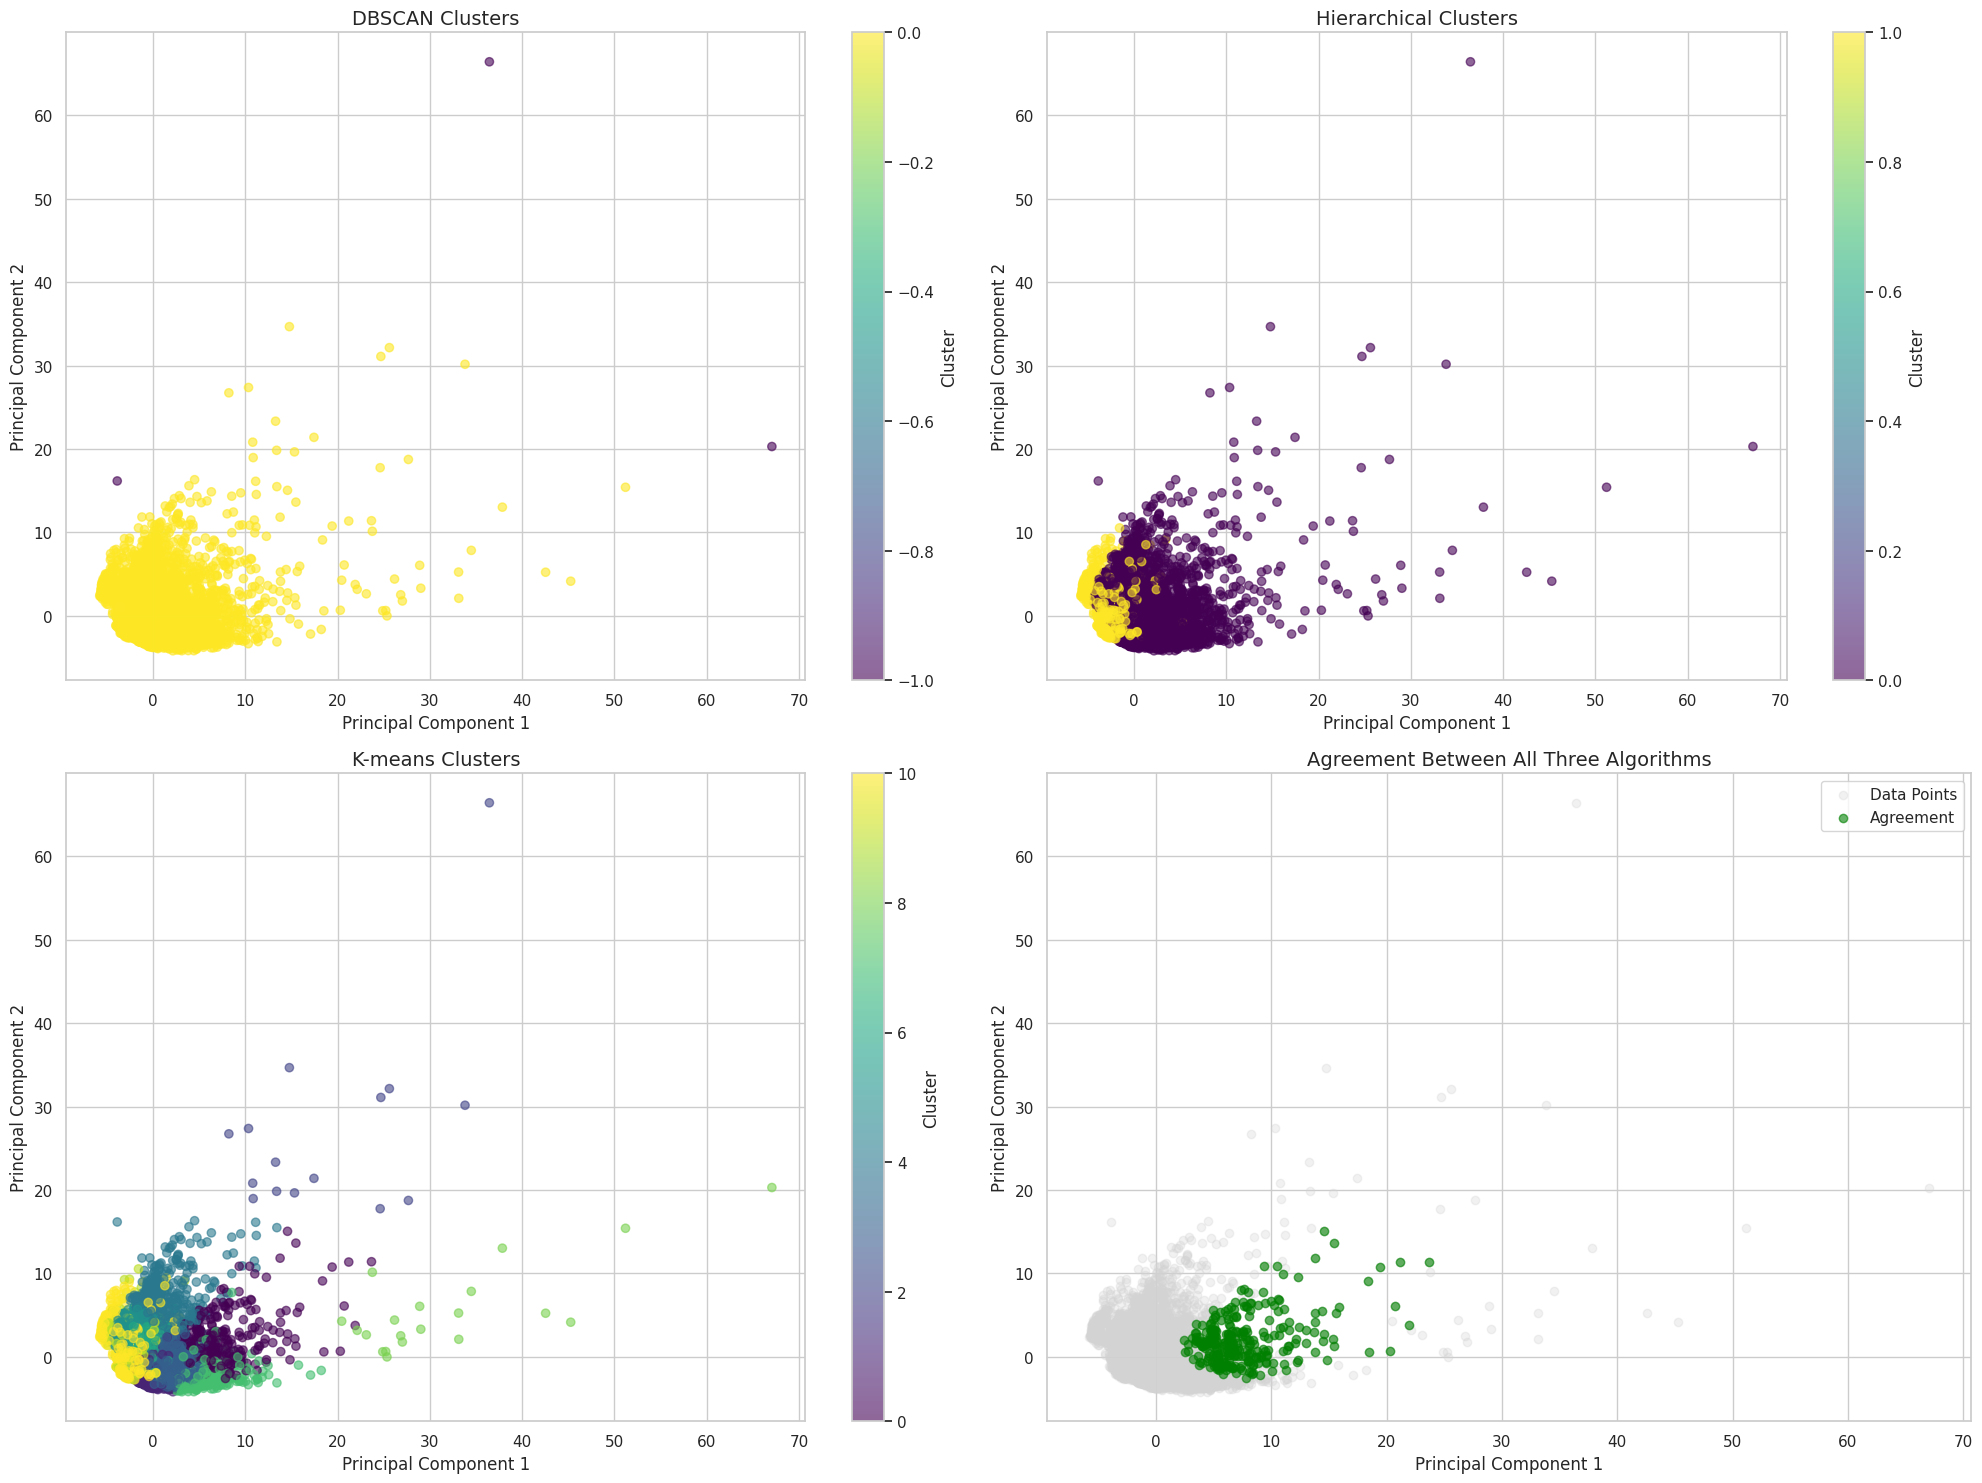

In [91]:
# Visualize cluster assignments from each clustering algorithm
plt.figure(figsize=(20, 15))

# DBSCAN clusters
plt.subplot(2, 2, 1)
scatter = plt.scatter(df_principal['PC1'], df_principal['PC2'], c=df_principal['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clusters', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Hierarchical clusters
plt.subplot(2, 2, 2)
scatter = plt.scatter(df_principal['PC1'], df_principal['PC2'], c=df_principal['Hierarchical_Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Hierarchical Clusters', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# K-means clusters
plt.subplot(2, 2, 3)
scatter = plt.scatter(df_principal['PC1'], df_principal['PC2'], c=df_principal['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clusters', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Comparison of all three
plt.subplot(2, 2, 4)
# Create a composite visualization showing differences
plt.scatter(df_principal['PC1'], df_principal['PC2'], c='lightgray', alpha=0.3, label='Data Points')
# Highlight points where all three algorithms agree (excluding noise points in DBSCAN)
agreement = df_principal[(df_principal['Cluster'] == df_principal['Hierarchical_Cluster']) &
                      (df_principal['Cluster'] == df_principal['KMeans_Cluster']) &
                      (df_principal['Cluster'] != -1)]
plt.scatter(agreement['PC1'], agreement['PC2'], c='green', alpha=0.6, label='Agreement')
plt.title('Agreement Between All Three Algorithms', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

Compare clustering results: Analyze the similarities and differences between the clusters obtained from hierarchical, non-hierarchical, and DBSCAN.

In [92]:
# Compare clustering results by analyzing the cluster distributions
print("DBSCAN Cluster Distribution:")
print(df_principal['Cluster'].value_counts().sort_index())

print("\nHierarchical Cluster Distribution:")
print(df_principal['Hierarchical_Cluster'].value_counts().sort_index())

print("\nK-means Cluster Distribution:")
print(df_principal['KMeans_Cluster'].value_counts().sort_index())

# Compare the cluster assignments between algorithms
# Create a crosstab to see how points are assigned across different algorithms
# Note: DBSCAN has noise points (-1) which we'll exclude for this comparison
dbSCAN_no_noise = df_principal[df_principal['Cluster'] != -1]

# Compare Hierarchical and K-means
comparison_hk = pd.crosstab(
    dbSCAN_no_noise['Hierarchical_Cluster'],
    dbSCAN_no_noise['KMeans_Cluster'],
    rownames=['Hierarchical'],
    colnames=['K-means']
)
print("\nComparison between Hierarchical and K-means clusters:")
print(comparison_hk)

# Compare DBSCAN and Hierarchical
comparison_dh = pd.crosstab(
    dbSCAN_no_noise['Cluster'],
    dbSCAN_no_noise['Hierarchical_Cluster'],
    rownames=['DBSCAN'],
    colnames=['Hierarchical']
)
print("\nComparison between DBSCAN and Hierarchical clusters:")
print(comparison_dh)

# Compare DBSCAN and K-means
comparison_dk = pd.crosstab(
    dbSCAN_no_noise['Cluster'],
    dbSCAN_no_noise['KMeans_Cluster'],
    rownames=['DBSCAN'],
    colnames=['K-means']
)
print("\nComparison between DBSCAN and K-means clusters:")
print(comparison_dk)

DBSCAN Cluster Distribution:
Cluster
-1       4
 0    8946
Name: count, dtype: int64

Hierarchical Cluster Distribution:
Hierarchical_Cluster
0    8190
1     760
Name: count, dtype: int64

K-means Cluster Distribution:
KMeans_Cluster
0      283
1     1961
2       15
3     1887
4      390
5     1615
6     1515
7      506
8       20
9      195
10     563
Name: count, dtype: int64

Comparison between Hierarchical and K-means clusters:
K-means        0     1   2     3    4     5     6    7   8    9    10
Hierarchical                                                         
0             283  1961  14  1887  387  1614  1515  505  19    0    1
1               0     0   0     0    2     0     0    1   0  195  562

Comparison between DBSCAN and Hierarchical clusters:
Hierarchical     0    1
DBSCAN                 
0             8186  760

Comparison between DBSCAN and K-means clusters:
K-means   0     1   2     3    4     5     6    7   8    9    10
DBSCAN                                      

Evaluate clustering performance: Compare the clustering performance metrics (e.g., silhouette coefficient, Calinski-Harabasz index) for each algorithm.

Clustering Algorithm Comparison:
      Algorithm  Number of Clusters  Silhouette Score  \
0        DBSCAN                   1          0.904039   
1  Hierarchical                   2          0.375342   
2       K-means                  11          0.269666   

   Calinski-Harabasz Index  Davies-Bouldin Index  
0               182.673139              1.725755  
1              1099.295922              1.537956  
2              1039.555580              1.449734  


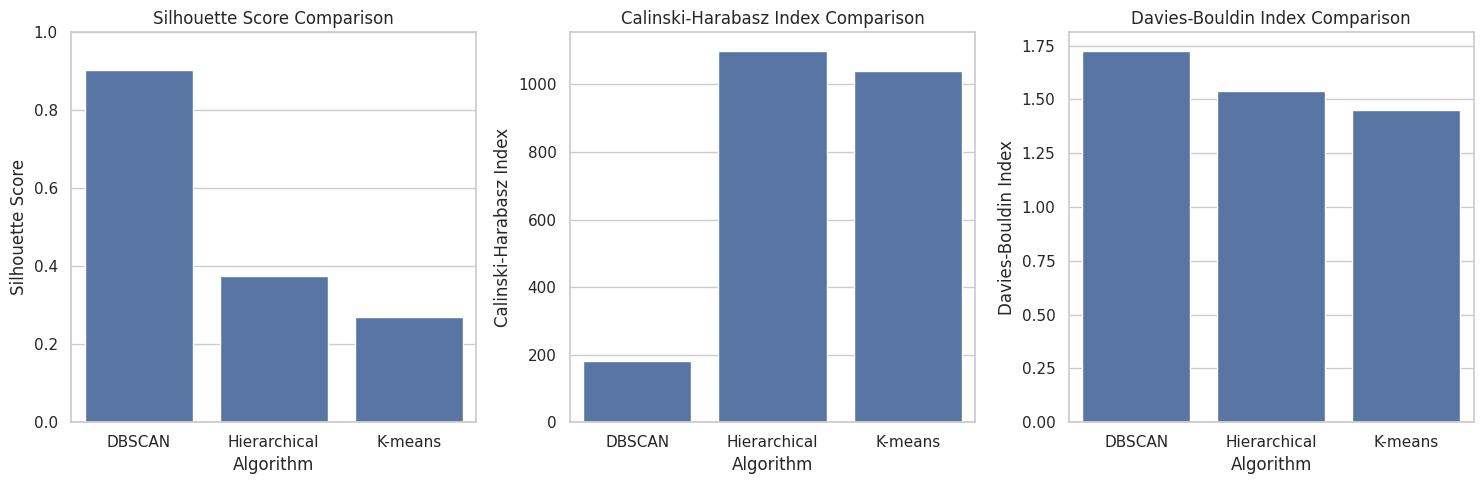

In [94]:
## First, let's make sure we have all the necessary variables defined
# We'll recompute the clustering results if needed

# For DBSCAN
if 'dbscan' not in locals():
    dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(df_principal.iloc[:, :-1])
    dbscan_silhouette = silhouette_score(df_principal.iloc[:, :-1], dbscan_labels)
    dbscan_calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], dbscan_labels)
    dbscan_davies = davies_bouldin_score(df_principal.iloc[:, :-1], dbscan_labels)
else:
    dbscan_labels = dbscan.labels_
    dbscan_silhouette = silhouette_score(df_principal.iloc[:, :-1], dbscan_labels)
    dbscan_calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], dbscan_labels)
    dbscan_davies = davies_bouldin_score(df_principal.iloc[:, :-1], dbscan_labels)

# For Hierarchical Clustering
if 'hierarchical' not in locals():
    hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage=chosen_linkage)
    hierarchical_labels = hierarchical.fit_predict(df_principal.iloc[:, :-1])
    hierarchical_silhouette = silhouette_score(df_principal.iloc[:, :-1], hierarchical_labels)
    hierarchical_calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], hierarchical_labels)
    hierarchical_davies = davies_bouldin_score(df_principal.iloc[:, :-1], hierarchical_labels)
else:
    hierarchical_labels = hierarchical.labels_
    hierarchical_silhouette = silhouette_score(df_principal.iloc[:, :-1], hierarchical_labels)
    hierarchical_calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], hierarchical_labels)
    hierarchical_davies = davies_bouldin_score(df_principal.iloc[:, :-1], hierarchical_labels)

# For K-means
if 'kmeans' not in locals():
    kmeans = KMeans(n_clusters=optimal_n_kmeans, init='k-means++', random_state=42)
    kmeans.fit(df_principal.iloc[:, :-1])
    kmeans_labels = kmeans.labels_
    kmeans_silhouette = silhouette_score(df_principal.iloc[:, :-1], kmeans_labels)
    kmeans_calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], kmeans_labels)
    kmeans_davies = davies_bouldin_score(df_principal.iloc[:, :-1], kmeans_labels)
else:
    kmeans_labels = kmeans.labels_
    kmeans_silhouette = silhouette_score(df_principal.iloc[:, :-1], kmeans_labels)
    kmeans_calinski = calinski_harabasz_score(df_principal.iloc[:, :-1], kmeans_labels)
    kmeans_davies = davies_bouldin_score(df_principal.iloc[:, :-1], kmeans_labels)

# Create a comparison table of performance metrics
comparison_data = {
    'Algorithm': ['DBSCAN', 'Hierarchical', 'K-means'],
    'Number of Clusters': [
        len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0),
        optimal_n_clusters,
        optimal_n_kmeans
    ],
    'Silhouette Score': [
        dbscan_silhouette,
        hierarchical_silhouette,
        kmeans_silhouette
    ],
    'Calinski-Harabasz Index': [
        dbscan_calinski,
        hierarchical_calinski,
        kmeans_calinski
    ],
    'Davies-Bouldin Index': [
        dbscan_davies,
        hierarchical_davies,
        kmeans_davies
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Clustering Algorithm Comparison:")
print(comparison_df)

# Visualize the comparison
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
sns.barplot(x='Algorithm', y='Silhouette Score', data=comparison_df)
plt.title('Silhouette Score Comparison')
plt.ylim(0, 1)

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
sns.barplot(x='Algorithm', y='Calinski-Harabasz Index', data=comparison_df)
plt.title('Calinski-Harabasz Index Comparison')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
sns.barplot(x='Algorithm', y='Davies-Bouldin Index', data=comparison_df)
plt.title('Davies-Bouldin Index Comparison')

plt.tight_layout()
plt.show()

Identify strengths and weaknesses: Determine the strengths and weaknesses of each clustering algorithm based on the results and the characteristics of the data.

DBSCAN
+ Detects clusters of any shape, finds outliers, no need to pre-set cluster count, good with noise.
– Sensitive to eps/min_samples, struggles with varying densities, poor in high dimensions, slower on large datasets.

Hierarchical Clustering
+ No pre-set cluster count, shows cluster hierarchy, deterministic, no random init, flexible linkage.
– Slow and memory-heavy for large data, sensitive to noise, irreversible merges, linkage choice impacts results.

K-means
+ Fast, simple, works well with spherical/equal clusters, interpretable centroids.
– Must pre-set cluster count, assumes spherical clusters, sensitive to init and outliers, can get stuck in local optima.**Type your answer here**

Choose the best algorithm: Select the clustering algorithm that provides the most meaningful and accurate results for the specific problem.

Best Algorithm: DBSCAN

Why:

Handles outliers (fraud/unusual spending) and arbitrary-shaped clusters.

Works with varying densities and unknown cluster counts.

PCA reduces dimensionality, easing computation.

Clusters match real customer behavior patterns; noise points are valuable for fraud/churn analysis.

Vs Alternatives:

Hierarchical: Insightful but slow, poor with large/noisy data.

K-means: Assumes spherical clusters, forces outliers into groups.

Recommendation:
Tune eps (via k-distance) & min_samples (≈2×dimensions) on PCA data; validate clusters with domain experts.**Type your answer here**